In [ ]:
# @title
from google.colab import drive

drive.mount("/content/gdrive")
!pwd
%cd "/content/gdrive/MyDrive/"


MessageError: Error: credential propagation was unsuccessful

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_dataus = pd.read_csv('dataus2024.csv')
df_firmus = pd.read_csv('firmsus2024.csv')

In [ ]:
# @title
df_firmus1 = df_firmus[["empresa","Nombre","status","naics1"]]
df_firmus1.columns=['firm','Empresa','status','industria']

df_dataus = pd.merge(df_dataus, df_firmus1, on='firm', how="left")

#1.1 Calculation of financial variables and ratios



HERE WE CALCULE THE CC RETURNS, COUTINUOUS COMPOUNDED RETURNS.

    CC_RETURN_Q IS FOR EACH QUARTER
    CC_RETURN_Y IS FOR EACH YEAR

TO FIND THE QUARTER'S VALUE, WE USE THE CURRENT LOGARITM OF THE 'adjprice' AND WE SUBSTRACT LOGARITM OF THE PREVIOUS QUARTER FOR CC_RETURN_Q (this explains the shift 1). FOR CC_RETURN_Y WE DO THE SAME THING BUT INSTEAD OF SUBSTRACTING THE PREVIOUS VALUE(WITH THE SHIFT 1), WE USE THE VALUE OF THE 4TH PREVIOUS ONE (WITH THE SHIFT 4), THAT WAY WE WILL GET THE 'adjprice' OF THE SAME PERIOD BUT ONE YEAR (FOUR QUARTERS) BEFORE.

THEN WE GROUP THE DATA BY 'firm', THIS IS IMPORTANT BECAUSE IN THE LAST VALUES WE DO NOT WANT TO KEEPING DOING THE SHIFT 1 OR 4 BECAUSE IT WILL TAKE THE DATA OF THE NEXT COMPANY.


In [ ]:
# @title
# 'adjprice' has to be a numeric value
df_dataus['adjprice'] = pd.to_numeric(df_dataus['adjprice'], errors='coerce')

#NEW LINE AS REQUESTED:
#SET THE INDEX OF THE DATA :
df_dataus = df_dataus.sort_values(by=['firm', 'fiscalq'])

# Q
df_dataus['cc_return_q'] = df_dataus.groupby('firm')['adjprice'].transform(lambda x: np.log(x) - np.log(x.shift(1)))

# Y
df_dataus['cc_return_y'] = df_dataus.groupby('firm')['adjprice'].transform(lambda x: np.log(x) - np.log(x.shift(4)))

# print head:
print("cc returns Q (cc_return_q):")
print(df_dataus['cc_return_q'].head(10))

print("\n cc returns Y (cc_return_y):")
print(df_dataus['cc_return_y'].head(10))


cc returns Q (cc_return_q):
4          NaN
8     0.128965
12   -0.977783
16    0.877684
20   -0.354014
24    0.525581
28   -0.048955
32   -0.121686
36   -0.663097
40    0.805348
Name: cc_return_q, dtype: float64

 cc returns Y (cc_return_y):
4          NaN
8          NaN
12         NaN
16         NaN
20   -0.325147
24    0.071469
28    1.000297
32    0.000926
36   -0.308157
40   -0.028390
Name: cc_return_y, dtype: float64


*HERE*  WE ARE CALCULATING THE FUTURE VALUES OF THE CONTINUOUS COMPOUNDED RETURNS (CC RETURNS).

    CC_RETURN_Q_FUTURE REPRESENTS THE FUTURE QUARTERLY RETURN.
    CC_RETURN_Y_FUTURE REPRESENTS THE FUTURE YEARLY RETURN.

TO OBTAIN THE FUTURE QUARTERLY RETURN (CC_RETURN_Q_FUTURE), WE USE SHIFT(-1) AFTER GROUPING THE DATA BY 'FIRM'. THIS LOOKS AHEAD TO THE NEXT QUARTER WITHIN THE SAME FIRM.

FOR THE FUTURE YEARLY RETURN (CC_RETURN_Y_FUTURE), WE USE SHIFT(-4) AFTER GROUPING BY 'FIRM'. THIS LOOKS AHEAD TO THE RETURN FOUR QUARTERS (ONE YEAR) IN THE FUTURE, BUT STILL WITHIN THE SAME FIRM.

IT IS IMPORTANT TO GROUP BY 'FIRM' TO AVOID MIXING DATA BETWEEN DIFFERENT COMPANIES WHEN CALCULATING THE FUTURE RETURNS. THIS ENSURES THAT THE SHIFTING ONLY HAPPENS WITHIN THE DATA OF EACH INDIVIDUAL COMPANY.

In [ ]:
# @title
df_dataus['cc_return_q_future'] = df_dataus.groupby('firm')['cc_return_q'].shift(-1)
print(df_dataus['cc_return_q_future'])
df_dataus['cc_return_y_future'] = df_dataus.groupby('firm')['cc_return_q'].shift(-4)
print(df_dataus['cc_return_y_future'])

df_dataus['cc_return_y_future'] = df_dataus.groupby('firm')['cc_return_y'].shift(-1)
print(df_dataus['cc_return_y_future'])
df_dataus['cc_return_y_future'] = df_dataus.groupby('firm')['cc_return_y'].shift(-4)
print(df_dataus['cc_return_y_future'])

4         0.128965
8        -0.977783
12        0.877684
16       -0.354014
20        0.525581
            ...   
557176         NaN
557177         NaN
557178         NaN
557179         NaN
557180         NaN
Name: cc_return_q_future, Length: 557181, dtype: float64
4        -0.354014
8         0.525581
12       -0.048955
16       -0.121686
20       -0.663097
            ...   
557176         NaN
557177         NaN
557178         NaN
557179         NaN
557180         NaN
Name: cc_return_y_future, Length: 557181, dtype: float64
4              NaN
8              NaN
12             NaN
16       -0.325147
20        0.071469
            ...   
557176         NaN
557177         NaN
557178         NaN
557179         NaN
557180         NaN
Name: cc_return_y_future, Length: 557181, dtype: float64
4        -0.325147
8         0.071469
12        1.000297
16        0.000926
20       -0.308157
            ...   
557176         NaN
557177         NaN
557178         NaN
557179         NaN
557180      

# 4 financial ratios for independent/explanatory variables (-here we made 5)

# 1) GrossMargin ratio

THE GROSSMARGIN RATIO IS USE TO REPRESENT THE  PROFITABILITY, COMPARING THE GROSS PROFIT TO THE REVENUE. THAT WAY WE WILL SEE THE PROFIT OF A COMPANY, AFTER THE PAYMENT OF THe COST OF GOODS SOLDS (COGS). THE RATIO INDICATES THE PERCENTAGE OF REVENUE THE COMPANY RETAINS AS GROSS PROFIT, SO NATURALLY A HIGH VALUE OF THIS RATIO IS PREFERABLE.



- formula: GrossMargin = (Gross Profit) / (Revenue)



In [ ]:
# @title
df_dataus.set_index(['firm', 'q'], inplace=True)

I put the condition of if 'revenue' is less than 1, we do not calculate the gross margin. This is to avoid infinite values (avoid some outliers too), instead it will be a NaN value.

In [ ]:
# @title
#if 'revenue' smaller than 1, GrossMargin will be equal to NaN.


df_dataus['GrossMargin'] = np.where(df_dataus['revenue'] < 1, np.nan, (df_dataus['revenue'] - df_dataus['cogs']) / df_dataus['revenue'])
# Affichage des résultats
print(df_dataus['GrossMargin'].head(10))

firm  q     
A     2001q1    0.489968
      2002q1    0.384292
      2003q1    0.374646
      2004q1    0.449787
      2005q1    0.452955
      2006q1    0.508234
      2007q1    0.539844
      2008q1    0.542714
      2009q1    0.505146
      2010q1    0.544106
Name: GrossMargin, dtype: float64


In [ ]:
# @title
# Filtrer les lignes où 'GrossMargin' et 'revenue' ne sont pas NaN
valid_rows = df_dataus['GrossMargin'].notna() & df_dataus['revenue'].notna()

# Calculer la moyenne pondérée en ignorant les NaN dans 'GrossMargin' et 'revenue'
weighted_mean_gross_margin = np.average(
    df_dataus.loc[valid_rows, 'GrossMargin'],
    weights=df_dataus.loc[valid_rows, 'revenue']
)

# Calculate the mean
mean_gross_margin = df_dataus['GrossMargin'].mean()

# Calculate the median
# Filtrer les valeurs zéro et NaN
filtered_gross_margin = df_dataus['GrossMargin'].replace(0, np.nan).dropna()
# Calcul de la médiane sur les données filtrées
median_gross_margin = filtered_gross_margin.median()
# Calculate the volatility
volatility_gross_margin = df_dataus['GrossMargin'].std()

# Calculate the minimum value
min_gross_margin = df_dataus['GrossMargin'].min()

# Calculate the maximum value
max_gross_margin = df_dataus['GrossMargin'].max()

# Display the results
print(f"Mean of the gross margin: {mean_gross_margin}")
print(f"Median of the gross margin: {median_gross_margin}")
print(f"Volatility of the gross margin: {volatility_gross_margin}")
print(f"Minimum value of the gross margin: {min_gross_margin}")
print(f"Maximum value of the gross margin: {max_gross_margin}")
print(f"Weighted mean of the gross margin: {weighted_mean_gross_margin}")

Mean of the gross margin: 0.44622516601072537
Median of the gross margin: 0.4457907312826154
Volatility of the gross margin: 8.021005213327506
Minimum value of the gross margin: -1852.0
Maximum value of the gross margin: 1888.6
Weighted mean of the gross margin: 0.42334690092896715


Gross Margin Mean: 0.4462
The gross margin mean is close to 0.45, indicating that, on average, companies have a positive gross margin, but it remains relatively low overall.

Gross Margin Median: 0.4458
The median is slightly lower than the mean, suggesting a fairly symmetric distribution but possibly with a few high outliers pulling the mean up. Most companies appear to have healthy gross margins around the 44-45% mark.

Gross Margin Volatility: 8.0210
The high standard deviation compared to the mean points to a wide spread in gross margins across companies. This is a strong indication of outliers or significant variability in how companies manage their costs.

Gross Margin Minimum Value: -1852.0
The extremely negative minimum suggests either data errors or exceptional cases where costs far outweighed revenues, leading to a substantial negative margin.

Gross Margin Maximum Value: 1888.6
Similarly, the very high maximum value could indicate a data entry error or outliers where some firms achieved extraordinarily high profitability.

Gross Margin Weighted Average: 0.4233
The weighted average, based on revenue, is lower than the mean, suggesting that larger firms with higher revenues tend to have slightly lower margins, pulling the weighted average down.

Conclusion:
The large difference between the mean and the extreme values, especially the minimum, shows the presence of significant outliers, which are affecting the overall distribution. The median being close to the mean suggests that most firms have a gross margin within a narrow range, but a few outliers skew the data.

--> The arithmetic mean is more affected by extreme values (both low and high). The very low mean compared to the median suggests that there are significant negative outliers or a skewed distribution sinking the mean down.

# 2)Gross Profit:

The gross profit is the profit a company makes after deducting the costs of goods sold (COGS) from revenue. It represents the profit made on the sale of goods or services before accounting for other operating expenses, interest, taxes, and other costs. In simple terms, it is the difference between the revenue generated from sales and the direct costs associated with producing those sales.

In [ ]:
df_dataus['GrossProfit'] = df_dataus['revenue'] - df_dataus['cogs']
print(df_dataus['GrossProfit'].head(10))

firm  q     
A     2001q1    1392000.0
      2002q1     548000.0
      2003q1     529000.0
      2004q1     739000.0
      2005q1     751000.0
      2006q1     679000.0
      2007q1     691000.0
      2008q1     756000.0
      2009q1     589000.0
      2010q1     660000.0
Name: GrossProfit, dtype: float64


In [ ]:
# Filtrer les lignes où 'GrossProfit' et 'revenue' ne sont pas NaN
valid_rows = df_dataus['GrossProfit'].notna() & df_dataus['revenue'].notna()

# Calculer la moyenne pondérée en ignorant les NaN dans 'GrossProfit' et 'revenue'
weighted_mean_gross_profit = np.average(
    df_dataus.loc[valid_rows, 'GrossProfit'],
    weights=df_dataus.loc[valid_rows, 'revenue']
)

# Calculate the mean
mean_gross_profit = df_dataus['GrossProfit'].mean()

# Calculate the median
# Filtrer les valeurs zéro et NaN pour 'GrossProfit'
filtered_gross_profit = df_dataus['GrossProfit'].replace(0, np.nan).dropna()
# Calcul de la médiane sur les données filtrées
median_gross_profit = filtered_gross_profit.median()

# Calculate the volatility
volatility_gross_profit = df_dataus['GrossProfit'].std()

# Calculate the minimum value
min_gross_profit = df_dataus['GrossProfit'].min()

# Calculate the maximum value
max_gross_profit = df_dataus['GrossProfit'].max()

# Display the results
print(f"Mean of Gross Profit: {mean_gross_profit}")
print(f"Median of Gross Profit: {median_gross_profit}")
print(f"Volatility of Gross Profit: {volatility_gross_profit}")
print(f"Minimum value of Gross Profit: {min_gross_profit}")
print(f"Maximum value of Gross Profit: {max_gross_profit}")
print(f"Weighted mean of Gross Profit: {weighted_mean_gross_profit}")

Mean of Gross Profit: 1349595.2166234888
Median of Gross Profit: 204659.0
Volatility of Gross Profit: 5970366.247239934
Minimum value of Gross Profit: -72954000.0
Maximum value of Gross Profit: 364482000.0
Weighted mean of Gross Profit: 21306893.467773467


The statistical analysis of Gross Profit reveals significant variation in company performance within the dataset. The mean gross profit is 1,349,595.22, but a much lower median of 204,659.00 suggests a biased distribution with a few companies achieving exceptionally high profits, pulling the mean upwards. The high volatility (standard deviation of 5,970,366.25) indicates very differens values of profit, from a loss of up to -72,954,000.00 to a maximum profit of 364,482,000.00. The weighted mean of 21,306,893.47, significantly higher than the arithmetic mean, suggests that larger companies with higher revenues tend to be more profitable.

# 3)EBIT

Earnings Before Interest and Taxes is a measure of a company's profitability that excludes interest and tax expenses. It represents the operating profit of a company, which is the profit generated from its core operations before accounting for financing and tax costs. EBIT is often used to analyze a company's operating performance and to compare it with other companies in the same industry.

-Formula: EBIT=Revenue−Cost of Goods Sold (COGS)−Operating Expenses−Depreciation and Amortization

In [ ]:
df_dataus['EBIT'] = df_dataus['GrossProfit'] - df_dataus['sgae']
print(df_dataus['EBIT'].head(10))

firm  q     
A     2001q1    279000.0
      2002q1   -442000.0
      2003q1   -256000.0
      2004q1     79000.0
      2005q1     95000.0
      2006q1     45000.0
      2007q1     95000.0
      2008q1    134000.0
      2009q1     24000.0
      2010q1     94000.0
Name: EBIT, dtype: float64


In [ ]:

# Filter rows where 'EBIT' and 'revenue' are not NaN
valid_rows = df_dataus['EBIT'].notna() & df_dataus['revenue'].notna()

# Calculate the weighted mean ignoring NaN in 'EBIT' and 'revenue'
weighted_mean_ebit = np.average(
    df_dataus.loc[valid_rows, 'EBIT'],
    weights=df_dataus.loc[valid_rows, 'revenue']
)

# Calculate the mean
mean_ebit = df_dataus['EBIT'].mean()

# Calculate the median
# Filter zero and NaN values for 'EBIT'
filtered_ebit = df_dataus['EBIT'].replace(0, np.nan).dropna()
# Calculate the median on the filtered data
median_ebit = filtered_ebit.median()

# Calculate the volatility
volatility_ebit = df_dataus['EBIT'].std()

# Calculate the minimum value
min_ebit = df_dataus['EBIT'].min()

# Calculate the maximum value
max_ebit = df_dataus['EBIT'].max()

# Display the results
print(f"Mean of EBIT: {mean_ebit}")
print(f"Median of EBIT: {median_ebit}")
print(f"Volatility of EBIT: {volatility_ebit}")
print(f"Minimum value of EBIT: {min_ebit}")
print(f"Maximum value of EBIT: {max_ebit}")
print(f"Weighted mean of EBIT: {weighted_mean_ebit}")

Mean of EBIT: 334761.36177333747
Median of EBIT: 32024.0
Volatility of EBIT: 2001222.0527078842
Minimum value of EBIT: -56347400.0
Maximum value of EBIT: 119437000.0
Weighted mean of EBIT: 6106231.147153717


we see a mean of 334,761 and a much lower median of 32,024, reflecting varied operational efficiencies across companies. The big volatility and a wide range between the lowest and highest EBIT values indicate significant disparities in business performance. The weighted mean of 6,106,231, influenced by larger firms, suggests their predominant impact on the industry's financial health.

# 4)Net Income:

Net Income is the amount of money a company earns after deducting all expenses, including the cost of goods sold, operating expenses, interest, taxes, and other costs. It represents the final profit that a company retains after all expenses have been accounted for.

In [ ]:
df_dataus['NetIncome'] = df_dataus['EBIT'] - df_dataus['finexp'] - df_dataus['incometax'] + df_dataus['otherincome'] + df_dataus['extraordinaryitems']
print(df_dataus['NetIncome'].head(10))

firm  q     
A     2001q1     154000.0
      2002q1    -315000.0
      2003q1    -369000.0
      2004q1      71000.0
      2005q1     103000.0
      2006q1    2816000.0
      2007q1     150000.0
      2008q1     120000.0
      2009q1      64000.0
      2010q1      79000.0
Name: NetIncome, dtype: float64


In [ ]:

# Filter rows where 'NetIncome' and 'revenue' are not NaN
valid_rows = df_dataus['NetIncome'].notna() & df_dataus['revenue'].notna()

# Calculate the weighted mean ignoring NaN in 'NetIncome' and 'revenue'
weighted_mean_net_income = np.average(
    df_dataus.loc[valid_rows, 'NetIncome'],
    weights=df_dataus.loc[valid_rows, 'revenue']
)

# Calculate the mean
mean_net_income = df_dataus['NetIncome'].mean()

# Calculate the median
# Filter zero and NaN values for 'NetIncome'
filtered_net_income = df_dataus['NetIncome'].replace(0, np.nan).dropna()
# Calculate the median on the filtered data
median_net_income = filtered_net_income.median()

# Calculate the volatility
volatility_net_income = df_dataus['NetIncome'].std()

# Calculate the minimum value
min_net_income = df_dataus['NetIncome'].min()

# Calculate the maximum value
max_net_income = df_dataus['NetIncome'].max()

# Display the results
print(f"Mean of Net Income: {mean_net_income}")
print(f"Median of Net Income: {median_net_income}")
print(f"Volatility of Net Income: {volatility_net_income}")
print(f"Minimum value of Net Income: {min_net_income}")
print(f"Maximum value of Net Income: {max_net_income}")
print(f"Weighted mean of Net Income: {weighted_mean_net_income}")

Mean of Net Income: 206294.52552776257
Median of Net Income: 14913.0
Volatility of Net Income: 1543927.4462771814
Minimum value of Net Income: -98696000.0
Maximum value of Net Income: 108260000.0
Weighted mean of Net Income: 4171674.030499413


# 5) Return on Assets:

RETURN ON ASSETS (ROA) IS RETURN RATIO THAT MEASURES THE PROFITABILITY OF A BUSINESS, IN RELATION TO ITS TOTAL ASSETS. ROA RATIO INDICATES HOW WELL THE COMPANY PERFORMS BY COMPARING THE PROFIT (--> NET INCOME) IT GENERATES TO THE TOTAL INVESTED IN ASSETS.

In [ ]:
df_dataus['ROA']= df_dataus['NetIncome']/df_dataus['totalassets']
print(df_dataus['ROA'].head(10))

firm  q     
A     2001q1    0.016725
      2002q1   -0.036808
      2003q1   -0.047490
      2004q1    0.011122
      2005q1    0.014406
      2006q1    0.350860
      2007q1    0.020854
      2008q1    0.016088
      2009q1    0.008936
      2010q1    0.010430
Name: ROA, dtype: float64


In [ ]:

# Define ROA as Net Income divided by Total Assets, filtering out rows where either is NaN or Total Assets are zero to avoid division errors
df_dataus['ROA'] = np.where((df_dataus['totalassets'] > 0), df_dataus['NetIncome'] / df_dataus['totalassets'], np.nan)

# Calculate the weighted mean ignoring NaN in 'ROA' and weighting by 'TotalAssets' since assets size can reflect the scale of operation
valid_rows = df_dataus['ROA'].notna()
weighted_mean_roa = np.average(
    df_dataus.loc[valid_rows, 'ROA'],
    weights=df_dataus.loc[valid_rows, 'totalassets']
)

# Calculate the mean
mean_roa = df_dataus['ROA'].mean()

# Calculate the median
# Filter zero and NaN values for 'ROA'
filtered_roa = df_dataus['ROA'].replace(0, np.nan).dropna()
median_roa = filtered_roa.median()

# Calculate the volatility
volatility_roa = df_dataus['ROA'].std()

# Calculate the minimum value
min_roa = df_dataus['ROA'].min()

# Calculate the maximum value
max_roa = df_dataus['ROA'].max()

# Display the results
print(f"Mean of ROA: {mean_roa}")
print(f"Median of ROA: {median_roa}")
print(f"Volatility of ROA: {volatility_roa}")
print(f"Minimum value of ROA: {min_roa}")
print(f"Maximum value of ROA: {max_roa}")
print(f"Weighted mean of ROA: {weighted_mean_roa}")

Mean of ROA: 0.5206706819075033
Median of ROA: 0.012668975683831423
Volatility of ROA: 219.49686188605895
Minimum value of ROA: -13594.0
Maximum value of ROA: 88310.0
Weighted mean of ROA: 0.02807001154216164


# 6) Dept to Equity:

The debt-to-equity ratio is a financial metric that compares a company's total debt to its total shareholder equity. It is used to assess the financial leverage of a company, indicating how much debt the company is using to finance its assets compared to the amount of equity.

In [ ]:
df_dataus['DebtToEquity'] = df_dataus['totalliabilities'] / (df_dataus['totalassets'] - df_dataus['totalliabilities'])
print(df_dataus['DebtToEquity'].head(10))

firm  q     
A     2001q1    0.661794
      2002q1    0.586284
      2003q1    0.786618
      2004q1    1.080156
      2005q1    0.897558
      2006q1    0.919177
      2007q1    0.966913
      2008q1    1.350772
      2009q1    1.785687
      2010q1    1.915319
Name: DebtToEquity, dtype: float64


In [ ]:
# Adjusting DebtToEquity calculation to avoid division by zero and handle extreme values
df_dataus['DebtToEquity'] = np.where(
    (df_dataus['totalassets'] - df_dataus['totalliabilities']) != 0,
    df_dataus['totalliabilities'] / (df_dataus['totalassets'] - df_dataus['totalliabilities']),
    np.nan  # Assign NaN where division by zero would occur
)

# Recalculate the statistics:
valid_rows = df_dataus['DebtToEquity'].notna()

weighted_mean_debt_to_equity = np.average(
    df_dataus.loc[valid_rows, 'DebtToEquity'],
    weights=df_dataus.loc[valid_rows, 'totalassets']
)

mean_debt_to_equity = df_dataus['DebtToEquity'].mean()
median_debt_to_equity = df_dataus['DebtToEquity'].median()
volatility_debt_to_equity = df_dataus['DebtToEquity'].std()
min_debt_to_equity = df_dataus['DebtToEquity'].min()
max_debt_to_equity = df_dataus['DebtToEquity'].max()

# Display updated results
print(f"Updated Mean of Debt to Equity: {mean_debt_to_equity}")
print(f"Updated Median of Debt to Equity: {median_debt_to_equity}")
print(f"Updated Volatility of Debt to Equity: {volatility_debt_to_equity}")
print(f"Updated Minimum value of Debt to Equity: {min_debt_to_equity}")
print(f"Updated Maximum value of Debt to Equity: {max_debt_to_equity}")
print(f"Updated Weighted mean of Debt to Equity: {weighted_mean_debt_to_equity}")


Updated Mean of Debt to Equity: 2.6030388938210334
Updated Median of Debt to Equity: 1.214341122194853
Updated Volatility of Debt to Equity: 475.9811595580488
Updated Minimum value of Debt to Equity: -117497.88888888889
Updated Maximum value of Debt to Equity: 166256.36363636365
Updated Weighted mean of Debt to Equity: -60.25938001254836


# 7) Current Ratio

The current ratio, also known as the working capital ratio, measures a
business’s ability to meet its short-term obligations that are due within
a year. This ratio compares total current assets to total current
liabilities. It also looks at how a company can maximize the liquidity of
its current assets to settle its debt obligations.

In [ ]:
df_dataus['CurrentRatio'] = df_dataus['currentassets'] / df_dataus['currentliabilities']
print(df_dataus ['CurrentRatio'].head(10))

firm  q     
A     2001q1    1.778827
      2002q1    3.293373
      2003q1    2.253584
      2004q1    2.284241
      2005q1    2.625071
      2006q1    2.825901
      2007q1    2.732507
      2008q1    1.896036
      2009q1    2.661947
      2010q1    2.165163
Name: CurrentRatio, dtype: float64


In [ ]:

# Calculate CurrentRatio while handling potential division by zero issues
df_dataus['CurrentRatio'] = np.where(
    df_dataus['currentliabilities'] != 0,
    df_dataus['currentassets'] / df_dataus['currentliabilities'],
    np.nan  # Assign NaN where division by zero would occur
)

# Filter rows where 'CurrentRatio' is not NaN
valid_rows = df_dataus['CurrentRatio'].notna()

# Calculate the weighted mean ignoring NaN in 'CurrentRatio' and weighting by 'currentassets'
weighted_mean_current_ratio = np.average(
    df_dataus.loc[valid_rows, 'CurrentRatio'],
    weights=df_dataus.loc[valid_rows, 'currentassets']
)

# Calculate the mean
mean_current_ratio = df_dataus['CurrentRatio'].mean()

# Calculate the median
# Filter zero and NaN values for 'CurrentRatio'
filtered_current_ratio = df_dataus['CurrentRatio'].replace(0, np.nan).dropna()
median_current_ratio = filtered_current_ratio.median()

# Calculate the volatility
volatility_current_ratio = df_dataus['CurrentRatio'].std()

# Calculate the minimum value
min_current_ratio = df_dataus['CurrentRatio'].min()

# Calculate the maximum value
max_current_ratio = df_dataus['CurrentRatio'].max()

# Display the results
print(f"Mean of Current Ratio: {mean_current_ratio}")
print(f"Median of Current Ratio: {median_current_ratio}")
print(f"Volatility of Current Ratio: {volatility_current_ratio}")
print(f"Minimum value of Current Ratio: {min_current_ratio}")
print(f"Maximum value of Current Ratio: {max_current_ratio}")
print(f"Weighted mean of Current Ratio: {weighted_mean_current_ratio}")

Mean of Current Ratio: 3.422010854245418
Median of Current Ratio: 1.9357398703384994
Volatility of Current Ratio: 7.838009340044093
Minimum value of Current Ratio: 0.0
Maximum value of Current Ratio: 1468.9293443666454
Weighted mean of Current Ratio: 2.4323825552410305


# 8) Operating Profit Margin

This ratio measures the percentage of total revenue that remains after deducting costs of production (COGS) and operating expenses (SGAE). It indicates the profitability of the company before interest and taxes.
Usage: To assess the operational efficiency of the company and its ability to generate profits from sales.

-Formula: EBIT / revenue

In [ ]:
df_dataus['ProfitMargin'] = df_dataus['EBIT'] / df_dataus['currentliabilities']
print(df_dataus ['ProfitMargin'].head(10))

firm  q     
A     2001q1    0.090879
      2002q1   -0.266265
      2003q1   -0.126545
      2004q1    0.045272
      2005q1    0.053642
      2006q1    0.027489
      2007q1    0.069242
      2008q1    0.050112
      2009q1    0.021239
      2010q1    0.036877
Name: ProfitMargin, dtype: float64


In [ ]:

# Calculate ProfitMargin while handling potential division by zero issues
df_dataus['ProfitMargin'] = np.where(
    df_dataus['currentliabilities'] != 0,
    df_dataus['EBIT'] / df_dataus['currentliabilities'],
    np.nan  # Assign NaN where division by zero would occur
)

# Filter rows where 'ProfitMargin' is not NaN
valid_rows = df_dataus['ProfitMargin'].notna()

# Calculate the weighted mean ignoring NaN in 'ProfitMargin' and weighting by 'currentliabilities'
weighted_mean_profit_margin = np.average(
    df_dataus.loc[valid_rows, 'ProfitMargin'],
    weights=df_dataus.loc[valid_rows, 'currentliabilities']
)

# Calculate the mean
mean_profit_margin = df_dataus['ProfitMargin'].mean()

# Calculate the median
# Filter zero and NaN values for 'ProfitMargin'
filtered_profit_margin = df_dataus['ProfitMargin'].replace(0, np.nan).dropna()
median_profit_margin = filtered_profit_margin.median()

# Calculate the volatility
volatility_profit_margin = df_dataus['ProfitMargin'].std()

# Calculate the minimum value
min_profit_margin = df_dataus['ProfitMargin'].min()

# Calculate the maximum value
max_profit_margin = df_dataus['ProfitMargin'].max()

# Display the results
print(f"Mean of Profit Margin: {mean_profit_margin}")
print(f"Median of Profit Margin: {median_profit_margin}")
print(f"Volatility of Profit Margin: {volatility_profit_margin}")
print(f"Minimum value of Profit Margin: {min_profit_margin}")
print(f"Maximum value of Profit Margin: {max_profit_margin}")
print(f"Weighted mean of Profit Margin: {weighted_mean_profit_margin}")

Mean of Profit Margin: 1.8269298961803866
Median of Profit Margin: 0.12357103973870441
Volatility of Profit Margin: 885.5361032801637
Minimum value of Profit Margin: -346.2084418968213
Maximum value of Profit Margin: 403753.0266343826
Weighted mean of Profit Margin: 0.19828515560047158


#Book Value

In [ ]:
df_dataus['BookValue'] = df_dataus['totalassets'] - df_dataus['totalliabilities']
print(df_dataus['BookValue'].head(10))


firm  q     
A     2001q1    5541000.0
      2002q1    5395000.0
      2003q1    4349000.0
      2004q1    3069000.0
      2005q1    3768000.0
      2006q1    4182000.0
      2007q1    3657000.0
      2008q1    3173000.0
      2009q1    2571000.0
      2010q1    2598000.0
Name: BookValue, dtype: float64


In [ ]:
print(df_dataus['BookValue'].describe())

count    2.528090e+05
mean     3.036892e+06
std      1.280359e+07
min     -9.052000e+07
25%      1.142850e+05
50%      5.416380e+05
75%      1.783843e+06
max      5.714900e+08
Name: BookValue, dtype: float64


last Q to show descriptive statistics for book-value

In [ ]:
#You did not select the last Q to show descriptive statistics for market value and book-value;
# Step 1: Filter the data for '2023q4' in the multi-index (q part of index)
df_2023q4 = df_dataus.loc[(slice(None), '2023q4'), :]

# Step 2: Calculate bv (if not already done)
df_2023q4['BookValue'] = df_2023q4['totalassets'] - df_2023q4['totalliabilities']

# Step 3: Show descriptive statistics for Book Value for the quarter '2023q4'
print("Descriptive statistics for Book Value for the quarter 2023q4:")
print(df_2023q4['BookValue'].describe())

Descriptive statistics for Book Value for the quarter 2023q4:
count    3.417000e+03
mean     3.842667e+06
std      1.805205e+07
min     -1.722800e+07
25%      8.508400e+04
50%      4.980000e+05
75%      2.066201e+06
max      5.612730e+08
Name: BookValue, dtype: float64


<ipython-input-172-57b3b65840de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023q4['BookValue'] = df_2023q4['totalassets'] - df_2023q4['totalliabilities']


# Market Value

In [ ]:
df_dataus['MarketVales'] = df_dataus['originalprice'] * df_dataus['sharesoutstanding']
print(df_dataus['MarketVales'].head(10))

firm  q     
A     2001q1    1.403653e+07
      2002q1    1.621654e+07
      2003q1    6.196841e+06
      2004q1    1.520626e+07
      2005q1    1.090383e+07
      2006q1    1.626744e+07
      2007q1    1.359909e+07
      2008q1    1.088921e+07
      2009q1    5.306590e+06
      2010q1    1.197273e+07
Name: MarketVales, dtype: float64


In [ ]:
print(df_dataus['MarketVales'].describe())

count    2.444080e+05
mean     8.829191e+06
std      4.664179e+07
min      0.000000e+00
25%      3.162091e+05
50%      1.449045e+06
75%      4.640692e+06
max      3.321869e+09
Name: MarketVales, dtype: float64


last Q to show descriptive statistics for market value

In [ ]:
#You did not select the last Q to show descriptive statistics for market value and book-value;
# Step 1: Filter the data for '2023q4' in the multi-index (q part of index)
df_2023q4 = df_dataus.loc[(slice(None), '2023q4'), :]

# Step 2: Calculate Market Value (if not already done)
df_2023q4['MarketVales'] = df_2023q4['originalprice'] * df_2023q4['sharesoutstanding']

# Step 3: Show descriptive statistics for Market Value and Book Value for the quarter '2023q4'
print("Descriptive statistics for Market Value for the quarter 2023q4:")
print(df_2023q4['MarketVales'].describe())

<ipython-input-175-29b160cc817a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023q4['MarketVales'] = df_2023q4['originalprice'] * df_2023q4['sharesoutstanding']


Descriptive statistics for Market Value for the quarter 2023q4:
count    3.437000e+03
mean     1.404362e+07
std      9.254963e+07
min      3.588000e+01
25%      1.927944e+05
50%      1.195298e+06
75%      5.514355e+06
max      2.994371e+09
Name: MarketVales, dtype: float64


#Earnings per share divided by price:

#1.2 Firm Composition of the US financial market

 How many active firms by industry there are in the sample ?


In [ ]:
# Filtrer les entreprises actives
active_firms = df_2023q4[df_2023q4['status'] == 'activo']

# Compter le nombre d'entreprises actives par industrie
active_firms_by_industry = df_2023q4['industria'].value_counts()

# Afficher les résultats
print(active_firms_by_industry)

industria
Industrias manufactureras                                                                        2319
Servicios financieros y de seguros                                                               1108
Información en medios masivos                                                                     489
Comercio al por menor                                                                             248
Servicios profesionales, científicos y técnicos                                                   239
Minería, explotación de canteras y extracción de petróleo y gas                                   225
Servicios de apoyo a los negocios y manejo de residuos y desechos, y servicios de remediación     192
Empresas de electricidad, gas y agua                                                              136
Comercio al por mayor                                                                             117
Transportes, correos y almacenamiento                                   

Show a table that shows statistics about the book value and market value by industry.

In [ ]:
print(df_dataus.columns)  # Check the columns in df_dataus
print(df_dataus.head(2))

Index(['fiscalmonth', 'revenue', 'cogs', 'sgae', 'otherincome',
       'extraordinaryitems', 'finexp', 'incometax', 'totalassets',
       'currentassets', 'inventory', 'totalliabilities', 'currentliabilities',
       'longdebt', 'adjprice', 'originalprice', 'sharesoutstanding', 'year',
       'fixedassets', 'yearf', 'cto', 'fiscalq', 'Empresa', 'status',
       'industria', 'cc_return_q', 'cc_return_y', 'cc_return_q_future',
       'cc_return_y_future', 'GrossMargin', 'GrossProfit', 'EBIT', 'NetIncome',
       'ROA', 'DebtToEquity', 'CurrentRatio', 'ProfitMargin', 'BookValue',
       'MarketVales'],
      dtype='object')
             fiscalmonth    revenue       cogs       sgae  otherincome  \
firm q                                                                   
A    2001q1          3.0  2841000.0  1449000.0  1113000.0      19000.0   
     2002q1          3.0  1426000.0   878000.0   990000.0      19000.0   

             extraordinaryitems  finexp  incometax  totalassets  \
firm q 

In [ ]:

'''
firms1 = df_firmus[["empresa","Nombre","status","naics1"]]
firms1.columns=['firm','Empresa','status','industria']

data = pd.merge(df_dataus,firms1,on="firm",how="left")

industryStats = df_dataus.groupby('industria')[['BookValue', 'MarketVales']].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

print(industryStats)
'''
# Step 1: Merge df_dataus with firms1 to include 'industria'
firms1 = df_firmus[["empresa", "Nombre", "status", "naics1"]]
firms1.columns = ['firm', 'Empresa', 'status', 'industria']

# Step 2: Filter df_dataus for the '2023q4' quarter using loc with the multi-index
df_filtered = df_dataus.loc[(slice(None), '2023q4'), :]

# Step 3: Merge the filtered data with firms1 on 'firm'
data = pd.merge(df_filtered.reset_index(), firms1, on="firm", how="left")

# Step 4: Group by 'industria' and calculate aggregate statistics for 'BookValue' and 'MarketVales'
industryStats = data.groupby('industria_y')[['BookValue', 'MarketVales']].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Step 5: Display the industry statistics
print(industryStats)


                                                       BookValue  \
                                                            mean   
industria_y                                                        
-                                                   6.021393e+06   
Agricultura, ganadería, aprovechamiento foresta...  2.792999e+06   
Comercio al por mayor                               1.387558e+06   
Comercio al por menor                               4.034348e+06   
Construcción                                        2.936630e+06   
Corporativos                                                 NaN   
Empresas de electricidad, gas y agua                8.425310e+06   
Industrias manufactureras                           2.626649e+06   
Información en medios masivos                       4.522107e+06   
Minería, explotación de canteras y extracción d...  3.849218e+06   
Otros servicios excepto actividades gubernament...  3.628185e+05   
Servicios de alojamiento temporal y de preparac.

What can you say about the typical firm size in terms of market value and book value?
-THE MEDIANS OF BOOK VALUE INDICATE THE TYPICAL COMPANY SIZE PER INDUSTRY. HOWEVER, MARKET VALUE REVEALS THAT COMPANY SIZE VARIES WIDELY BETWEEN INDUSTRIES, AS MARKET VALUE SIGNIFICANTLY INFLATES PRICES. CONSEQUENTLY, MANUFACTURING INDUSTRIES OFTEN DOMINATE DUE TO THEIR LARGE MARKET SIZE.

How much these variables change within each industry?
-STANDARD DEVIATION SHOWS HOW MUCH COMPANY SIZES VARY WITHIN EACH INDUSTRY FOR BOTH BOOK VALUE AND MARKET VALUE. THIS REVEALS A RANGE OF VERY LARGE COMPANIES AND MUCH SMALLER ONES.


 How firm size (in market value) is distributed? You have to do the right descriptive statistics.

-THE DISTRIBUTION OF COMPANY SIZES BY MARKET VALUE IS HIGHLY VARIED, AS EVIDENT IN MANUFACTURING AND BUSINESS SUPPORT SERVICES. THE MANUFACTURING SECTOR INCLUDES HUGE COMPANIES LIKE APPLE AND AMAZON, WHILE BUSINESS SUPPORT SERVICES LACKS HIGH-MARKET-VALUE COMPANIES, LEADING TO AN UNEVEN DISTRIBUTION. THIS VARIANCE IS DUE TO A FEW LARGE CONGLOMERATES AND MANY SMALLER FIRMS.

Which are the biggest 10 US firms in terms of market value/ book value and how far they are from the typical market size of a US firm ?

In [ ]:
'''
# Calculate the overall averages of BOOKVALUE and MARKETVALUE for the entire market
meanbookvalue = df_dataus['BookValue'].mean()
meanmarketvalue = df_dataus['MarketVales'].mean()

# Group by company and calculate the average value of BOOKVALUE and MARKETVALUE, then select the top 10
topfirmsbookvalue = df_dataus.groupby('Empresa')[['BookValue']].mean().nlargest(10, 'BookValue')
topfirmsmarketvalue = df_dataus.groupby('Empresa')[['MarketVales']].mean().nlargest(10,'MarketVales')

# Calculate the difference between the averages of the top 10 companies and the market average
topfirmsbookvalue['Market Average Difference (BookValue)'] = topfirmsbookvalue['BookValue'] - meanbookvalue
topfirmsmarketvalue['Market Average Difference (MarketVales)'] = topfirmsmarketvalue['MarketVales'] - meanmarketvalue

# Print the results
print("\n10 Companies with highest average BookValue:")
print(topfirmsbookvalue)
print("\n10 Companies with highest average MarketVales:")
print(topfirmsmarketvalue)

print("\nAverage BookValue difference from the market average:")
print(topfirmsbookvalue[['BookValue', 'Market Average Difference (BookValue)']])
print("\nAverage MarketVales difference from the market average:")
print(topfirmsmarketvalue[['MarketVales', 'Market Average Difference (MarketVales)']])
'''
# Step 1: Filter df_dataus for the quarter '2023q4'
df_filtered = df_dataus.loc[(slice(None), '2023q4'), :].reset_index()

# Step 2: Calculate the overall averages of BOOKVALUE and MARKETVALUE for the entire market in '2023q4'
meanbookvalue = df_filtered['BookValue'].mean()
meanmarketvalue = df_filtered['MarketVales'].mean()

# Step 3: Group by company ('Empresa') and calculate the average value of BOOKVALUE and MARKETVALUE for '2023q4'
topfirmsbookvalue = df_filtered.groupby('Empresa')[['BookValue']].mean().nlargest(10, 'BookValue')
topfirmsmarketvalue = df_filtered.groupby('Empresa')[['MarketVales']].mean().nlargest(10, 'MarketVales')

# Step 4: Calculate the difference between the averages of the top 10 companies and the market average
topfirmsbookvalue['Market Average Difference (BookValue)'] = topfirmsbookvalue['BookValue'] - meanbookvalue
topfirmsmarketvalue['Market Average Difference (MarketVales)'] = topfirmsmarketvalue['MarketVales'] - meanmarketvalue

# Step 5: Print the results
print("\n10 Companies with highest average BookValue (2023q4):")
print(topfirmsbookvalue)
print("\n10 Companies with highest average MarketVales (2023q4):")
print(topfirmsmarketvalue)

print("\nAverage BookValue difference from the market average (2023q4):")
print(topfirmsbookvalue[['BookValue', 'Market Average Difference (BookValue)']])
print("\nAverage MarketVales difference from the market average (2023q4):")
print(topfirmsmarketvalue[['MarketVales', 'Market Average Difference (MarketVales)']])


10 Companies with highest average BookValue (2023q4):
                          BookValue  Market Average Difference (BookValue)
Empresa                                                                   
Berkshire Hathaway Inc  561273000.0                           5.574303e+08
Jpmorgan Chase & Co     327878000.0                           3.240353e+08
Bank Of America Corp    291646000.0                           2.878033e+08
Alphabet Inc            283379000.0                           2.795363e+08
Microsoft Corp          238268000.0                           2.344253e+08
Exxon Mobil Corp        212538000.0                           2.086953e+08
Citigroup Inc           206251000.0                           2.024083e+08
Amazon.Com, Inc         201875000.0                           1.980323e+08
Wells Fargo & Company   187443000.0                           1.836003e+08
Chevron Corp            161929000.0                           1.580863e+08

10 Companies with highest average MarketVale

#1.3 Evolution of the US financial market

Considering the whole history of financial data for all firms, and only annual fiscal information (selecting fiscalmonth=12) :

  How the total market value of the US market has changed over the years? Do a table and/or graph and explain

Evolution total value of us market per year:
    year  Total Market Value
0   2000        1.271442e+10
1   2001        1.138682e+10
2   2002        9.382138e+09
3   2003        1.155087e+10
4   2004        1.310071e+10
5   2005        1.365024e+10
6   2006        1.529529e+10
7   2007        1.593777e+10
8   2008        1.024751e+10
9   2009        1.163598e+10
10  2010        1.355240e+10
11  2011        1.642614e+10
12  2012        1.638882e+10
13  2013        2.088287e+10
14  2014        2.314045e+10
15  2015        2.301566e+10
16  2016        2.441035e+10
17  2017        2.807695e+10
18  2018        2.680193e+10
19  2019        3.215222e+10
20  2020        3.807889e+10
21  2021        4.865966e+10
22  2022        3.983687e+10
23  2023        4.605377e+10
24  2024        9.618783e+09


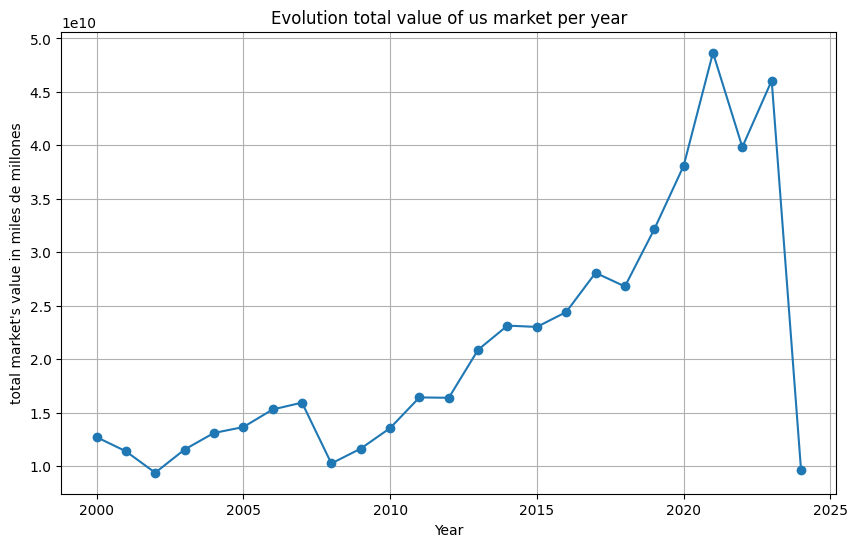

In [ ]:
yearData = df_dataus[df_dataus['fiscalmonth'] == 12]

marketVal_per_year = yearData.groupby('year')['MarketVales'].sum()


marketVal_per_year_df = marketVal_per_year.reset_index()
marketVal_per_year_df.columns = ['year', 'Total Market Value']

print("Evolution total value of us market per year:")
print(marketVal_per_year_df)


plt.figure(figsize=(10, 6))
plt.plot(marketVal_per_year_df['year'], marketVal_per_year_df['Total Market Value'], marker='o')
plt.title("Evolution total value of us market per year")
plt.xlabel("Year")
plt.ylabel("total market's value in miles de millones")
plt.grid(True)
plt.show()

FIRST THING: WE HAVE TO PUT ATTENTION ON THE LAST YEAR, THERE IS NO ANY MAJOR CRISIS: IT IS BAYESED BY THE FACT THAT THE YEAR IS NOT OVER AND SO NOT ALL THE DATA FOR THE ANALYSIS IS THERE FOR THE CALCULS.

OTHER FACT, WE CAN NOTICE THAT THE TOTAL US MARKET VALUE DECLINES IN 2018: THIS IS FOR THE CORONA VIRUS CRISIS.

SO THIS GRAPH SHOW US THE EVOLUTION PER YEAR, FROM YEAR 2000 TO NOW, OF THE TOTAL VALUE OF THE US MARKET IN BILLARDS.

How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain

Evolution of Total Revenue and Total Net Income in the U.S. by Year:
    Year  Total Revenue  Total Net Income
0   2000   6.656273e+09      3.448785e+08
1   2001   7.758654e+09      6.754650e+07
2   2002   7.575908e+09     -5.642922e+07
3   2003   8.213610e+09      3.645524e+08
4   2004   9.097849e+09      4.312209e+08
5   2005   9.971419e+09      5.229196e+08
6   2006   1.093114e+10      6.574464e+08
7   2007   1.159291e+10      6.098692e+08
8   2008   1.175305e+10      3.470076e+08
9   2009   1.075167e+10      5.619683e+08
10  2010   1.168569e+10      7.039269e+08
11  2011   1.354407e+10      8.276489e+08
12  2012   1.405378e+10      7.691981e+08
13  2013   1.441442e+10      9.085672e+08
14  2014   1.493200e+10      8.900909e+08
15  2015   1.445078e+10      6.479261e+08
16  2016   1.437061e+10      7.702418e+08
17  2017   1.522750e+10      9.333179e+08
18  2018   1.616276e+10      1.024211e+09
19  2019   1.676664e+10      9.576354e+08
20  2020   1.602479e+10      5.592280e+08
21  202

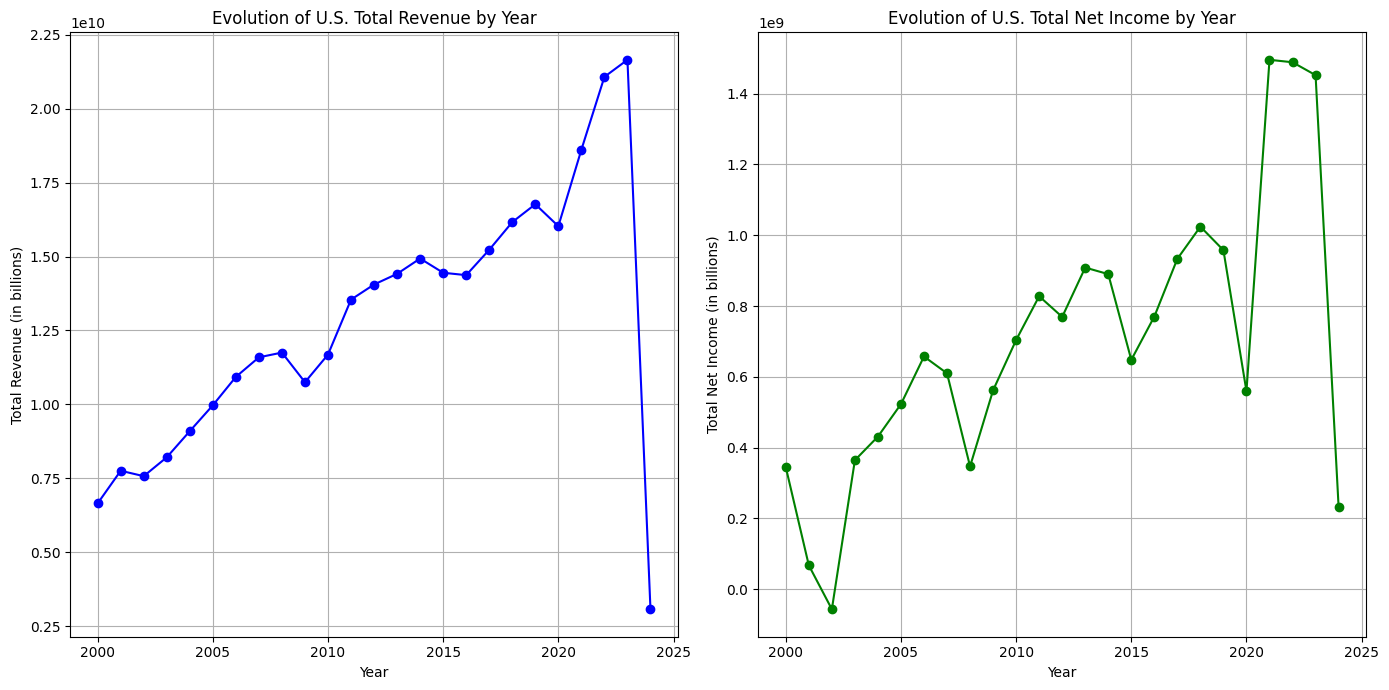

In [ ]:
yearData = df_dataus[df_dataus['fiscalmonth'] == 12]
revenueIncomeByYear = yearData.groupby('year').agg({
    'revenue': 'sum',
    'NetIncome': 'sum'
})

# Create a table showing the evolution of total revenue and total net income by year
revenueIncomeByYear_df = revenueIncomeByYear.reset_index()
revenueIncomeByYear_df.columns = ['Year', 'Total Revenue', 'Total Net Income']

# Print the table
print("Evolution of Total Revenue and Total Net Income in the U.S. by Year:")
print(revenueIncomeByYear_df)

# Plot the evolution of total revenue and total net income over the years
plt.figure(figsize=(14, 7))

# Total Revenue Graph
plt.subplot(1, 2, 1)
plt.plot(revenueIncomeByYear_df['Year'], revenueIncomeByYear_df['Total Revenue'], marker='o', color='blue')
plt.title("Evolution of U.S. Total Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue (in billions)")
plt.grid(True)

# Total Net Income Graph
plt.subplot(1, 2, 2)
plt.plot(revenueIncomeByYear_df['Year'], revenueIncomeByYear_df['Total Net Income'], marker='o', color='green')
plt.title("Evolution of U.S. Total Net Income by Year")
plt.xlabel("Year")
plt.ylabel("Total Net Income (in billions)")
plt.grid(True)

plt.tight_layout()
plt.show()

TOTAL REVENUES HAVE CONSISTENTLY BEING GROWING UP, MEANING A RISING IN PRODUCTIVITY OF THE US COMPANIES. THIS TREND REFLECTS THE OVERALL EXPANSION ACROSS VARIOUS SECTORS.

IN CONTRAST, THE NET INCOME GRAPH SHOWED EARLY FLUCTUATIONS, INCLUDING NEGATIVE INCOMES, BUT COMPANIES HAVE SINCE RECOVERED AND INCREASED PROFITS.

#Learning about one industry:

select all firms that belong to 1 industry, choices:



    Manufacturing industries

    Commercial industries (retail and wholesale)

    Service industries


M choice: Industrias manufactureras  

I CHOOSED THIS ONE BECAUSE IT HAS THE MORE DATA, AND SO IT IS MORE CHALLENGING.

In [ ]:
MySector = df_dataus[df_dataus['industria'] == 'Industrias manufactureras']
print(MySector.head(1))

             fiscalmonth    revenue       cogs       sgae  otherincome  \
firm q                                                                   
A    2001q1          3.0  2841000.0  1449000.0  1113000.0      19000.0   

             extraordinaryitems  finexp  incometax  totalassets  \
firm q                                                            
A    2001q1            -25000.0     0.0   119000.0    9208000.0   

             currentassets  ...  GrossMargin  GrossProfit      EBIT  \
firm q                      ...                                       
A    2001q1      5461000.0  ...     0.489968    1392000.0  279000.0   

             NetIncome       ROA  DebtToEquity  CurrentRatio  ProfitMargin  \
firm q                                                                       
A    2001q1   154000.0  0.016725      0.661794      1.778827      0.090879   

             BookValue   MarketVales  
firm q                                
A    2001q1  5541000.0  1.403653e+07  

[1 rows 

In [ ]:
# Calculer l'Earnings per Share (EPS)
MySector['Earnings'] = MySector['revenue'] - MySector['cogs'] - MySector['sgae'] - MySector['otherincome'] - MySector['extraordinaryitems'] - MySector['finexp'] - MySector['incometax']
MySector['EPS'] = MySector['Earnings'] / MySector['sharesoutstanding']

# Condition pour éviter les divisions par des valeurs proches de zéro
condition = (MySector['adjprice'] > 1) | (MySector['adjprice'] < -1)

# Calculer le ratio EPS/Price en respectant la condition
MySector['EPS_to_Price'] = np.where(condition, MySector['EPS'] / MySector['originalprice'], np.nan)
print(MySector['EPS_to_Price'].head(10))

df_dataus['Earnings'] = df_dataus['revenue'] - df_dataus['cogs'] - df_dataus['sgae'] - df_dataus['otherincome'] - df_dataus['extraordinaryitems'] - df_dataus['finexp'] - df_dataus['incometax']
df_dataus['EPS'] = df_dataus['Earnings'] / df_dataus['sharesoutstanding']

# Condition pour éviter les divisions par des valeurs proches de zéro
condition = (df_dataus['adjprice'] > 1) | (df_dataus['adjprice'] < -1)

# Calculer le ratio EPS/Price en respectant la condition
df_dataus['EPS_to_Price'] = np.where(condition, df_dataus['EPS'] / df_dataus['adjprice'], np.nan)



firm  q     
A     2001q1    0.011826
      2002q1   -0.022015
      2003q1    0.022108
      2004q1    0.004143
      2005q1    0.004127
      2006q1   -0.169418
      2007q1    0.010883
      2008q1    0.010285
      2009q1    0.007538
      2010q1    0.005095
Name: EPS_to_Price, dtype: float64


<ipython-input-183-96f0092d18c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MySector['Earnings'] = MySector['revenue'] - MySector['cogs'] - MySector['sgae'] - MySector['otherincome'] - MySector['extraordinaryitems'] - MySector['finexp'] - MySector['incometax']
<ipython-input-183-96f0092d18c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MySector['EPS'] = MySector['Earnings'] / MySector['sharesoutstanding']
<ipython-input-183-96f0092d18c8>:9: SettingWithCopyWarning: 
A value is trying to be set on 

In [ ]:
MySector['BookToMarket'] = MySector['BookValue'] / MySector['MarketVales']
print(MySector['BookToMarket'].head(10))
df_dataus['BookToMarket'] = df_dataus['BookValue'] / df_dataus['MarketVales']


<ipython-input-184-b2ebfeb2affa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MySector['BookToMarket'] = MySector['BookValue'] / MySector['MarketVales']


firm  q     
A     2001q1    0.394756
      2002q1    0.332685
      2003q1    0.701809
      2004q1    0.201825
      2005q1    0.345567
      2006q1    0.257078
      2007q1    0.268915
      2008q1    0.291389
      2009q1    0.484492
      2010q1    0.216993
Name: BookToMarket, dtype: float64


In [ ]:
filterData = df_dataus[
    (df_dataus['industria'] == 'Industrias manufactureras') &
    (df_dataus['fiscalmonth'] == 12) &
    (df_dataus['year'] == 2023)
]

columnsX = [
    'cc_return_y_future',
    'totalassets',
    'revenue',
    'NetIncome',
    'GrossMargin',
    'ROA',
    'CurrentRatio',
    'DebtToEquity',
    'BookValue',
    'MarketVales',
    'EPS_to_Price',
    'BookToMarket'
]

cleanData = filterData[columnsX].dropna()

descriptiveStats = cleanData.describe()

print("descriptives stats:")
print(descriptiveStats.round(3))

descriptives stats:
       cc_return_y_future   totalassets       revenue   NetIncome  \
count               5.000  5.000000e+00  5.000000e+00       5.000   
mean               -2.610  9.929505e+06  8.524930e+06  568016.000   
std                 1.599  7.735848e+06  6.378726e+06  361474.992   
min                -5.028  2.308871e+06  2.698419e+06  123416.000   
25%                -3.124  3.426953e+06  4.772400e+06  388864.000   
50%                -2.545  8.426700e+06  5.090830e+06  450000.000   
75%                -1.224  1.503400e+07  1.201000e+07  895000.000   
max                -1.128  2.045100e+07  1.805300e+07  982800.000   

       GrossMargin    ROA  CurrentRatio  DebtToEquity     BookValue  \
count        5.000  5.000         5.000         5.000  5.000000e+00   
mean         0.308  0.079         2.027         1.630  4.503109e+06   
std          0.153  0.061         1.023         1.524  4.210071e+06   
min          0.125  0.030         1.043         0.385  1.077061e+06   
25%

Earnings per share divided by price:

#Book to Market:

#Correlation matrix:

We generate our correlation matrix with all the ratios we will use in our model, that will try to predict the variable 'cc_return_y_future', so it will be our dependent/ target variable, that our model will try to predict.

 in the case of totalassets, revenue and netincome, I used the logarithmic transformation of their values. This will help us handling with outliers, reducing the variablitiy, specially later, with our model. First we just had to make sure there was any zero/NaN value because de log of zero is minus infinite, considering the large amount of zeros, a prefered to not drop them but replace them by small number: o.01, log(0.01) is equal to -2.

<ipython-input-186-12f546f6d2ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataMatrix['totalassets'] = DataMatrix['totalassets'].replace(0, 0.01)
<ipython-input-186-12f546f6d2ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataMatrix['revenue'] = DataMatrix['revenue'].replace(0, 0.01)
<ipython-input-186-12f546f6d2ec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Correlation Matrix:

                    cc_return_y_future  log_totalassets  log_revenue  \
cc_return_y_future                1.00             0.06         0.08   
log_totalassets                   0.06             1.00         0.88   
log_revenue                       0.08             0.88         1.00   
log_NetIncome                     0.05             0.88         0.79   
ROA                              -0.04            -0.06         0.00   
CurrentRatio                     -0.05            -0.32        -0.43   
DebtToEquity                     -0.01             0.04         0.03   
GrossMargin                      -0.02            -0.07        -0.18   
BookValue                         0.01             0.51         0.43   
MarketVales                      -0.01             0.39         0.34   
EPS_to_Price                      0.12             0.01         0.01   
BookToMarket                      0.05             0.01         0.01   

                    log_NetIncome   ROA  C

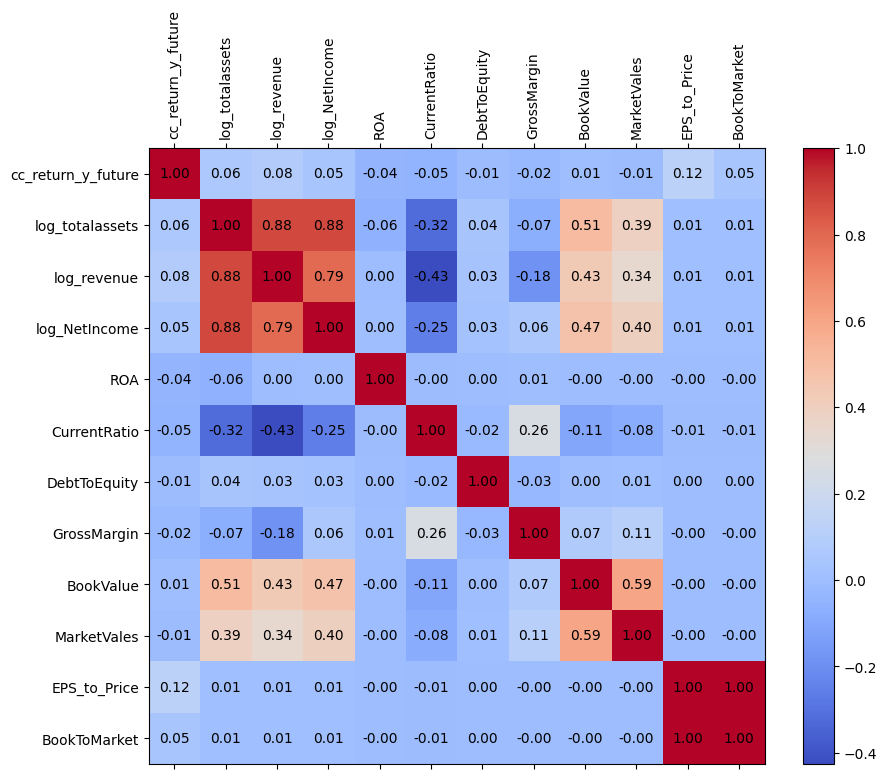

In [ ]:
DataMatrix = df_dataus[
    (df_dataus['industria'] == 'Industrias manufactureras') &
    (df_dataus['fiscalmonth'] == 12)
]

# Replace zeros with a small positive number before logarithmic transformation
DataMatrix['totalassets'] = DataMatrix['totalassets'].replace(0, 0.01)
DataMatrix['revenue'] = DataMatrix['revenue'].replace(0, 0.01)
DataMatrix['NetIncome'] = DataMatrix['NetIncome'].replace(0, 0.01)

# Apply logarithmic transformation
DataMatrix['log_totalassets'] = np.log(DataMatrix['totalassets'])
DataMatrix['log_revenue'] = np.log(DataMatrix['revenue'])
DataMatrix['log_NetIncome'] = np.log(DataMatrix['NetIncome'])

# Drop any rows that still have NaN values after transformations
DataMatrix = DataMatrix.dropna(subset=['log_totalassets', 'log_revenue', 'log_NetIncome'])

# Calculate the correlation matrix for the selected and transformed variables
correlation_matrix = DataMatrix[[
    'cc_return_y_future',
    'log_totalassets',
    'log_revenue',
    'log_NetIncome',
    'ROA',
    'CurrentRatio',
    'DebtToEquity',
    'GrossMargin',
    'BookValue',
    'MarketVales',
    'EPS_to_Price',
    'BookToMarket'
]].corr()

# Display the correlation matrix
print("Correlation Matrix:\n")
print(correlation_matrix.round(2))

# Create the figure and axes for plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Display the correlation matrix with a heatmap
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add a color bar to show the correlation scale
fig.colorbar(cax)

# Set ticks on x and y axes with the names of the variables
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))

# Assign names to the ticks on the axes
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# Add the correlation values inside the cells
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                ha='center', va='center', color='black')

# Show the plot
plt.show()

Which variables have strongest and significant linear relationship with stock returns (annual returns)?


-The highest positive correlation with cc_return_y_future is observed with eps_to_price (0.12). This suggests that companies with higher eps to price ratio tend to have higher future returns. We also have BookToMarket, log_revenue & log_totalassest that shows a significant correlation, with respectivly 0.05 and 0.08 and 0.06 value.

-The lower negative correlation with cc_return_y_future is observed with Current ratio (-0.05) and ROA (-0.04). This might imply that industries or periods where companies have higher gross margins and/or ROA (return on assets)do not necessarily correlate with higher future returns.

#new: WEIGHTED AVERAGE FOR MY RATIOS on MySector industrial:

For each ratio, the weighted average is computed by multiplying each value by itself (to use the ratio's value as the weight), summing these products (weighted sum), and then dividing by the sum of the ratio's values (total weight). The code handles edge cases like NaN, infinite values, and zeros to ensure that the calculation is robust, but of course without deleting it from the original dataset.

In [ ]:

# Liste des ratios
ratios = ['BookValue', 'MarketVales', 'ROA', 'CurrentRatio', 'DebtToEquity', 'GrossMargin', 'EPS_to_Price', 'BookToMarket']

# Dictionnaire pour stocker les résultats
weighted_averages = {}

# Calcul de la moyenne pondérée pour chaque ratio
for ratio in ratios:
    # Exclure les NaN, les infinis, et les zéros
    valid_data = MySector[ratio].replace([np.inf, -np.inf], np.nan).dropna()  # Remplace les infinis par NaN, puis les exclut
    valid_data = valid_data[valid_data != 0]  # Exclure les zéros car ils ne peuvent pas être des poids

    if len(valid_data) > 0:
        weighted_sum = (valid_data * valid_data).sum()  # somme pondérée
        total_weight = valid_data.sum()  # somme des poids (le ratio lui-même)

        if total_weight != 0:
            weighted_avg = weighted_sum / total_weight
        else:
            weighted_avg = np.nan  # Si la somme des poids est nulle, renvoyer NaN
    else:
        weighted_avg = np.nan  # Si toutes les valeurs sont NaN ou nulles

    weighted_averages[ratio] = weighted_avg

# Affichage des moyennes pondérées
for ratio, avg in weighted_averages.items():
    print(f"WEIGHTED MEAN FOR {ratio} (WEIGHTED BY {ratio}): {avg}")

WEIGHTED MEAN FOR BookValue (WEIGHTED BY BookValue): 40423331.83798429
WEIGHTED MEAN FOR MarketVales (WEIGHTED BY MarketVales): 269614247.12677497
WEIGHTED MEAN FOR ROA (WEIGHTED BY ROA): 78921.63639846515
WEIGHTED MEAN FOR CurrentRatio (WEIGHTED BY CurrentRatio): 14.654260782431205
WEIGHTED MEAN FOR DebtToEquity (WEIGHTED BY DebtToEquity): 13044.692541914292
WEIGHTED MEAN FOR GrossMargin (WEIGHTED BY GrossMargin): 99.67254614148221
WEIGHTED MEAN FOR EPS_to_Price (WEIGHTED BY EPS_to_Price): -15034625.474214474
WEIGHTED MEAN FOR BookToMarket (WEIGHTED BY BookToMarket): 10550260.08032761


The dataframe we are going to use for the regression model and that we aregoing to clean later:

In [ ]:
MySector = df_dataus[df_dataus['industria'] == 'Industrias manufactureras']
print(MySector.head(4))

             fiscalmonth    revenue       cogs       sgae  otherincome  \
firm q                                                                   
A    2001q1          3.0  2841000.0  1449000.0  1113000.0      19000.0   
     2002q1          3.0  1426000.0   878000.0   990000.0      19000.0   
     2003q1          3.0  1412000.0   883000.0   785000.0       4000.0   
     2004q1          3.0  1643000.0   904000.0   660000.0       4000.0   

             extraordinaryitems  finexp  incometax  totalassets  \
firm q                                                            
A    2001q1            -25000.0     0.0   119000.0    9208000.0   
     2002q1              2000.0     0.0  -106000.0    8558000.0   
     2003q1           -257000.0     0.0  -140000.0    7770000.0   
     2004q1                 0.0     0.0    12000.0    6384000.0   

             currentassets  ...       ROA  DebtToEquity  CurrentRatio  \
firm q                      ...                                         
A    2

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove NaN values and handle infinite values by replacing them with NaN and then dropping
# For the moment we do that

data = MySector.replace([np.inf, -np.inf], np.nan).dropna()

# Define the ratios to be used as features
ratios = ['BookValue', 'MarketVales', 'ROA', 'CurrentRatio', 'DebtToEquity', 'GrossMargin', 'EPS_to_Price','BookToMarket']
X = data[ratios]
y = data['cc_return_q_future']

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Set up and fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Summarize and print the model results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     cc_return_q_future   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     47.51
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.71e-77
Time:                        04:12:19   Log-Likelihood:                -81367.
No. Observations:               67486   AIC:                         1.628e+05
Df Residuals:                   67477   BIC:                         1.628e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0308      0.004      7.183   

#Interpretation of the model:

-R-squared (0.006): This value is very low, it indicates that the model explains less than 0.6% of the variance in future quarterly returns. So for the moment it does not predict the 'cc_return_q_future' (our dependent variable)good at all. We expect better R-squared for the next part, after the data management/cleaning it will be different.

-Gross Margin (Coefficient: 0.0043): A higher gross margin is associated with slightly higher future returns, with quasi-statistical significance (p-value < 0.05). This suggests that more efficient use of assets correlates positively with future performance.

-For the CurrentRatio, the negative beta coefficient of -0.0098 implies that as the CurrentRatio increases by one unit, the cc_return_q_future (future quarterly returns) are expected to decrease by 0.0009 units. This relationship suggests a slight negative impact on the returns.

- "const -0.0308": this mean that if all our ratios are fixed to zero, the dependent variable cc_return_q_future will dicrease of .0308 .

#From here we will analize a little more deeply our data, checking and adjusting our outliers, zero values and NaN values. This should increase the R-squared, and so the ability of our model to predict the future cc return:



1.   Hat matrix
2.   outliers
3.   student residual
4.   cook distance
5.   DFFTITS
6.   Winsorisation

#NetIncome:

Using the hat matrix, from influence OLS, statsmodel package, we are going to see if there are outliers. Then we are going to have our leverage points (negative and positve), and  those ones will fix a minumum/ maximum value, that our NetIncome values are not going to surpass. It is a very important phase in our process because the outliers weigh too much, influencing our coefficient, and so the ability of our model to predict the future ratios. This method will be re-used along the ratios.


Technocally that is what we are doing:

-We fixe our ratios that we are going to use in the model in 'ratios', we define our target/dependent vairable: 'cc_rturn_q_future'. Then we replace the potentially infinte values (it could be some because for some ratios we divide by zero or numbers next to zero). Afet that we setup/fix the OLS regression model, that way we can use it for calculate the hat matrix, with that, we use the diagonal of the matrix (simple addition), and with that we get the leverage points. Our leverage points here are those ones who overpass of three times the standard deviation, from the mean. Afet that we just filter the points for 'NetIncome', the ratio we are adjusting in this subchapter.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Supposons que MySector est déjà chargé et préparé
# Define the ratios to be used as features
ratios = ['GrossMargin', 'GrossProfit', 'EBIT', 'ROA',
          'DebtToEquity', 'CurrentRatio', 'ProfitMargin', 'BookValue',
          'MarketVales', 'NetIncome', 'BookToMarket', 'EPS_to_Price']

# Define the target variable
X = MySector[ratios].copy()  # Make a copy to avoid SettingWithCopyWarning
y = MySector['cc_return_q_future'].copy()

# Step 1: Replace inf values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows with NaN values in X or y
X.dropna(inplace=True)
y = y[X.index]  # Keep only the corresponding y values

# Add a constant for the intercept (bias)
X = sm.add_constant(X)

# Step 3: Fit the OLS model (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Influence OLS to get the Hat Matrix and leverage points
influence = model.get_influence()

# Get the diagonal of the Hat Matrix (leverage points)
hat_matrix_diag = influence.hat_matrix_diag

# Detect leverage points (consider a leverage point if it exceeds 2 * p/n where p is the number of variables)
n = X.shape[0]  # Number of observations
p = X.shape[1]  # Number of predictors + 1 (intercept)

threshold = 2 * (p / n)  # Threshold for leverage points
leverage_points = np.where(hat_matrix_diag > threshold)[0]

# Calcul du seuil critique
leverage_mean = np.mean(hat_matrix_diag)
leverage_std = np.std(hat_matrix_diag)

# On considère ici un leverage point comme critique s'il dépasse 3 fois l'écart-type de la moyenne
critical_threshold = leverage_mean + 3 * leverage_std

# Filtrer les leverage points critiques
critical_leverage_df = pd.DataFrame({
    'Index': leverage_points,
    'Leverage Value': hat_matrix_diag[leverage_points]
})
critical_leverage_df = critical_leverage_df[critical_leverage_df['Leverage Value'] > critical_threshold]

MySector = MySector.reset_index(drop=True)
# Filtrer les observations avec les points de levier critiques
critical_obs = MySector.loc[critical_leverage_df['Index']]

# Examiner les valeurs de 'NetIncome' pour ces observations
critical_net_income_values = critical_obs['NetIncome']

# Afficher les valeurs critiques de 'NetIncome'
print("Critical 'NetIncome' Values:")
print(critical_net_income_values.describe())

# Déterminer un seuil critique basé sur ces valeurs critiques
net_income_threshold = critical_net_income_values.max()  # par exemple, choisir la valeur maximale comme seuil

print(f"Critical Threshold for 'NetIncome': {net_income_threshold}")

Critical 'NetIncome' Values:
count    3.500000e+01
mean     1.012504e+06
std      1.673610e+06
min     -3.568520e+05
25%     -3.851327e+03
50%      1.080600e+04
75%      2.372500e+06
max      6.243000e+06
Name: NetIncome, dtype: float64
Critical Threshold for 'NetIncome': 6243000.0


Let's see what those values mean:


1.   Count 35: in an human language, this mean that there are 35 values that have a significant impact on the model, due to their extrem values.
Let's print the data of the most extgrem one, just by curiosity, to see if there is a error.




In [ ]:
# Trouver la ligne avec le maximum 'NetIncome'
max_net_income_row = MySector.loc[MySector['NetIncome'].idxmax()]

# Afficher toutes les valeurs pour cette observation
print("Observation with the Maximum 'NetIncome':")
print(max_net_income_row)

Observation with the Maximum 'NetIncome':
fiscalmonth                                 9.0
revenue                              71847000.0
cogs                                 79368000.0
sgae                                  9992000.0
otherincome                         127482000.0
extraordinaryitems                    1473000.0
finexp                                4487000.0
incometax                            -1305000.0
totalassets                         144344000.0
currentassets                        68344000.0
inventory                            10610000.0
totalliabilities                    125099000.0
currentliabilities                   58780000.0
longdebt                              2659000.0
adjprice                                    NaN
originalprice                               NaN
sharesoutstanding                      500000.0
year                                       2009
fixedassets                          18644000.0
yearf                                    2009.

Here we notice that there was any errors, it is General Motors Company, a huge car company that owns for example Chevrolet, GMC and Cadillac.

But even if the data contains no mistakes, we have to modify the outliers.

Let's see now the lower value:

In [ ]:
# Trouver la ligne avec le min 'NetIncome'
min_net_income_row = MySector.loc[MySector['NetIncome'].idxmin()]

# Afficher toutes les valeurs pour cette observation
print("Observation with the Min 'NetIncome':")
print(min_net_income_row)

Observation with the Min 'NetIncome':
fiscalmonth                                12.0
revenue                               3232800.0
cogs                                  2306700.0
sgae                                 57273500.0
otherincome                           -194900.0
extraordinaryitems                          0.0
finexp                                 -48500.0
incometax                             -371900.0
totalassets                          12245400.0
currentassets                         3036300.0
inventory                              287600.0
totalliabilities                      1538900.0
currentliabilities                     848500.0
longdebt                                12800.0
adjprice                                  56.85
originalprice                              12.5
sharesoutstanding                   1143169.711
year                                       2001
fixedassets                           1173000.0
yearf                                    2001.0
ct

We also notice that the very low value is not due to an error or mmissing values.

Mean NetIncome: 243097.97260988536
Standard Deviation of NetIncome: 1763247.0304587747
Number of Instances: 98125


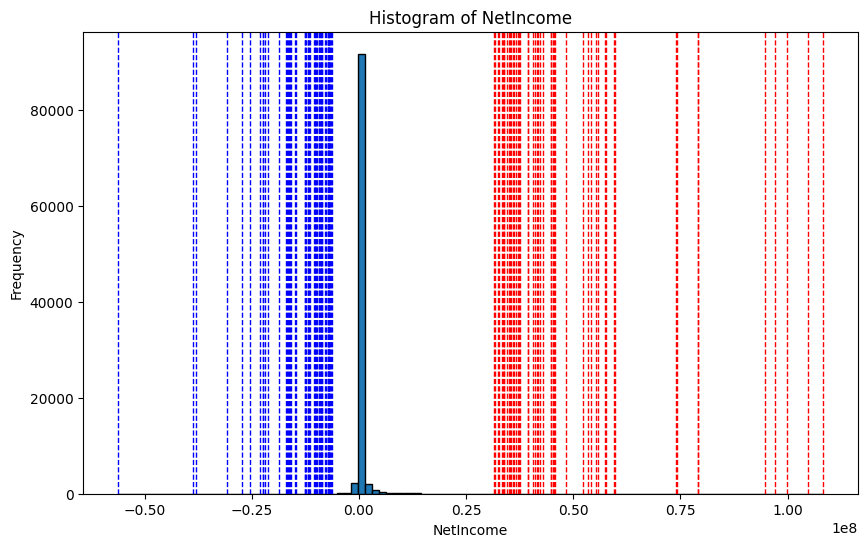

In [ ]:
# Calculate the mean, standard deviation, and the number of instances of the 'NetIncome' column
mean_net_income = MySector['NetIncome'].mean()
std_dev_net_income = MySector['NetIncome'].std()
count_net_income = MySector['NetIncome'].count()

# Print the calculated values
print(f"Mean NetIncome: {mean_net_income}")
print(f"Standard Deviation of NetIncome: {std_dev_net_income}")
print(f"Number of Instances: {count_net_income}")

# Create a histogram for the 'NetIncome' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['NetIncome'], bins=100, edgecolor='black')
plt.title('Histogram of NetIncome')
plt.xlabel('NetIncome')
plt.ylabel('Frequency')

# Identify the 80 most extreme positive and 3 most extreme negative values
extreme_high = MySector['NetIncome'].nlargest(50)
extreme_low = MySector['NetIncome'].nsmallest(50)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()

This histogram help us to vuzualize the repartition of the data, the blue lines are the 50 lower values, and the red one are the 50 larger values.

Minimum: -1.224300e+06

Maximum:   4.605000e+06

Those are our leverage points

In [ ]:
MySector['NetIncome'] = MySector['NetIncome'].clip(lower=-1224300, upper=4605000)

# Afficher les statistiques pour vérifier les modifications
print(MySector['NetIncome'].describe())

count    9.812500e+04
mean     1.819144e+05
std      6.962212e+05
min     -1.224300e+06
25%     -1.365600e+04
50%      5.500000e+03
75%      8.670000e+04
max      4.605000e+06
Name: NetIncome, dtype: float64


Mean NetIncome: 181914.42439152102
Standard Deviation of NetIncome: 696221.2286692056
Number of Instances: 98125


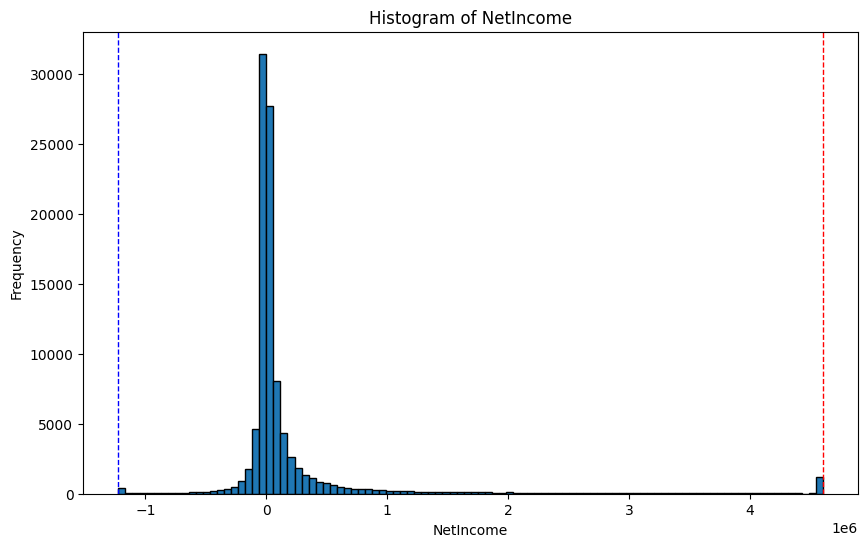

In [ ]:
# Calculate the mean, standard deviation, and the number of instances of the 'NetIncome' column
mean_net_income = MySector['NetIncome'].mean()
std_dev_net_income = MySector['NetIncome'].std()
count_net_income = MySector['NetIncome'].count()

# Print the calculated values
print(f"Mean NetIncome: {mean_net_income}")
print(f"Standard Deviation of NetIncome: {std_dev_net_income}")
print(f"Number of Instances: {count_net_income}")

# Create a histogram for the 'NetIncome' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['NetIncome'], bins=100, edgecolor='black')
plt.title('Histogram of NetIncome')
plt.xlabel('NetIncome')
plt.ylabel('Frequency')

# Identify the 80 most extreme positive and 3 most extreme negative values
extreme_high = MySector['NetIncome'].nlargest(1)
extreme_low = MySector['NetIncome'].nsmallest(1)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()

#Market Value:

In [ ]:
print(MySector['MarketVales'].describe())

count    9.591900e+04
mean     9.473782e+06
std      4.964413e+07
min      0.000000e+00
25%      2.111057e+05
50%      1.145527e+06
75%      4.142741e+06
max      3.229664e+09
Name: MarketVales, dtype: float64


Mean MarketVales: 9473782.314793168
Standard Deviation of MarketVales: 49644131.867391914
Number of Instances: 95919


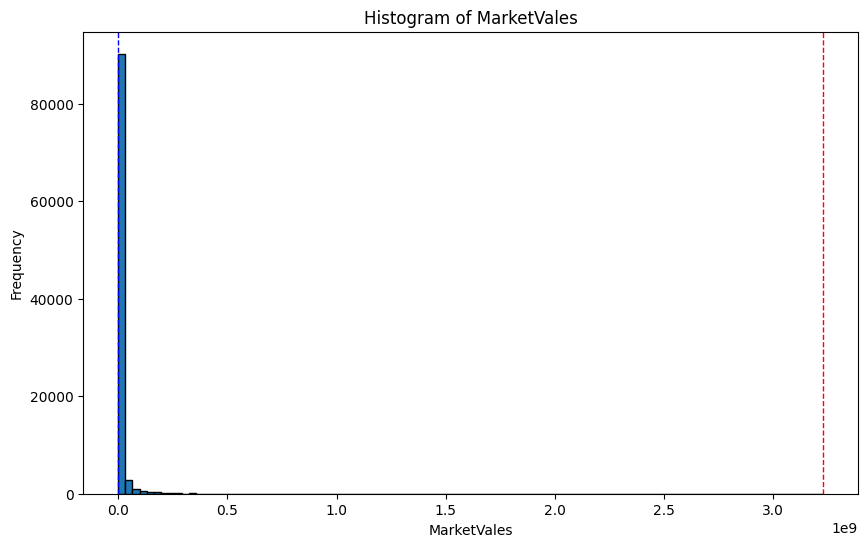

In [ ]:
# Calculate the mean, standard deviation, and the number of instances of the 'MarketVales' column
mean_market_vales = MySector['MarketVales'].mean()
std_dev_market_vales = MySector['MarketVales'].std()
count_market_vales = MySector['MarketVales'].count()

# Print the calculated values
print(f"Mean MarketVales: {mean_market_vales}")
print(f"Standard Deviation of MarketVales: {std_dev_market_vales}")
print(f"Number of Instances: {count_market_vales}")

# Create a histogram for the 'MarketVales' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['MarketVales'], bins=100, edgecolor='black')
plt.title('Histogram of MarketVales')
plt.xlabel('MarketVales')
plt.ylabel('Frequency')

# Identify the 1 most extreme positive and 1 most extreme negative value
extreme_high = MySector['MarketVales'].nlargest(1)
extreme_low = MySector['MarketVales'].nsmallest(1)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()

What we did is changing the extrem values, here is the new histogram.

For this one, I will put a threshold that I choosed and judged pertinent: 100 millions. Let's see first how many instances are larger than that:

In [ ]:
# Calculer le nombre d'instances où 'MarketVales' est supérieur à 500 millions
large_market_values_count = (MySector['MarketVales'] > 100e6).sum()

# Afficher le résultat
print(f"Number of instances with 'MarketVales' greater than 100 million: {large_market_values_count}")


Number of instances with 'MarketVales' greater than 100 million: 1929


In [ ]:
MySector['MarketVales'] = MySector['MarketVales'].clip(lower=0.1, upper=100000000)
print(MySector['MarketVales'].describe())

count    9.591900e+04
mean     7.036793e+06
std      1.782495e+07
min      1.000000e-01
25%      2.111057e+05
50%      1.145527e+06
75%      4.142741e+06
max      1.000000e+08
Name: MarketVales, dtype: float64


Mean MarketVales: 7036793.192483108
Standard Deviation of MarketVales: 17824950.087675367
Number of Instances: 95919


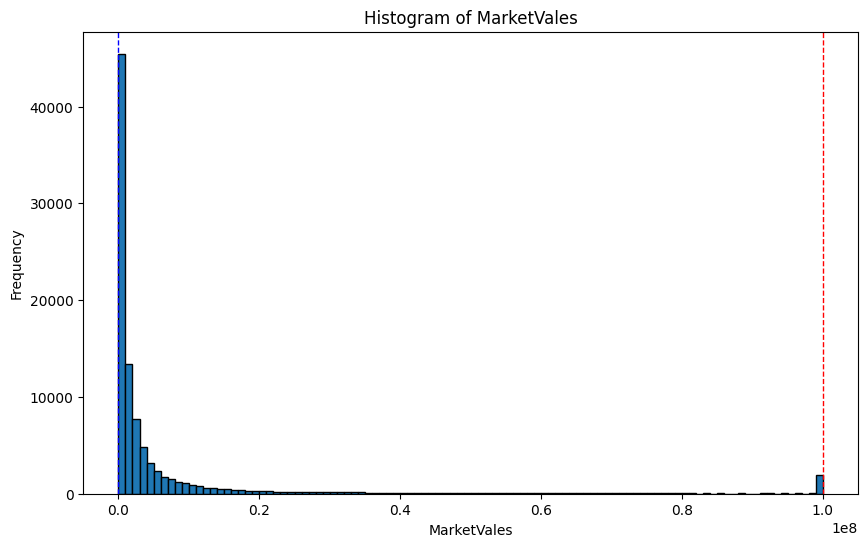

In [ ]:
# Calculate the mean, standard deviation, and the number of instances of the 'MarketVales' column
mean_market_vales = MySector['MarketVales'].mean()
std_dev_market_vales = MySector['MarketVales'].std()
count_market_vales = MySector['MarketVales'].count()

# Print the calculated values
print(f"Mean MarketVales: {mean_market_vales}")
print(f"Standard Deviation of MarketVales: {std_dev_market_vales}")
print(f"Number of Instances: {count_market_vales}")

# Create a histogram for the 'MarketVales' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['MarketVales'], bins=100, edgecolor='black')
plt.title('Histogram of MarketVales')
plt.xlabel('MarketVales')
plt.ylabel('Frequency')

# Identify the 1 most extreme positive and 1 most extreme negative value
extreme_high = MySector['MarketVales'].nlargest(1)
extreme_low = MySector['MarketVales'].nsmallest(1)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()

#ROA

Mean ROA: 0.31976175072609636
Standard Deviation of ROA: 158.85929487310517
Number of Instances: 98123


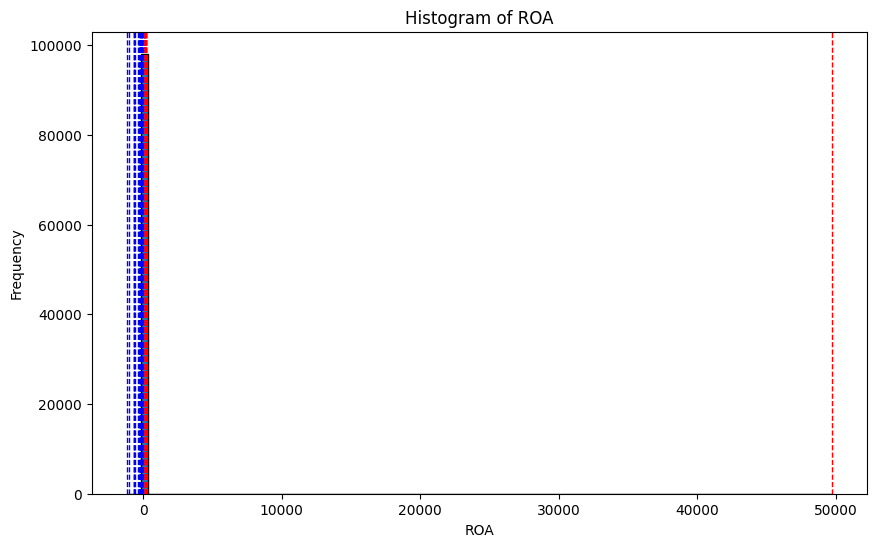

In [ ]:

# Calculate the mean, standard deviation, and the number of instances of the 'ROA' column
mean_roa = MySector['ROA'].mean()
std_dev_roa = MySector['ROA'].std()
count_roa = MySector['ROA'].count()

# Print the calculated values
print(f"Mean ROA: {mean_roa}")
print(f"Standard Deviation of ROA: {std_dev_roa}")
print(f"Number of Instances: {count_roa}")

# Create a histogram for the 'ROA' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['ROA'], bins=100, edgecolor='black')
plt.title('Histogram of ROA')
plt.xlabel('ROA')
plt.ylabel('Frequency')

# Identify the 1 most extreme positive and 1 most extreme negative value
extreme_high = MySector['ROA'].nlargest(30)
extreme_low = MySector['ROA'].nsmallest(30)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()

In [ ]:
# Utiliser nlargest pour obtenir les deux plus grandes valeurs de ROA
top_two_roa = MySector['ROA'].nlargest(2)

# Accéder à la deuxième plus grande valeur
second_largest_roa = top_two_roa.iloc[1]

# Afficher la deuxième plus grande valeur de ROA
print(f"Second largest ROA value: {second_largest_roa}")


Second largest ROA value: 226.31037924151696


In [ ]:
MySector['ROA'] = MySector['ROA'].clip(upper=second_largest_roa)
print(MySector['ROA'].describe())

count    98123.000000
mean        -0.184530
std          7.357948
min      -1149.110883
25%         -0.098301
50%          0.009792
75%          0.043206
max        226.310379
Name: ROA, dtype: float64


Mean ROA: -0.18453018114847325
Standard Deviation of ROA: 7.357948421075872
Number of Instances: 98123


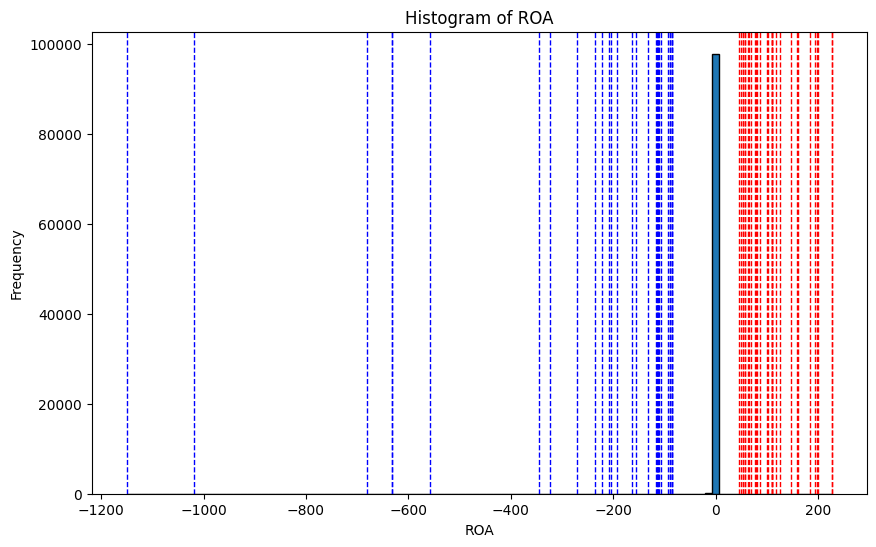

In [ ]:
# Calculate the mean, standard deviation, and the number of instances of the 'ROA' column
mean_roa = MySector['ROA'].mean()
std_dev_roa = MySector['ROA'].std()
count_roa = MySector['ROA'].count()

# Print the calculated values
print(f"Mean ROA: {mean_roa}")
print(f"Standard Deviation of ROA: {std_dev_roa}")
print(f"Number of Instances: {count_roa}")

# Create a histogram for the 'ROA' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['ROA'], bins=100, edgecolor='black')
plt.title('Histogram of ROA')
plt.xlabel('ROA')
plt.ylabel('Frequency')

# Identify the 1 most extreme positive and 1 most extreme negative value
extreme_high = MySector['ROA'].nlargest(30)
extreme_low = MySector['ROA'].nsmallest(30)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()

In [ ]:
MySector['ROA'] = MySector['ROA'].clip(lower=-190)
print(MySector['ROA'].describe())

count    98123.000000
mean        -0.143655
std          3.729935
min       -190.000000
25%         -0.098301
50%          0.009792
75%          0.043206
max        226.310379
Name: ROA, dtype: float64


#GrossProfit:

In [ ]:
max_non_infinite = MySector.loc[np.isfinite(MySector['GrossProfit']), 'GrossProfit'].max()
min_non_infinite = MySector.loc[np.isfinite(MySector['GrossProfit']), 'GrossProfit'].min()

# Remplacer les valeurs infinies positives par la plus grande valeur non infinie
MySector['GrossProfit'].replace([np.inf], max_non_infinite, inplace=True)

# Remplacer les valeurs infinies négatives par la plus petite valeur non infinie
MySector['GrossProfit'].replace([-np.inf], min_non_infinite, inplace=True)
MySector['WeightFactor'] = MySector['totalassets'] / MySector['totalassets'].max()

# Étape 3: Appliquer la pondération à GrossProfit
MySector['WeightedGrossProfit'] = MySector['GrossProfit'] * MySector['WeightFactor']

<ipython-input-206-649a0ab27b00>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  MySector['GrossProfit'].replace([np.inf], max_non_infinite, inplace=True)
<ipython-input-206-649a0ab27b00>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

Mean WeightedGrossProfit: 158162.84822912453
Standard Deviation of WeightedGrossProfit: 2499650.091069958
Number of Instances: 98278


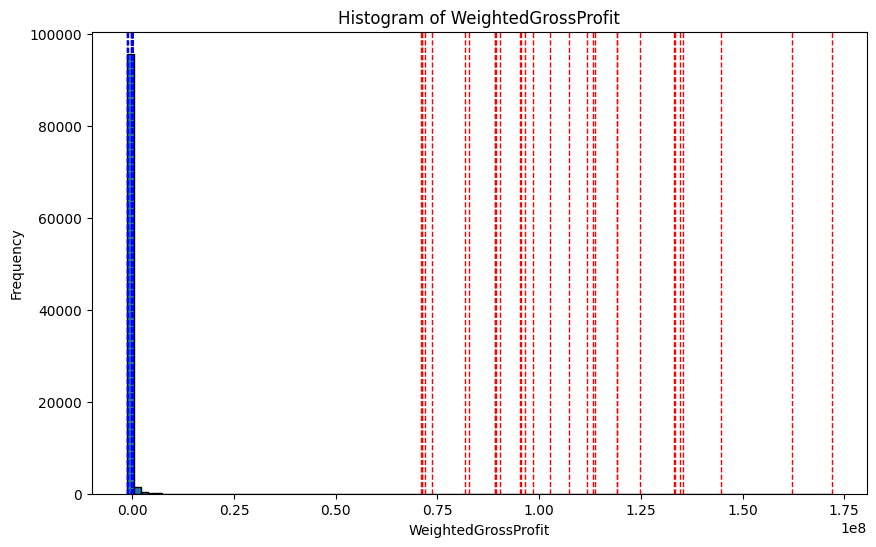

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean, standard deviation, and the number of instances of the 'WeightedGrossProfit' column
mean_weighted_gross_profit = MySector['WeightedGrossProfit'].mean()
std_dev_weighted_gross_profit = MySector['WeightedGrossProfit'].std()
count_weighted_gross_profit = MySector['WeightedGrossProfit'].count()

# Print the calculated values
print(f"Mean WeightedGrossProfit: {mean_weighted_gross_profit}")
print(f"Standard Deviation of WeightedGrossProfit: {std_dev_weighted_gross_profit}")
print(f"Number of Instances: {count_weighted_gross_profit}")

# Create a histogram for the 'WeightedGrossProfit' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['WeightedGrossProfit'], bins=100, edgecolor='black')
plt.title('Histogram of WeightedGrossProfit')
plt.xlabel('WeightedGrossProfit')
plt.ylabel('Frequency')

# Identify the 30 most extreme positive and 30 most extreme negative values
extreme_high = MySector['WeightedGrossProfit'].nlargest(30)
extreme_low = MySector['WeightedGrossProfit'].nsmallest(30)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()


#GrossMargin:

<ipython-input-208-14f989306332>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  MySector['GrossMargin'].replace([np.inf], max_non_infinite, inplace=True)
<ipython-input-208-14f989306332>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

La plus grande valeur de GrossMargin est : 1.4797512207505188
La plus petite valeur de GrossMargin est : -988.75
Mean Gross Margin: 0.34760413683878283
Standard Deviation of Gross Margin: 5.87589514253654
Number of Instances: 90148


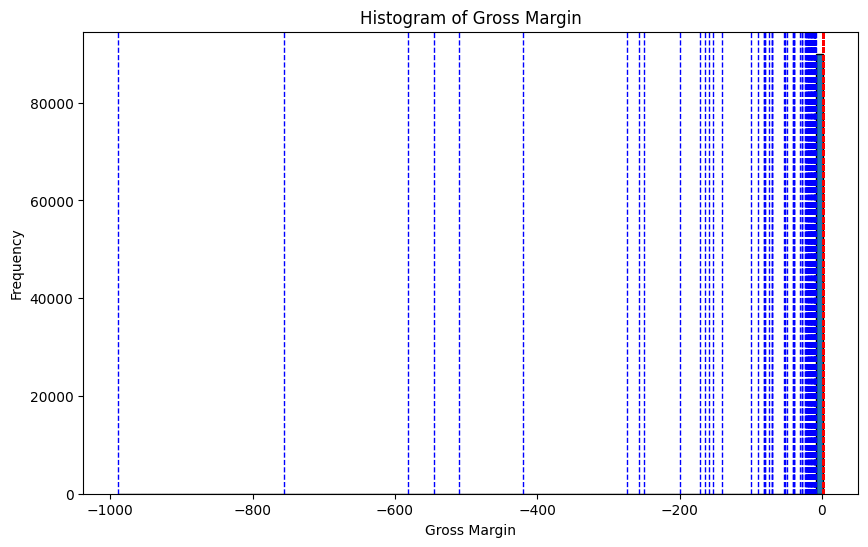

In [ ]:
# Trouver la plus grande et la plus petite valeur non infinie de 'GrossMargin'
max_non_infinite = MySector.loc[np.isfinite(MySector['GrossMargin']), 'GrossMargin'].max()
min_non_infinite = MySector.loc[np.isfinite(MySector['GrossMargin']), 'GrossMargin'].min()

# Remplacer les valeurs infinies positives par la plus grande valeur non infinie
MySector['GrossMargin'].replace([np.inf], max_non_infinite, inplace=True)

# Remplacer les valeurs infinies négatives par la plus petite valeur non infinie
MySector['GrossMargin'].replace([-np.inf], min_non_infinite, inplace=True)

# Trouver la plus grande valeur de la colonne 'GrossMargin'
max_gross_margin = MySector['GrossMargin'].max()

# Afficher la plus grande valeur
print("La plus grande valeur de GrossMargin est :", max_gross_margin)

# Trouver la plus grande valeur de la colonne 'GrossMargin'
min_gross_margin = MySector['GrossMargin'].min()

# Afficher la plus grande valeur
print("La plus petite valeur de GrossMargin est :", min_gross_margin)


# Calculate the mean, standard deviation, and the number of instances of the 'GrossMargin' column
mean_gross_margin = MySector['GrossMargin'].mean()
std_dev_gross_margin = MySector['GrossMargin'].std()
count_gross_margin = MySector['GrossMargin'].count()

# Print the calculated values
print(f"Mean Gross Margin: {mean_gross_margin}")
print(f"Standard Deviation of Gross Margin: {std_dev_gross_margin}")
print(f"Number of Instances: {count_gross_margin}")

# Create a histogram for the 'GrossMargin' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['GrossMargin'], bins=100, edgecolor='black')
plt.title('Histogram of Gross Margin')
plt.xlabel('Gross Margin')
plt.ylabel('Frequency')

# Identify the three most extreme positive and negative values
extreme_high = MySector['GrossMargin'].nlargest(200)
extreme_low = MySector['GrossMargin'].nsmallest(120)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()


In [ ]:
# Définir les seuils pour Gross Margin
upper_threshold = 1.0  # 100%
lower_threshold = -1.0  # -100%

# Remplacer les valeurs qui dépassent les seuils
MySector['GrossMargin'] = MySector['GrossMargin'].apply(
    lambda x: upper_threshold if x > upper_threshold else lower_threshold if x < lower_threshold else x
)

Mean Gross Margin: 0.44444499312837704
Standard Deviation of Gross Margin: 0.30243092022100615
Number of Instances: 90148


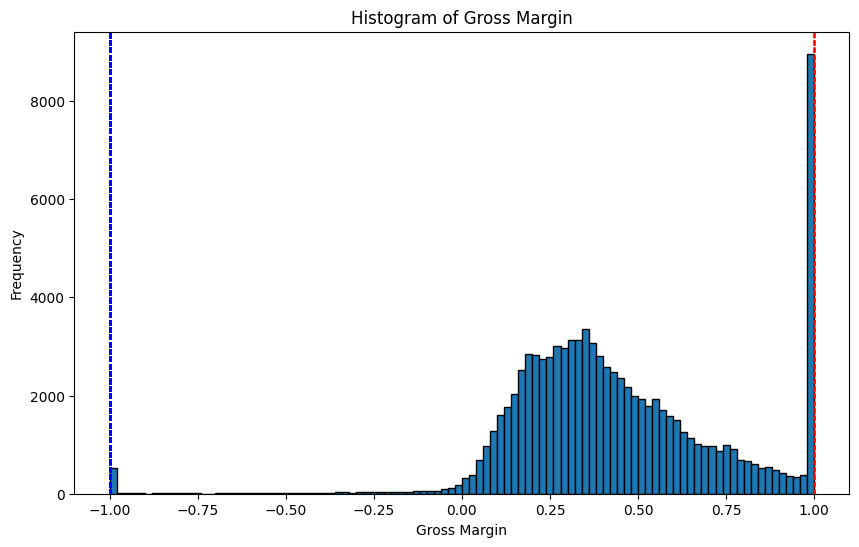

In [ ]:

# Calculate the mean, standard deviation, and the number of instances of the 'GrossMargin' column
mean_gross_margin = MySector['GrossMargin'].mean()
std_dev_gross_margin = MySector['GrossMargin'].std()
count_gross_margin = MySector['GrossMargin'].count()

# Print the calculated values
print(f"Mean Gross Margin: {mean_gross_margin}")
print(f"Standard Deviation of Gross Margin: {std_dev_gross_margin}")
print(f"Number of Instances: {count_gross_margin}")

# Create a histogram for the 'GrossMargin' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['GrossMargin'], bins=100, edgecolor='black')
plt.title('Histogram of Gross Margin')
plt.xlabel('Gross Margin')
plt.ylabel('Frequency')

# Identify the three most extreme positive and negative values
extreme_high = MySector['GrossMargin'].nlargest(7)
extreme_low = MySector['GrossMargin'].nsmallest(120)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()


Even if it is possible, and some campanies do it, I choosed to put the highest value as one, because it is already considered as a very high Gross Margin. Same thing for negative and smaller than minus one values.

#EBIT:

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Supposons que MySector est déjà chargé et préparé
# Définir les ratios utilisés comme variables explicatives
ratios = ['GrossMargin', 'GrossProfit', 'EBIT', 'ROA',
          'DebtToEquity', 'CurrentRatio', 'ProfitMargin', 'BookValue',
          'MarketVales', 'NetIncome', 'BookToMarket', 'EPS_to_Price']

# Définir la variable cible
X = MySector[ratios].copy()  # Faire une copie pour éviter les avertissements
y = MySector['cc_return_q_future'].copy()

# Étape 1 : Remplacer les valeurs infinies par NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Étape 2 : Supprimer les lignes contenant des NaN dans X ou y
X.dropna(inplace=True)
y = y[X.index]  # Conserver uniquement les valeurs correspondantes de y

# Ajouter une constante pour l'interception
X = sm.add_constant(X)

# Étape 3 : Ajuster le modèle OLS (Moindres Carrés Ordinaires)
model = sm.OLS(y, X).fit()

# Obtenir l'influence pour accéder à la matrice Hat et aux points de levier
influence = model.get_influence()

# Récupérer la diagonale de la matrice Hat (points de levier)
hat_matrix_diag = influence.hat_matrix_diag

# Détecter les points de levier (considérer un point de levier s'il dépasse 2 * p / n)
n = X.shape[0]  # Nombre d'observations
p = X.shape[1]  # Nombre de prédicteurs + 1 (constante)

seuil = 2 * (p / n)  # Seuil pour les points de levier
points_levier = np.where(hat_matrix_diag > seuil)[0]

# Calculer le seuil critique
moyenne_levier = np.mean(hat_matrix_diag)
ecart_type_levier = np.std(hat_matrix_diag)

# Un point de levier est considéré critique s'il dépasse 3 fois l'écart-type de la moyenne
seuil_critique = moyenne_levier + 3 * ecart_type_levier

# Filtrer les points de levier critiques
df_levier_critique = pd.DataFrame({
    'Index': points_levier,
    'Valeur de Levier': hat_matrix_diag[points_levier]
})
df_levier_critique = df_levier_critique[df_levier_critique['Valeur de Levier'] > seuil_critique]

MySector = MySector.reset_index(drop=True)
# Filtrer les observations avec les points de levier critiques
observations_critiques = MySector.loc[df_levier_critique['Index']]

# Examiner les valeurs de 'EBIT' pour ces observations
valeurs_critiques_ebit = observations_critiques['EBIT']

# Afficher les valeurs critiques de 'EBIT'
print("Valeurs Critiques 'EBIT':")
print(valeurs_critiques_ebit.describe())

# Déterminer un seuil critique basé sur ces valeurs critiques
seuil_critique_ebit = valeurs_critiques_ebit.max()  # Choisir la valeur maximale comme seuil

print(f"Seuil Critique pour 'EBIT': {seuil_critique_ebit}")


Valeurs Critiques 'EBIT':
count    2.300000e+01
mean     2.152656e+06
std      2.329801e+06
min     -4.366040e+05
25%      9.817500e+03
50%      1.322100e+06
75%      4.483000e+06
max      7.728000e+06
Name: EBIT, dtype: float64
Seuil Critique pour 'EBIT': 7728000.0


In [ ]:
MySector['EBIT'] = MySector['EBIT'].clip(lower= -436604, upper=7728000)
print(MySector['EBIT'].describe())

count    9.812500e+04
mean     2.860350e+05
std      1.012147e+06
min     -4.366040e+05
25%     -1.081800e+04
50%      1.233300e+04
75%      1.420830e+05
max      7.728000e+06
Name: EBIT, dtype: float64


#BookValue

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Assuming MySector is already loaded and prepared
# Define the ratios to be used as explanatory variables
ratios = ['GrossMargin', 'WeightedGrossProfit', 'EBIT', 'ROA',
          'DebtToEquity', 'CurrentRatio', 'ProfitMargin', 'BookValue',
          'MarketVales', 'NetIncome', 'BookToMarket', 'EPS_to_Price']

# Define the target variable
X = MySector[ratios].copy()  # Make a copy to avoid SettingWithCopyWarning
y = MySector['cc_return_q_future'].copy()

# Step 1: Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows with NaN values in X or y
X.dropna(inplace=True)
y = y[X.index]  # Keep only the corresponding y values

# Add a constant for the intercept
X = sm.add_constant(X)

# Step 3: Fit the OLS model (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Obtain influence to access the Hat Matrix and leverage points
influence = model.get_influence()

# Retrieve the diagonal of the Hat Matrix (leverage points)
hat_matrix_diag = influence.hat_matrix_diag

# Detect leverage points (consider a leverage point if it exceeds 2 * p / n)
n = X.shape[0]  # Number of observations
p = X.shape[1]  # Number of predictors + 1 (constant)

threshold = 2 * (p / n)  # Threshold for leverage points
leverage_points = np.where(hat_matrix_diag > threshold)[0]

# Calculate the critical threshold
leverage_mean = np.mean(hat_matrix_diag)
leverage_std = np.std(hat_matrix_diag)

# A leverage point is considered critical if it exceeds 3 times the standard deviation from the mean
critical_threshold = leverage_mean + 3 * leverage_std

# Filter critical leverage points
critical_leverage_df = pd.DataFrame({
    'Index': leverage_points,
    'Leverage Value': hat_matrix_diag[leverage_points]
})
critical_leverage_df = critical_leverage_df[critical_leverage_df['Leverage Value'] > critical_threshold]

MySector = MySector.reset_index(drop=True)
# Filter observations with critical leverage points
critical_obs = MySector.loc[critical_leverage_df['Index']]

# Examine the 'BookValue' values for these observations
critical_book_value = critical_obs['BookValue']

# Display the critical 'BookValue' values
print("Critical 'BookValue' Values:")
print(critical_book_value.describe())

# Determine a critical threshold based on these critical values
book_value_threshold = critical_book_value.max()  # For example, choose the maximum value as the threshold

print(f"Critical Threshold for 'BookValue': {book_value_threshold}")


Critical 'BookValue' Values:
count    1.600000e+01
mean     1.472835e+07
std      1.089370e+07
min      5.000010e+03
25%      4.704689e+06
50%      1.957050e+07
75%      2.368250e+07
max      3.222900e+07
Name: BookValue, dtype: float64
Critical Threshold for 'BookValue': 32229000.0


In [ ]:
MySector['BookValue'] = MySector['BookValue'].clip(lower=5000.01 , upper=32229000)
print(MySector['BookValue'].describe())

count    9.827800e+04
mean     1.971531e+06
std      5.078505e+06
min      5.000010e+03
25%      5.829850e+04
50%      3.508740e+05
75%      1.258058e+06
max      3.222900e+07
Name: BookValue, dtype: float64


#Market Value:

Mean BookValue: 1971531.1844965722
Standard Deviation of BookValue: 5078504.691982241
Number of Instances: 98278


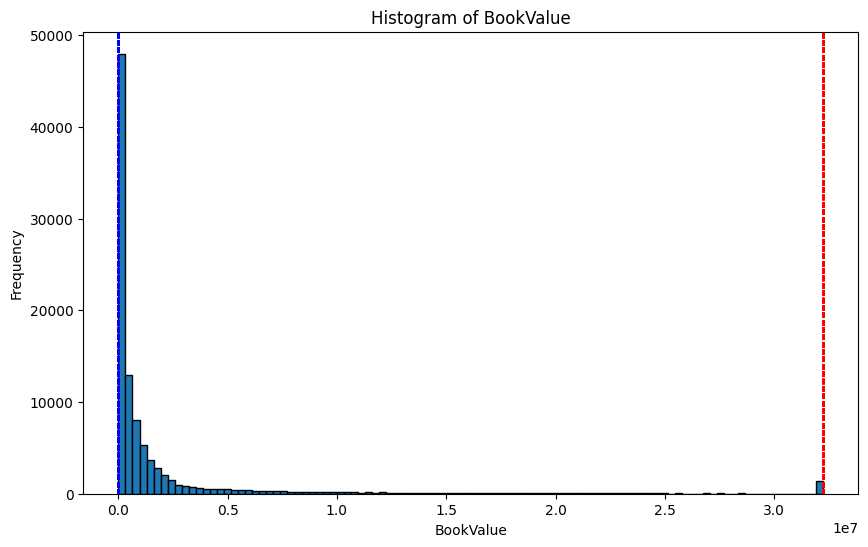

In [ ]:
# Calculate the mean, standard deviation, and the number of instances of the 'BookValue' column
mean_book_value = MySector['BookValue'].mean()
std_dev_book_value = MySector['BookValue'].std()
count_book_value = MySector['BookValue'].count()

# Print the calculated values
print(f"Mean BookValue: {mean_book_value}")
print(f"Standard Deviation of BookValue: {std_dev_book_value}")
print(f"Number of Instances: {count_book_value}")

# Create a histogram for the 'BookValue' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['BookValue'], bins=100, edgecolor='black')
plt.title('Histogram of BookValue')
plt.xlabel('BookValue')
plt.ylabel('Frequency')

# Identify the 80 most extreme positive and 3 most extreme negative values
extreme_high = MySector['BookValue'].nlargest(80)
extreme_low = MySector['BookValue'].nsmallest(80)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()


In [ ]:
# Ajustez les valeurs de 'ProfitMargin'
MySector['MarketVales'] = MySector['MarketVales'].clip(lower=0, upper=150000000)

# Calculez le nombre de valeurs dans 'ProfitMargin' entre -1 et 1
count = ((MySector['MarketVales'] >= 0) & (MySector['MarketVales'] <= 150000000)).sum()

# Affichez le résultat
print(f"Le nombre de valeurs dans 'MarketVales' entre -1 et 1 est : {count}")

#NaN instead of 0:
MySector['MarketVales'] = MySector['MarketVales'].replace(0, np.nan)

Le nombre de valeurs dans 'MarketVales' entre -1 et 1 est : 95919


Mean MarketVales: 7036793.192483108
Standard Deviation of MarketVales: 17824950.087675367
Number of Instances: 95919


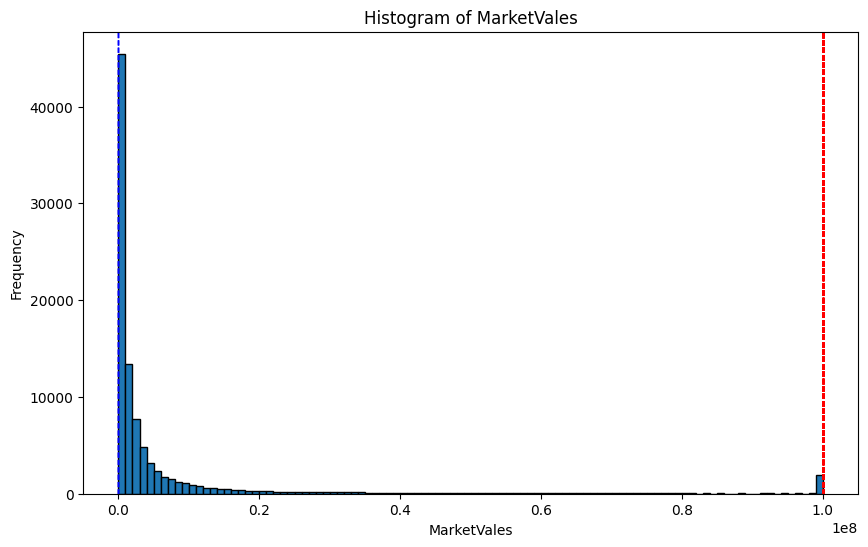

In [ ]:
# Calculate the mean, standard deviation, and the number of instances of the 'MarketValue' column
mean_market_value = MySector['MarketVales'].mean()
std_dev_market_value = MySector['MarketVales'].std()
count_market_value = MySector['MarketVales'].count()

# Print the calculated values
print(f"Mean MarketVales: {mean_market_value}")
print(f"Standard Deviation of MarketVales: {std_dev_market_value}")
print(f"Number of Instances: {count_market_value}")

# Create a histogram for the 'MarketValue' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['MarketVales'], bins=100, edgecolor='black')
plt.title('Histogram of MarketVales')
plt.xlabel('MarketVales')
plt.ylabel('Frequency')

# Identify the 80 most extreme positive and 3 most extreme negative values
extreme_high = MySector['MarketVales'].nlargest(80)
extreme_low = MySector['MarketVales'].nsmallest(3)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()

#ProfitMargin

In [ ]:
# Trouver la plus grande et la plus petite valeur non infinie de 'GrossMargin'
max_non_infinite = MySector.loc[np.isfinite(MySector['ProfitMargin']), 'ProfitMargin'].max()
min_non_infinite = MySector.loc[np.isfinite(MySector['ProfitMargin']), 'ProfitMargin'].min()

# Remplacer les valeurs infinies positives par la plus grande valeur non infinie
MySector['ProfitMargin'].replace([np.inf], max_non_infinite, inplace=True)

# Remplacer les valeurs infinies négatives par la plus petite valeur non infinie
MySector['ProfitMargin'].replace([-np.inf], min_non_infinite, inplace=True)

<ipython-input-218-2d3e08de0a78>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  MySector['ProfitMargin'].replace([np.inf], max_non_infinite, inplace=True)
<ipython-input-218-2d3e08de0a78>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
# Trouver la plus grande valeur de la colonne 'GrossMargin'
max_gross_margin = MySector['ProfitMargin'].max()

# Afficher la plus grande valeur
print("La plus grande valeur de ProfitMargin est :", max_gross_margin)

# Trouver la plus grande valeur de la colonne 'GrossMargin'
min_gross_margin = MySector['ProfitMargin'].min()

# Afficher la plus grande valeur
print("La plus petite valeur de ProfitMargin est :", min_gross_margin)

La plus grande valeur de ProfitMargin est : 403753.0266343826
La plus petite valeur de ProfitMargin est : -346.2084418968213


Mean ProfitMargin: 3.76699707566666
Standard Deviation of ProfitMargin: 1289.1566388348801
Number of Instances: 98096


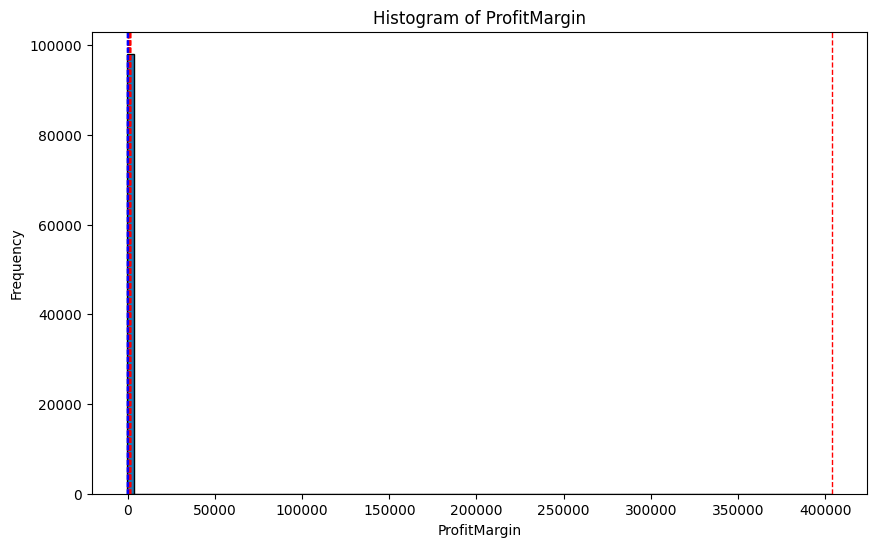

In [ ]:
# Calculate the mean, standard deviation, and the number of instances of the 'ProfitMargin' column
mean_profit_margin = MySector['ProfitMargin'].mean()
std_dev_profit_margin = MySector['ProfitMargin'].std()
count_profit_margin = MySector['ProfitMargin'].count()

# Print the calculated values
print(f"Mean ProfitMargin: {mean_profit_margin}")
print(f"Standard Deviation of ProfitMargin: {std_dev_profit_margin}")
print(f"Number of Instances: {count_profit_margin}")

# Create a histogram for the 'ProfitMargin' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['ProfitMargin'], bins=100, edgecolor='black')
plt.title('Histogram of ProfitMargin')
plt.xlabel('ProfitMargin')
plt.ylabel('Frequency')

# Identify the three most extreme positive and negative values
extreme_high = MySector['ProfitMargin'].nlargest(21)
extreme_low = MySector['ProfitMargin'].nsmallest(3)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()


In [ ]:
# Trier les valeurs de GrossMargin par ordre décroissant
sorted_gross_margin_desc = MySector['ProfitMargin'].sort_values(ascending=False)

# Trouver la 8ème plus grande valeur
value_8th = sorted_gross_margin_desc.iloc[22]

# Remplacer les 7 plus grandes valeurs par la valeur de la 8ème plus grande
MySector.loc[sorted_gross_margin_desc.index[:21], 'ProfitMargin'] = value_8th

# Calculez le nombre de valeurs dans 'ProfitMargin' entre -1 et 1
count = ((MySector['ProfitMargin'] > -1) & (MySector['ProfitMargin'] < 1)).sum()

# Affichez le résultat
print(f"Le nombre de valeurs dans 'ProfitMargin' entre -1 et 1 est : {count}")

Le nombre de valeurs dans 'ProfitMargin' entre -1 et 1 est : 73635


In [ ]:
# Ajustez les valeurs de 'ProfitMargin'
MySector['ProfitMargin'] = MySector['ProfitMargin'].clip(lower=-1, upper=1)

# Calculez le nombre de valeurs dans 'ProfitMargin' entre -1 et 1
count = ((MySector['ProfitMargin'] >= -1) & (MySector['ProfitMargin'] <= 1)).sum()

# Affichez le résultat
print(f"Le nombre de valeurs dans 'ProfitMargin' entre -1 et 1 est : {count}")

Le nombre de valeurs dans 'ProfitMargin' entre -1 et 1 est : 98096


Mean ProfitMargin: -0.04774226467452368
Standard Deviation of ProfitMargin: 0.6063278843086568
Number of Instances: 98096


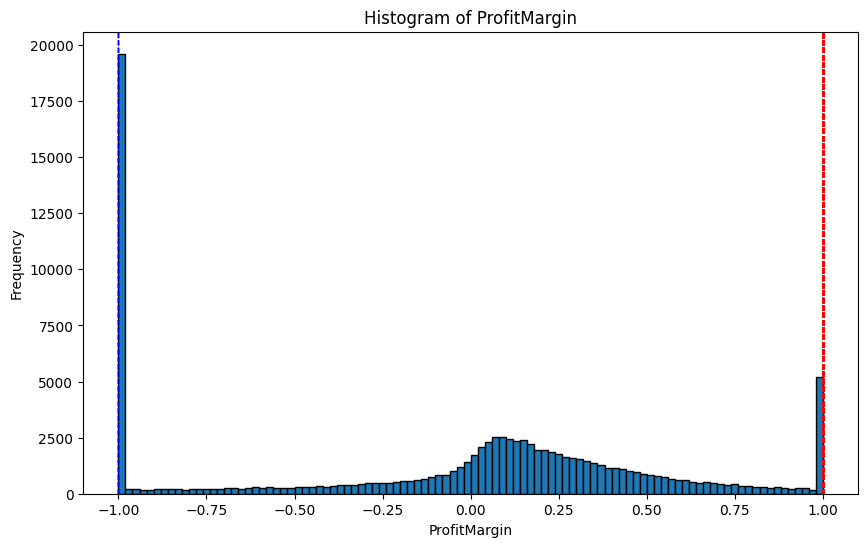

In [ ]:
# Calculate the mean, standard deviation, and the number of instances of the 'ProfitMargin' column
mean_profit_margin = MySector['ProfitMargin'].mean()
std_dev_profit_margin = MySector['ProfitMargin'].std()
count_profit_margin = MySector['ProfitMargin'].count()

# Print the calculated values
print(f"Mean ProfitMargin: {mean_profit_margin}")
print(f"Standard Deviation of ProfitMargin: {std_dev_profit_margin}")
print(f"Number of Instances: {count_profit_margin}")

# Create a histogram for the 'ProfitMargin' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['ProfitMargin'], bins=100, edgecolor='black')
plt.title('Histogram of ProfitMargin')
plt.xlabel('ProfitMargin')
plt.ylabel('Frequency')

# Identify the three most extreme positive and negative values
extreme_high = MySector['ProfitMargin'].nlargest(80)
extreme_low = MySector['ProfitMargin'].nsmallest(3)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()

#Current Ratio

In [ ]:
# Trouver la plus grande et la plus petite valeur non infinie de 'GrossMargin'
max_non_infinite = MySector.loc[np.isfinite(MySector['CurrentRatio']), 'CurrentRatio'].max()
min_non_infinite = MySector.loc[np.isfinite(MySector['CurrentRatio']), 'CurrentRatio'].min()

# Remplacer les valeurs infinies positives par la plus grande valeur non infinie
MySector['CurrentRatio'].replace([np.inf], max_non_infinite, inplace=True)

# Remplacer les valeurs infinies négatives par la plus petite valeur non infinie
MySector['CurrentRatio'].replace([-np.inf], min_non_infinite, inplace=True)

# Trouver la plus grande valeur de la colonne 'GrossMargin'
max_gross_margin = MySector['CurrentRatio'].max()

# Afficher la plus grande valeur
print("La plus grande valeur de CurrentRatio est :", max_gross_margin)

# Trouver la plus grande valeur de la colonne 'GrossMargin'
min_gross_margin = MySector['CurrentRatio'].min()

# Afficher la plus grande valeur
print("La plus petite valeur de CurrentRatio est :", min_gross_margin)

La plus grande valeur de CurrentRatio est : 415.0
La plus petite valeur de CurrentRatio est : 0.0


<ipython-input-224-fe0bd1633398>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  MySector['CurrentRatio'].replace([np.inf], max_non_infinite, inplace=True)
<ipython-input-224-fe0bd1633398>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

Mean CurrentRatio: 4.412364162677506
Standard Deviation of CurrentRatio: 6.722457756556775
Number of Instances: 98096


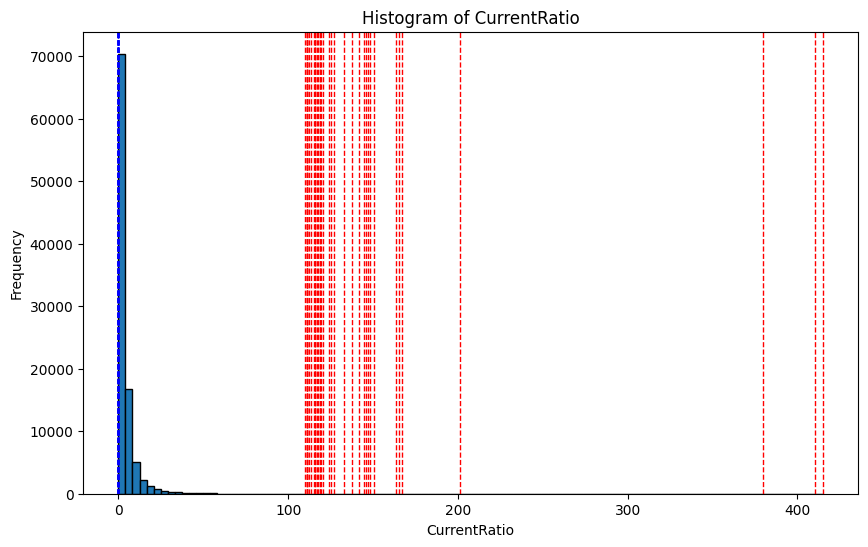

In [ ]:
# Calculate the mean, standard deviation, and the number of instances of the 'GrossMargin' column
mean_gross_margin = MySector['CurrentRatio'].mean()
std_dev_gross_margin = MySector['CurrentRatio'].std()
count_gross_margin = MySector['CurrentRatio'].count()

# Print the calculated values
print(f"Mean CurrentRatio: {mean_gross_margin}")
print(f"Standard Deviation of CurrentRatio: {std_dev_gross_margin}")
print(f"Number of Instances: {count_gross_margin}")

# Create a histogram for the 'GrossMargin' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['CurrentRatio'], bins=100, edgecolor='black')
plt.title('Histogram of CurrentRatio')
plt.xlabel('CurrentRatio')
plt.ylabel('Frequency')

# Identify the three most extreme positive and negative values
extreme_high = MySector['CurrentRatio'].nlargest(35)
extreme_low = MySector['CurrentRatio'].nsmallest(15)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()

In [ ]:
max_current_ratio_index = MySector['CurrentRatio'].idxmax()

# Afficher tous les attributs de l'instance avec le CurrentRatio le plus grand
max_current_ratio_instance = MySector.loc[max_current_ratio_index]
print(max_current_ratio_instance)

fiscalmonth                                  9.0
revenue                                      0.0
cogs                                         0.0
sgae                                      1008.0
otherincome                               1154.0
extraordinaryitems                           0.0
finexp                                       0.0
incometax                                    0.0
totalassets                               9131.0
currentassets                             9130.0
inventory                                    0.0
totalliabilities                            22.0
currentliabilities                          22.0
longdebt                                     0.0
adjprice                                     NaN
originalprice                                NaN
sharesoutstanding                      16266.618
year                                        2005
fixedassets                                  0.0
yearf                                     2005.0
cto                 

In [ ]:
# Trier les valeurs de GrossMargin par ordre décroissant
sorted_gross_margin_desc = MySector['CurrentRatio'].sort_values(ascending=False)

# Trouver la 8ème plus grande valeur
value_8th = sorted_gross_margin_desc.iloc[35]

# Remplacer les 7 plus grandes valeurs par la valeur de la 8ème plus grande
MySector.loc[sorted_gross_margin_desc.index[:35], 'CurrentRatio'] = value_8th


In [ ]:
MySector['CurrentRatio'] = MySector['CurrentRatio'].clip(upper=12)

Mean CurrentRatio: 3.739807063037907
Standard Deviation of CurrentRatio: 3.084961491644988
Number of Instances: 98096


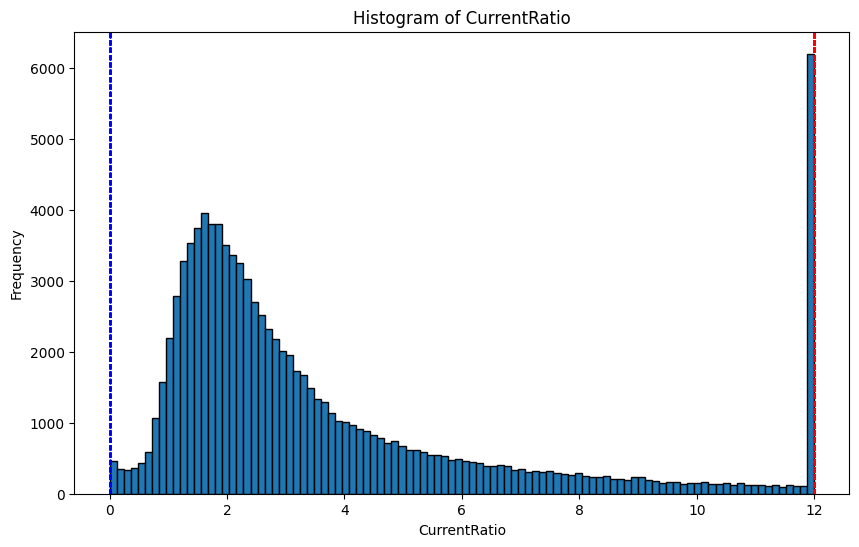

In [ ]:
# Calculate the mean, standard deviation, and the number of instances of the 'GrossMargin' column
mean_gross_margin = MySector['CurrentRatio'].mean()
std_dev_gross_margin = MySector['CurrentRatio'].std()
count_gross_margin = MySector['CurrentRatio'].count()

# Print the calculated values
print(f"Mean CurrentRatio: {mean_gross_margin}")
print(f"Standard Deviation of CurrentRatio: {std_dev_gross_margin}")
print(f"Number of Instances: {count_gross_margin}")

# Create a histogram for the 'GrossMargin' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['CurrentRatio'], bins=100, edgecolor='black')
plt.title('Histogram of CurrentRatio')
plt.xlabel('CurrentRatio')
plt.ylabel('Frequency')

# Identify the three most extreme positive and negative values
extreme_high = MySector['CurrentRatio'].nlargest(100)
extreme_low = MySector['CurrentRatio'].nsmallest(15)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()

#EPS_to_Price

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Assuming MySector is already loaded and prepared
# Define the ratios to be used as features
ratios = ['GrossMargin', 'GrossProfit', 'EBIT', 'ROA',
          'DebtToEquity', 'CurrentRatio', 'ProfitMargin', 'BookValue',
          'MarketVales', 'NetIncome', 'BookToMarket', 'EPS_to_Price']

# Define the target variable
X = MySector[ratios].copy()  # Making a copy to avoid SettingWithCopyWarning
y = MySector['cc_return_q_future'].copy()

# Step 1: Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows with NaN values in X or y
X.dropna(inplace=True)
y = y[X.index]  # Keeping only the corresponding y values

# Add a constant for the intercept
X = sm.add_constant(X)

# Step 3: Fit the OLS model (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Obtain influence to access the Hat Matrix and leverage points
influence = model.get_influence()

# Retrieve the diagonal of the Hat Matrix (leverage points)
hat_matrix_diag = influence.hat_matrix_diag

# Detect leverage points (consider a leverage point if it exceeds 2 * p / n)
n = X.shape[0]  # Number of observations
p = X.shape[1]  # Number of predictors + 1 (constant)

threshold = 2 * (p / n)  # Threshold for identifying leverage points
leverage_points = np.where(hat_matrix_diag > threshold)[0]

# Calculate the critical threshold
leverage_mean = np.mean(hat_matrix_diag)
leverage_std = np.std(hat_matrix_diag)

# A leverage point is considered critical if it exceeds 3 times the standard deviation from the mean
critical_threshold = leverage_mean + 3 * leverage_std

# Filter critical leverage points
critical_leverage_df = pd.DataFrame({
    'Index': leverage_points,
    'Leverage Value': hat_matrix_diag[leverage_points]
})
critical_leverage_df = critical_leverage_df[critical_leverage_df['Leverage Value'] > critical_threshold]

MySector = MySector.reset_index(drop=True)
# Filter observations with critical leverage points
critical_obs = MySector.loc[critical_leverage_df['Index']]

# Examine the 'EPS_to_Price' values for these observations
critical_eps_to_price_values = critical_obs['EPS_to_Price']

# Display the critical 'EPS_to_Price' values
print("Critical 'EPS_to_Price' Values:")
print(critical_eps_to_price_values.describe())

# Determine a critical threshold based on these critical values
eps_to_price_threshold = critical_eps_to_price_values.max()  # Choosing the maximum value as the threshold

print(f"Critical Threshold for 'EPS_to_Price': {eps_to_price_threshold}")


Critical 'EPS_to_Price' Values:
count    17.000000
mean      0.035525
std       0.045849
min      -0.076715
25%       0.018018
50%       0.047632
75%       0.064578
max       0.095613
Name: EPS_to_Price, dtype: float64
Critical Threshold for 'EPS_to_Price': 0.09561260325582735


In [ ]:
MySector['EPS_to_Price'] = MySector['EPS_to_Price'].clip(lower=-0.076715,upper=0.095613)

Mean EPS_to_Price: 0.007015443922233126
Standard Deviation of EPS_to_Price: 0.051078683754569316
Number of Instances: 91911


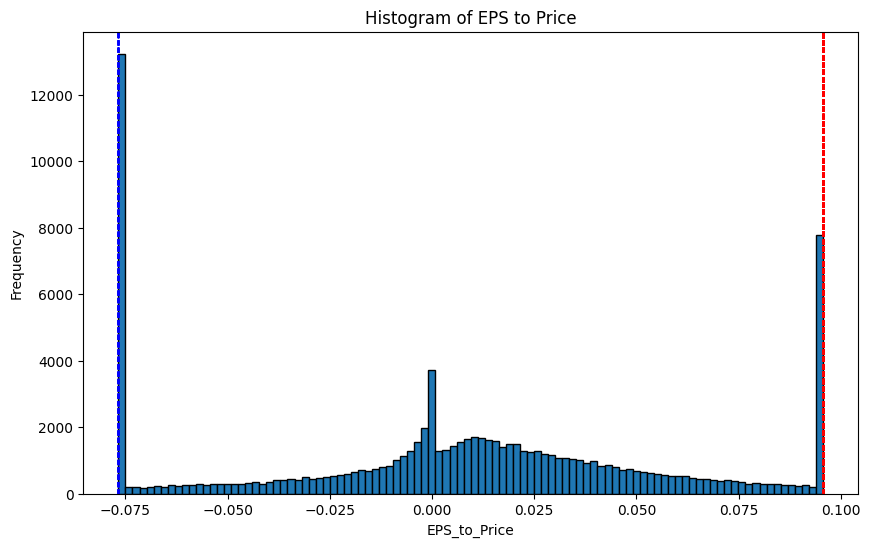

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean, standard deviation, and the number of instances of the 'EPS_to_Price' column
mean_eps_to_price = MySector['EPS_to_Price'].mean()
std_dev_eps_to_price = MySector['EPS_to_Price'].std()
count_eps_to_price = MySector['EPS_to_Price'].count()

# Print the calculated values
print(f"Mean EPS_to_Price: {mean_eps_to_price}")
print(f"Standard Deviation of EPS_to_Price: {std_dev_eps_to_price}")
print(f"Number of Instances: {count_eps_to_price}")

# Create a histogram for the 'EPS_to_Price' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['EPS_to_Price'], bins=100, edgecolor='black')
plt.title('Histogram of EPS to Price')
plt.xlabel('EPS_to_Price')
plt.ylabel('Frequency')

# Identify the three most extreme positive and negative values
extreme_high = MySector['EPS_to_Price'].nlargest(100)
extreme_low = MySector['EPS_to_Price'].nsmallest(15)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()


#Dept to equity:

In [ ]:
ratios = ['GrossMargin', 'GrossProfit', 'EBIT', 'ROA',
          'DebtToEquity', 'CurrentRatio', 'ProfitMargin', 'BookValue',
          'MarketVales', 'NetIncome', 'BookToMarket', 'EPS_to_Price']

# Define the target variable
X = MySector[ratios].copy()  # Making a copy to avoid SettingWithCopyWarning
y = MySector['cc_return_q_future'].copy()

# Step 1: Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows with NaN values in X or y
X.dropna(inplace=True)
y = y[X.index]  # Keeping only the corresponding y values

# Add a constant for the intercept
X = sm.add_constant(X)

# Step 3: Fit the OLS model (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Obtain influence to access the Hat Matrix and leverage points
influence = model.get_influence()

# Retrieve the diagonal of the Hat Matrix (leverage points)
hat_matrix_diag = influence.hat_matrix_diag

# Detect leverage points (consider a leverage point if it exceeds 2 * p / n)
n = X.shape[0]  # Number of observations
p = X.shape[1]  # Number of predictors + 1 (constant)

threshold = 2 * (p / n)  # Threshold for identifying leverage points
leverage_points = np.where(hat_matrix_diag > threshold)[0]

# Calculate the critical threshold
leverage_mean = np.mean(hat_matrix_diag)
leverage_std = np.std(hat_matrix_diag)

# A leverage point is considered critical if it exceeds 3 times the standard deviation from the mean
critical_threshold = leverage_mean + 3 * leverage_std

# Filter critical leverage points
critical_leverage_df = pd.DataFrame({
    'Index': leverage_points,
    'Leverage Value': hat_matrix_diag[leverage_points]
})
critical_leverage_df = critical_leverage_df[critical_leverage_df['Leverage Value'] > critical_threshold]

MySector = MySector.reset_index(drop=True)
# Filter observations with critical leverage points
critical_obs = MySector.loc[critical_leverage_df['Index']]

# Examine the 'DebtToEquity' values for these observations
critical_debt_to_equity_values = critical_obs['DebtToEquity']

# Display the critical 'DebtToEquity' values
print("Critical 'DebtToEquity' Values:")
print(critical_debt_to_equity_values.describe())

# Determine a critical threshold based on these critical values
debt_to_equity_threshold = critical_debt_to_equity_values.max()  # Choosing the maximum value as the threshold

print(f"Critical Threshold for 'DebtToEquity': {debt_to_equity_threshold}")

Critical 'DebtToEquity' Values:
count     23.000000
mean       7.487291
std       23.568837
min        0.096298
25%        0.581055
50%        1.554628
75%        1.823264
max      112.997409
Name: DebtToEquity, dtype: float64
Critical Threshold for 'DebtToEquity': 112.9974090051818


In [ ]:
MySector['DebtToEquity'] = MySector['DebtToEquity'].clip(lower=0.096298,upper=122.997409)

Mean DebtToEquity: 2.0081822529461757
Standard Deviation of DebtToEquity: 7.291860950504499
Number of Instances: 98274


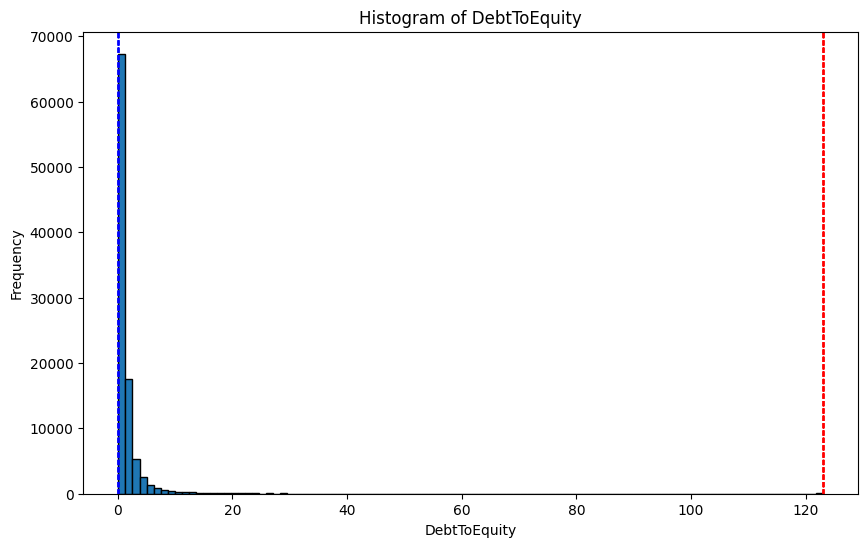

In [ ]:

# Calculate the mean, standard deviation, and the number of instances of the 'DebtToEquity' column
mean_debt_to_equity = MySector['DebtToEquity'].mean()
std_dev_debt_to_equity = MySector['DebtToEquity'].std()
count_debt_to_equity = MySector['DebtToEquity'].count()

# Print the calculated values
print(f"Mean DebtToEquity: {mean_debt_to_equity}")
print(f"Standard Deviation of DebtToEquity: {std_dev_debt_to_equity}")
print(f"Number of Instances: {count_debt_to_equity}")

# Create a histogram for the 'DebtToEquity' column with adjusted bins
plt.figure(figsize=(10, 6))
plt.hist(MySector['DebtToEquity'], bins=100, edgecolor='black')
plt.title('Histogram of DebtToEquity')
plt.xlabel('DebtToEquity')
plt.ylabel('Frequency')

# Identify the three most extreme positive and negative values
extreme_high = MySector['DebtToEquity'].nlargest(10)
extreme_low = MySector['DebtToEquity'].nsmallest(10)

# Plot vertical lines for the extreme values
for value in extreme_high:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=1)

for value in extreme_low:
    plt.axvline(x=value, color='blue', linestyle='--', linewidth=1)

# Display the histogram
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove NaN values and handle infinite values by replacing them with NaN and then dropping
# For the moment we do that

data = MySector.replace([np.inf, -np.inf], np.nan).dropna()

# Define the ratios to be used as features
ratios = ['BookValue', 'MarketVales', 'ROA', 'CurrentRatio', 'DebtToEquity', 'GrossMargin', 'EPS_to_Price','BookToMarket','NetIncome','WeightedGrossProfit','EBIT','ProfitMargin']
X = data[ratios]
y = data['cc_return_q_future']

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Set up and fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Summarize and print the model results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     cc_return_q_future   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     69.24
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          4.64e-169
Time:                        04:12:38   Log-Likelihood:                -81144.
No. Observations:               67486   AIC:                         1.623e+05
Df Residuals:                   67473   BIC:                         1.624e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0442    

#Cook distance:

The cook distance will be very usefull: it will hepl us to measure how much change the coefficients, of our model, when we are not taking in consideration one point. It will hepl us to find outliers. Usually we look for points with a cook distance bigger than 1.0.

Points influents (Cook's Distance > 5.927155261832084e-05):
[  164   177   188 ... 67409 67419 67430]


<ipython-input-237-a13ffd29920b>:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)


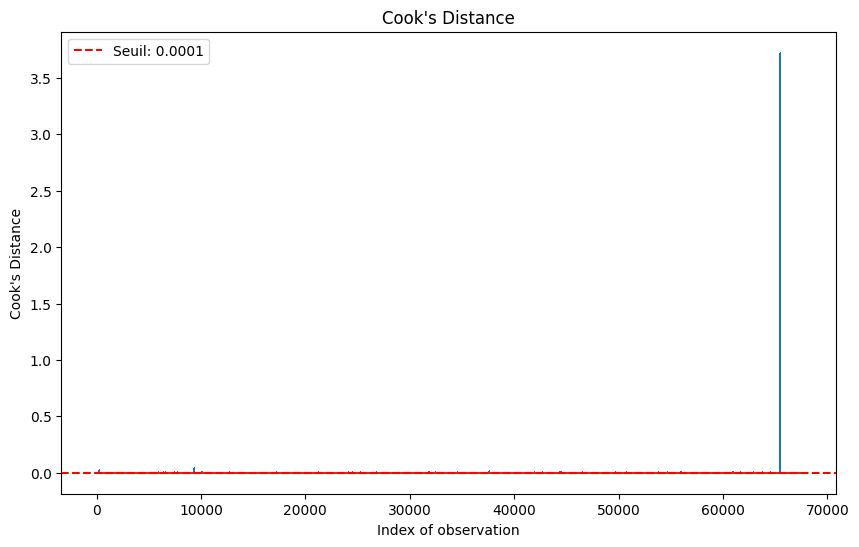


Cook's Distance point ordered bigger to smaller:
      Index  Cook's Distance
2111  65473         3.723243
380    9330         0.041969
10      246         0.023990
1210  37555         0.017815
7       226         0.009298
...     ...              ...
112    2378         0.000059
1340  43040         0.000059
1586  49824         0.000059
2063  64622         0.000059
1331  42882         0.000059

[2149 rows x 2 columns]


In [ ]:


# Calculer les Cook's Distances
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]  # Cook's distance

# Afficher les indices des points les plus influents (par exemple, ceux dont la Cook's Distance est supérieure à 4/n)
threshold = 4 / len(cooks_d)
influential_points = np.where(cooks_d > threshold)[0]  # Points avec une Cook's Distance élevée

print(f"Points influents (Cook's Distance > {threshold}):")
print(influential_points)

# Visualisation de la Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Seuil: {threshold:.4f}')
plt.title("Cook's Distance")
plt.xlabel("Index of observation")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

# Afficher les points influents avec leurs Cook's Distances
influential_points_info = pd.DataFrame({
    'Index': influential_points,
    'Cook\'s Distance': cooks_d[influential_points]
}).sort_values(by="Cook's Distance", ascending=False)

print("\nCook's Distance point ordered bigger to smaller:")
print(influential_points_info)


It is strange to have an outliers that disproportionned. Let's analize it:

In [ ]:
cooks_distance_point = MySector.loc[65473]
print(cooks_distance_point)

fiscalmonth                                       9.0
revenue                                      290368.0
cogs                                         233272.0
sgae                                          30323.0
otherincome                                      -8.0
extraordinaryitems                                0.0
finexp                                         4937.0
incometax                                      8731.0
totalassets                                  223768.0
currentassets                                 94536.0
inventory                                     53261.0
totalliabilities                             126587.0
currentliabilities                            68712.0
longdebt                                      47260.0
adjprice                                    13.910055
originalprice                               47.099998
sharesoutstanding                            9442.476
year                                             2001
fixedassets                 

The outlier is so big that we can not vizualize the graph with our cook distance.I will drop the outlier and re-print it:

Points influents (Cook's Distance > 5.927155261832084e-05):
[  164   177   188 ... 67409 67419 67430]


<ipython-input-239-73ea078fb3f4>:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)


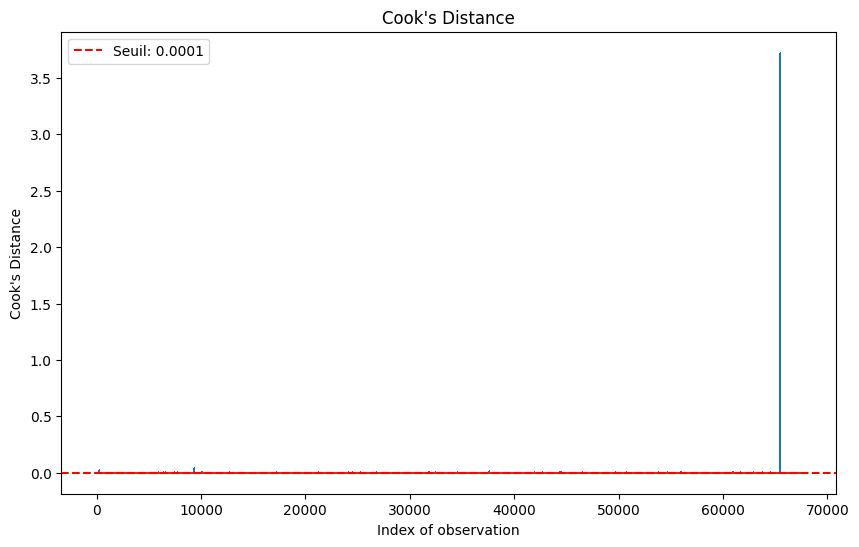


Cook's Distance point ordered bigger to smaller:
      Index  Cook's Distance
2111  65473         3.723243
380    9330         0.041969
10      246         0.023990
1210  37555         0.017815
7       226         0.009298
...     ...              ...
112    2378         0.000059
1340  43040         0.000059
1586  49824         0.000059
2063  64622         0.000059
1331  42882         0.000059

[2149 rows x 2 columns]


In [ ]:
# Step 1: Remove the most influential point (index 65473)
MySector_filtered = MySector.drop(index=65473)

# Calculer les Cook's Distances
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]  # Cook's distance

# Afficher les indices des points les plus influents (par exemple, ceux dont la Cook's Distance est supérieure à 4/n)
threshold = 4 / len(cooks_d)
influential_points = np.where(cooks_d > threshold)[0]  # Points avec une Cook's Distance élevée

print(f"Points influents (Cook's Distance > {threshold}):")
print(influential_points)

# Visualisation de la Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Seuil: {threshold:.4f}')
plt.title("Cook's Distance")
plt.xlabel("Index of observation")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

# Afficher les points influents avec leurs Cook's Distances
influential_points_info = pd.DataFrame({
    'Index': influential_points,
    'Cook\'s Distance': cooks_d[influential_points]
}).sort_values(by="Cook's Distance", ascending=False)

print("\nCook's Distance point ordered bigger to smaller:")
print(influential_points_info)


Now it looks like a normal distribution.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Remplacer les valeurs infinies et NaN par des valeurs valides et supprimer les lignes avec NaN
data = MySector.replace([np.inf, -np.inf], np.nan).dropna()

# Définir les ratios à utiliser comme features
ratios = ['BookValue', 'MarketVales', 'ROA', 'CurrentRatio', 'DebtToEquity', 'GrossMargin', 'EPS_to_Price', 'BookToMarket', 'NetIncome', 'WeightedGrossProfit', 'EBIT', 'ProfitMargin']
X = data[ratios]
y = data['cc_return_q_future']

# Ajouter une constante au modèle (terme d'interception)
X = sm.add_constant(X)

# Créer et ajuster le modèle de régression OLS
model = sm.OLS(y, X).fit()

# Calculer les Cook's Distances
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]  # Cook's distance

# Trouver les 300 points avec la Cook's Distance la plus élevée
top_300_influential_points = np.argsort(cooks_d)[-3374:]  # Indices des 300 points les plus influents

# Convertir en indices d'origine de "data"
top_300_influential_indices = data.index[top_300_influential_points]

# Créer le dataset MySectorCooked en excluant ces points
MySectorCooked = data.drop(index=top_300_influential_indices)

# Afficher les 5 premières lignes de MySectorCooked pour vérifier
print(MySectorCooked.head())



   fiscalmonth    revenue      cogs      sgae  otherincome  \
4          3.0  1658000.0  907000.0  656000.0      29000.0   
5          3.0  1336000.0  657000.0  634000.0      48000.0   
6          3.0  1280000.0  589000.0  596000.0       1000.0   
7          3.0  1393000.0  637000.0  622000.0       4000.0   
8          3.0  1166000.0  577000.0  565000.0      12000.0   

   extraordinaryitems   finexp  incometax  totalassets  currentassets  ...  \
4                 0.0      0.0    21000.0    7150000.0      4649000.0  ...   
5           2738000.0      0.0    15000.0    8026000.0      4626000.0  ...   
6                 0.0 -27000.0   -27000.0    7193000.0      3749000.0  ...   
7                 0.0  -9000.0    27000.0    7459000.0      5070000.0  ...   
8                 0.0   9000.0   -37000.0    7162000.0      3008000.0  ...   

   CurrentRatio  ProfitMargin  BookValue   MarketVales   Earnings       EPS  \
4      2.625071      0.053642  3768000.0  1.090383e+07    45000.0  0.091619   


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove NaN values and handle infinite values by replacing them with NaN and then dropping
# For the dataset 'MySectorCooked' where 300 influential points have been excluded

data = MySectorCooked.replace([np.inf, -np.inf], np.nan).dropna()

# Define the ratios to be used as features
ratios = ['BookValue', 'MarketVales', 'ROA', 'CurrentRatio', 'DebtToEquity', 'GrossMargin', 'EPS_to_Price','BookToMarket','NetIncome','WeightedGrossProfit','EBIT','ProfitMargin']
X = data[ratios]
y = data['cc_return_q_future']

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Set up and fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Summarize and print the model results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     cc_return_q_future   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     98.73
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          6.80e-244
Time:                        04:12:44   Log-Likelihood:                -48149.
No. Observations:               64112   AIC:                         9.632e+04
Df Residuals:                   64099   BIC:                         9.644e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0224    

What did we do to go from a 0.006 R-squared value to a 0.012 (1.2%) and funally to a value of 0.018 (1.8%) ?

Very simple, as the outliers wigh to much and bayes the coefficients with their extrem values, I took the 3'374 points with the biggest, and I created the dataset 'MySectorCooked', that is exactly the same as the 'MySector' but without the 3'374 points more influent. I did not took that number randomly, here are the S-quared related to their squared value:


0.   (number of element that I dropped) --> new R-squared valuu
1.   600 --> 0.016
2.   1500 --> 0.016
3.   3000 --> 0.016
4.   5000 --> 0.016
5.   8'000 --> 0.020
6.   12'000 --> 0.020
7.   15'000 --> 0.029
8.   20'000 --< 0.039
9.   23'000 --> 0.045
10.  25'000 --> 0.051
11.  27'500 --> 0.057
12.  30'000 --> 0.067
13.  32'500 --> 0.071
14.  35'000 --> 0.089
15.  37'750 --> 0.107
16.  40'000 --> 0.122
17.  65'000 --> 0.94  --> 94% !!! but...


What is the bad point of deleting the X bigger more infuent rows from our dataset?



*   Loss of important information: Outliers can represent rare but significant phenomena, and removing them might erase valuable insights.
*   Reduced dataset size: Deleting too many points decreases the statistical power, potentially leading to underfitting or reduced model accuracy.
*   Bias in the model: Over-simplifying the dataset by removing many outliers can bias the model, making it less effective in predicting extreme or rare cases.


Yes at the end our model was explaining 94% of the variance of our target variable, the future cc return, we could be rich with that...NO.

The problem is that we was keeping removing the more influent data, and keeping the more easier to modelize. The data at the end was not even reprenting the reality, we were playing with 2400 instances, and we removed 65'000. To have a realistic model, I think we should not drop more than 5% (and that is already a lot)of the data, assuming that otherwise, those outliers are just very rare.

For our finalmodel, I dropped the 5% of our data that weigh the most, it  is equivalent to 3374 instances, and the model is now running with 64'112 observations.





# Global conclusion:

After removing the 3'374 largest outliers and doing some additional data management using the hat matrix (for leverage point), the model's performance, as measured by R-squared, went from 0.012 to 0.018. This suggests that, while the original model explained only around 1.2% of the variance in the target variable, the cleaned model now explains 1.8% of the variance. It still a non robust model at all, but in the context of the finance, specially when trying to predict future returns it is normal to not reach a 'performant' model with a high R-Squared Value.

Key metrics after data cleaning (just after the first feedback):

  R-squared: Dropped from 0.018 to 0.012, indicating a reduction in the model's explanatory power.


  F-statistic: Lowered, implying less overall significance of the predictors after removing influential points.

Removing outliers and leverage points led to a significant decrease in the model's ability to explain the variance of the target variable (cc_return_q_future). Although this cleaning process improved the model's robustness against influential points, it also reduced the overall explanatory power, indicating that the outliers may have contained important information.

#Project 2 starting here

#1.1.1 Calculation of Variables

In [ ]:
#this is the dataset we'll use for this part.
print(MySectorCooked.info())

<class 'pandas.core.frame.DataFrame'>
Index: 64112 entries, 4 to 227172
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fiscalmonth          64112 non-null  float64
 1   revenue              64112 non-null  float64
 2   cogs                 64112 non-null  float64
 3   sgae                 64112 non-null  float64
 4   otherincome          64112 non-null  float64
 5   extraordinaryitems   64112 non-null  float64
 6   finexp               64112 non-null  float64
 7   incometax            64112 non-null  float64
 8   totalassets          64112 non-null  float64
 9   currentassets        64112 non-null  float64
 10  inventory            64112 non-null  float64
 11  totalliabilities     64112 non-null  float64
 12  currentliabilities   64112 non-null  float64
 13  longdebt             64112 non-null  float64
 14  adjprice             64112 non-null  float64
 15  originalprice        64112 non-null  flo

Add column for size of the company

In [ ]:
# Define a function to categorize firms based on market value for each fiscal year
def categorize_firms(group):
    # Use quantiles to divide into 3 groups based on market value (MarketVales)
    group['FirmSize'] = pd.qcut(group['MarketVales'], 3, labels=['Small', 'Medium', 'Big'])
    return group

# Filter the dataset to keep only records where fiscalmonth is 12 (annual data)
MySectorCooked = MySectorCooked[MySectorCooked['fiscalmonth'] == 12]

# Apply the categorization function to each fiscal year group and update the dataset
MySectorCooked = MySectorCooked.groupby('yearf').apply(categorize_firms)

# Display the updated dataset with the new FirmSize column
print(MySectorCooked[['yearf', 'Empresa', 'MarketVales', 'FirmSize']].head())



                yearf                           Empresa   MarketVales FirmSize
yearf                                                                         
1999.0 9929    1999.0                  Alkermes Inc-Old  2.431479e+06   Medium
       28473   1999.0                    Black Box Corp  1.355630e+06   Medium
       80693   1999.0           Forest Laboratories Inc  7.139470e+06      Big
       98740   1999.0  Integrated Device Technology Inc  4.181793e+06      Big
       128352  1999.0          Microchip Technology Inc  5.036178e+06      Big


<ipython-input-243-783c3db01482>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  MySectorCooked = MySectorCooked.groupby('yearf').apply(categorize_firms)


In [ ]:
print(MySectorCooked['FirmSize'].head(10))

yearf         
1999.0  9929      Medium
        28473     Medium
        80693        Big
        98740        Big
        128352       Big
        148914     Small
        156551     Small
        161862    Medium
        172059    Medium
        198813     Small
Name: FirmSize, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Big']


dummi methods:

*   1;0 for small
*   0;1 for medium
*   0;0 for bign ones






In [ ]:

# Assuming the 'FirmSize' column is already in the dataset with values 'Small', 'Medium', 'Big'

# Dummy encoding: choose 'Big' as the reference category and create dummy variables for 'Small' and 'Medium'
MySectorCooked['FirmSize_Small'] = (MySectorCooked['FirmSize'] == 'Small').astype(int)
MySectorCooked['FirmSize_Medium'] = (MySectorCooked['FirmSize'] == 'Medium').astype(int)

# Now, we have binary dummy variables for 'Small' and 'Medium'. 'Big' is the reference and will be implied when both are 0.
print(MySectorCooked[['FirmSize', 'FirmSize_Small', 'FirmSize_Medium']].head())

              FirmSize  FirmSize_Small  FirmSize_Medium
yearf                                                  
1999.0 9929     Medium               0                1
       28473    Medium               0                1
       80693       Big               0                0
       98740       Big               0                0
       128352      Big               0                0


In [ ]:
!pip install pmdarima


The point of separate the small- medium and large companies is usefull. Whe we have the coeff FirmSize_Small -0.1237 this mean that small comanies tends to have a lower cc return in futur, the othet coeff: FirmSize_Medium -0.0257  , also means that but we see that it is not that lower ass

In [ ]:
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima

# Define the independent variables (financial ratios and firm size)
X = MySectorCooked[['BookToMarket','NetIncome','WeightedGrossProfit','EBIT','ProfitMargin','GrossMargin','CurrentRatio', 'BookValue', 'MarketVales','ROA', 'DebtToEquity', 'EPS_to_Price', 'FirmSize_Small', 'FirmSize_Medium']]

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Define the dependent variable (future annual stock return one quarter later)
y = MySectorCooked['cc_return_y_future']

# Step 1: Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Step 2: Check for autocorrelation in the residuals
# If there is autocorrelation, we will fit an ARIMA model to the residuals
residuals = model.resid

# Fit ARIMA model to the residuals to account for autocorrelation
arima_model = auto_arima(residuals, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Print the summary of the ARIMA model
print(arima_model.summary())

# Forecasting the residuals using the ARIMA model
n_periods = 10  # Forecasting for the next 10 periods
forecasted_residuals = arima_model.predict(n_periods=n_periods)

# Display the forecasted residuals
print(f"Forecasted residuals for the next {n_periods} periods:", forecasted_residuals)


                            OLS Regression Results                            
Dep. Variable:     cc_return_y_future   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     112.0
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          1.05e-308
Time:                        04:12:49   Log-Likelihood:                -19125.
No. Observations:               13581   AIC:                         3.828e+04
Df Residuals:                   13566   BIC:                         3.839e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2174    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


PS. the sarima model is here just to compare our models, we will see in the 2.0 section what is all about, for the moment those are the specifications of the sarima parameters models:



*   ARIMA(p,d,q) forecasting equation
*   ARIMA(1,0,0) = first-order autoregressive model
*   ARIMA(0,1,0) = random walk
*   ARIMA(1,1,0) = differenced first-order autoregressive model
*   ARIMA(0,1,1) without constant = simple exponential smoothing
*   ARIMA(0,1,1) with constant = simple exponential smoothing with growth
*   ARIMA(0,2,1) or (0,2,2) without constant = linear exponential smoothing
*   ARIMA(1,1,2) with constant = damped-trend linear exponential smoothing





Based on the provided regression output, the general form of the multiple regression equation is:
    cc_return_y_future=β0+β1⋅BookToMarket+β2⋅NetIncome+β3⋅WeightedGrossProfit+β4⋅EBIT+β5⋅ProfitMargin+β6⋅GrossMargin+β7⋅CurrentRatio+β8⋅BookValue+β9⋅MarketVales+β10⋅ROA+β11⋅DebtToEquity+β12⋅EPS_to_Price+β13⋅FirmSize_Small+β14⋅FirmSize_Medium


    cc_return_y_future=β0​+β1​⋅BookToMarket+β2​⋅NetIncome+β3​⋅WeightedGrossProfit+β4​⋅EBIT+β5​⋅ProfitMargin+β6​⋅GrossMargin+β7​⋅CurrentRatio+β8​⋅BookValue+β9​⋅MarketVales+β10​⋅ROA+β11​⋅DebtToEquity+β12​⋅EPS_to_Price+β13​⋅FirmSize_Small+β14​⋅FirmSize_Medium

Substitute the coefficients from your regression output into the equation:

    cc_return_y_future=0.2177+0.0253⋅BookToMarket−8.492×10−8⋅NetIncome−6.673×10−9⋅WeightedGrossProfit+6.073×10−8⋅EBIT+0.5553⋅ProfitMargin−0.1667⋅GrossMargin−0.0222⋅CurrentRatio+1.459×10−8⋅BookValue−4.246×10−9⋅MarketVales+0.0952⋅ROA+0.0018⋅DebtToEquity−2.3096⋅EPS_to_Price−0.1236⋅FirmSize_Small−0.0262⋅FirmSize_Medium
    cc_return_y_future=0.2177+0.0253⋅BookToMarket−8.492×10−8⋅NetIncome−6.673×10−9⋅WeightedGrossProfit+6.073×10−8⋅EBIT+0.5553⋅ProfitMargin−0.1667⋅GrossMargin−0.0222⋅CurrentRatio+1.459×10−8⋅BookValue−4.246×10−9⋅MarketVales+0.0952⋅ROA+0.0018⋅DebtToEquity−2.3096⋅EPS_to_Price−0.1236⋅FirmSize_Small−0.0262⋅FirmSize_Medium
For each firm size category:

  Big Firms (reference group):
        Both FirmSize_Small and FirmSize_Medium are 0, so the equation becomes:

    cc_return_y_future_Big=0.2177+0.0253⋅BookToMarket−8.492×10−8⋅NetIncome−6.673×10−9⋅WeightedGrossProfit+6.073×10−8⋅EBIT+0.5553⋅ProfitMargin−0.1667⋅GrossMargin−0.0222⋅CurrentRatio+1.459×10−8⋅BookValue−4.246×10−9⋅MarketVales+0.0952⋅ROA+0.0018⋅DebtToEquity−2.3096⋅EPS_to_Price
    cc_return_y_future_Big=0.2177+0.0253⋅BookToMarket−8.492×10−8⋅NetIncome−6.673×10−9⋅WeightedGrossProfit+6.073×10−8⋅EBIT+0.5553⋅ProfitMargin−0.1667⋅GrossMargin−0.0222⋅CurrentRatio+1.459×10−8⋅BookValue−4.246×10−9⋅MarketVales+0.0952⋅ROA+0.0018⋅DebtToEquity−2.3096⋅EPS_to_Price

Small Firms:

  FirmSize_Small = 1, and FirmSize_Medium = 0, so the equation becomes:

    cc_return_y_future_Small=0.2177+0.0253⋅BookToMarket−8.492×10−8⋅NetIncome−6.673×10−9⋅WeightedGrossProfit+6.073×10−8⋅EBIT+0.5553⋅ProfitMargin−0.1667⋅GrossMargin−0.0222⋅CurrentRatio+1.459×10−8⋅BookValue−4.246×10−9⋅MarketVales+0.0952⋅ROA+0.0018⋅DebtToEquity−2.3096⋅EPS_to_Price−0.1236
    cc_return_y_future_Small=0.2177+0.0253⋅BookToMarket−8.492×10−8⋅NetIncome−6.673×10−9⋅WeightedGrossProfit+6.073×10−8⋅EBIT+0.5553⋅ProfitMargin−0.1667⋅GrossMargin−0.0222⋅CurrentRatio+1.459×10−8⋅BookValue−4.246×10−9⋅MarketVales+0.0952⋅ROA+0.0018⋅DebtToEquity−2.3096⋅EPS_to_Price−0.1236

    Medium Firms:
        FirmSize_Small = 0, and FirmSize_Medium = 1, so the equation becomes:

    cc_return_y_future_Medium=0.2177+0.0253⋅BookToMarket−8.492×10−8⋅NetIncome−6.673×10−9⋅WeightedGrossProfit+6.073×10−8⋅EBIT+0.5553⋅ProfitMargin−0.1667⋅GrossMargin−0.0222⋅CurrentRatio+1.459×10−8⋅BookValue−4.246×10−9⋅MarketVales+0.0952⋅ROA+0.0018⋅DebtToEquity−2.3096⋅EPS_to_Price−0.0262
    cc_return_y_future_Medium=0.2177+0.0253⋅BookToMarket−8.492×10−8⋅NetIncome−6.673×10−9⋅WeightedGrossProfit+6.073×10−8⋅EBIT+0.5553⋅ProfitMargin−0.1667⋅GrossMargin−0.0222⋅CurrentRatio+1.459×10−8⋅BookValue−4.246×10−9⋅MarketVales+0.0952⋅ROA+0.0018⋅DebtToEquity−2.3096⋅EPS_to_Price−0.0262
Interpretation:

    Big firms (reference group) serve as the baseline, with no additional adjustments for firm size.
    Small firms: The future stock return is reduced by 0.1236 compared to big firms, after accounting for the financial ratios.
    Medium firms: The future stock return is reduced by 0.0262 compared to big firms, after accounting for the financial ratios.

Each size group impacts the return prediction by modifying the intercept through the dummy variables.

In [ ]:
# Calculate financial leverage as the ratio of longdebt to totalassets
MySectorCooked['fleverage'] = MySectorCooked['longdebt'] / MySectorCooked['totalassets']

# Display the first few rows to verify the result
print(MySectorCooked[['longdebt', 'totalassets', 'fleverage']].head())


                 longdebt  totalassets  fleverage
yearf                                            
1999.0 9929    222791.625   413961.105   0.538195
       28473   105374.000   452289.000   0.232979
       80693        0.000  1097642.000   0.000000
       98740   271722.000  1162182.000   0.233803
       128352       0.000   812411.000   0.000000


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'fleverage' has already been calculated
# Step 1: Create the quadratic term for fleverage
MySectorCooked['fleverage_squared'] = MySectorCooked['fleverage'] ** 2

# Step 2: Define the independent variables (including fleverage and its quadratic term)
X = MySectorCooked[['fleverage', 'fleverage_squared', 'BookToMarket', 'NetIncome', 'WeightedGrossProfit',
                    'EBIT', 'ProfitMargin', 'GrossMargin', 'CurrentRatio', 'BookValue', 'MarketVales', 'ROA',
                    'DebtToEquity', 'EPS_to_Price', 'FirmSize_Small', 'FirmSize_Medium']]

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Define the dependent variable (future stock return one quarter later)
y = MySectorCooked['cc_return_y_future']

# Step 3: Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     cc_return_y_future   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     99.58
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          1.43e-311
Time:                        04:14:59   Log-Likelihood:                -19114.
No. Observations:               13581   AIC:                         3.826e+04
Df Residuals:                   13564   BIC:                         3.839e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1450    

Initially, an increase in financial leverage has a positive impact on future stock returns, as indicated by the positive coefficient for fleverage.
However, because the fleverage_squared coefficient is negative, it suggests that there is diminishing marginal returns to leverage: after a certain point, higher leverage leads to smaller increases in returns and eventually could reduce returns.



*   Create the interaction terms:

    Interaction between FirmSize_Small, FirmSize_Medium, and epsp.
    Interaction between FirmSize_Small, FirmSize_Medium, and bmr.


*   Add the interaction terms to the regression model:

    Include these interaction terms as additional independent variables in the regression model.




*   Small_epsp: This interaction term captures how the effect of EPS_to_Price (earnings per share deflated by price) on future stock returns varies for small firms relative to large firms (reference group).
*   Medium_epsp: This interaction term captures how the effect of EPS_to_Price on future stock returns varies for medium firms compared to large firms.


*   Small_bmr: This interaction term captures how the effect of the BookToMarket ratio (book-to-market ratio) on future stock returns varies for small firms compared to large firms.
*   Medium_bmr: This interaction term captures how the effect of the BookToMarket ratio on future stock returns varies for medium firms compared to large firms.





In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'epsp' is the earnings per share deflated by price and 'bmr' is the book-to-market ratio
# Step 1: Create interaction terms for firm size and epsp (earnings per share deflated by price)
MySectorCooked['Small_epsp'] = MySectorCooked['FirmSize_Small'] * MySectorCooked['EPS_to_Price']
MySectorCooked['Medium_epsp'] = MySectorCooked['FirmSize_Medium'] * MySectorCooked['EPS_to_Price']

# Step 2: Create interaction terms for firm size and bmr (book-to-market ratio)
MySectorCooked['Small_bmr'] = MySectorCooked['FirmSize_Small'] * MySectorCooked['BookToMarket']
MySectorCooked['Medium_bmr'] = MySectorCooked['FirmSize_Medium'] * MySectorCooked['BookToMarket']

# Step 3: Define the independent variables including interaction terms
X = MySectorCooked[['fleverage', 'fleverage_squared', 'BookToMarket', 'NetIncome', 'WeightedGrossProfit',
                    'EBIT', 'ProfitMargin', 'GrossMargin', 'CurrentRatio', 'BookValue', 'MarketVales', 'ROA',
                    'DebtToEquity', 'EPS_to_Price', 'FirmSize_Small', 'FirmSize_Medium',
                    'Small_epsp', 'Medium_epsp', 'Small_bmr', 'Medium_bmr']]

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 4: Define the dependent variable (future stock return one quarter later)
y = MySectorCooked['cc_return_y_future']

# Step 5: Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     cc_return_y_future   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     81.63
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          2.99e-315
Time:                        04:14:59   Log-Likelihood:                -19096.
No. Observations:               13581   AIC:                         3.823e+04
Df Residuals:                   13560   BIC:                         3.839e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0215    

Interaction Terms between Firm Size and EPS_to_Price:


*   The negative and significant coefficient suggests that for small firms, the effect of EPS_to_Price (earnings per share deflated by price) on future stock returns is more negative compared to large firms (the reference group). Specifically, for small firms, an increase in EPS_to_Price is associated with a decrease in future stock returns by 1.5469 compared to large firms. This suggests that small firms may respond more negatively to increases in EPS_to_Price, possibly because high earnings relative to price could signal risk or volatility in small firms.

Medium_epsp (interaction between medium firm size and EPS_to_Price):

*   Similar to small firms, the negative and significant coefficient indicates that for medium-sized firms, the effect of EPS_to_Price on future stock returns is also more negative compared to large firms. An increase in EPS_to_Price is associated with a decrease in future stock returns by 1.5298 units for medium-sized firms relative to large firms. This suggests that medium firms, like small firms, may experience diminished returns when their earnings relative to price are high.




2. Interaction Terms between Firm Size and BookToMarket (bmr):



*   (interaction between small firm size and BookToMarket):The negative and significant coefficient suggests that for small firms, the effect of the book-to-market ratio on future stock returns is more negative compared to large firms. Specifically, for small firms, an increase in the book-to-market ratio is associated with a decrease in future stock returns by 0.1670 units relative to large firms. This could imply that high book-to-market ratios in small firms are viewed negatively by investors, potentially signaling financial distress or overvaluation risks.
*   (interaction between medium firm size and BookToMarket):The positive but statistically insignificant coefficient suggests that the book-to-market ratio's effect on future stock returns for medium-sized firms is not significantly different from that of large firms. This indicates that the book-to-market ratio behaves similarly in medium and large firms with respect to future stock returns.



The R-squared imporved  ? YES it went from 0.104 to 0.107

how to find 10 promisising companies ? we we find in comments what we did, what are the conditions we are respecting or not.

In [ ]:

# Assume MySectorCooked is your dataframe with financial data for the stocks

# Step 1: Filter stocks based on significant predictors (e.g., high ProfitMargin, ROA, avoid high EPS_to_Price for small/medium firms)
# We'll focus on selecting stocks with high ProfitMargin and ROA
# Avoid high EPS_to_Price in small and medium firms

# First, we define the thresholds for selection based on the significant variables
high_profit_margin_threshold = MySectorCooked['ProfitMargin'].quantile(0.75)  # Top 25% of ProfitMargin
high_roa_threshold = MySectorCooked['ROA'].quantile(0.75)  # Top 25% of ROA

# Exclude small and medium firms with high EPS_to_Price (above 75th percentile)
high_epsp_threshold = MySectorCooked['EPS_to_Price'].quantile(0.75)

# Filter stocks based on the conditions
promising_stocks = MySectorCooked[
    (MySectorCooked['ProfitMargin'] >= high_profit_margin_threshold) &  # High profit margin
    (MySectorCooked['ROA'] >= high_roa_threshold) &                    # High ROA
    ~((MySectorCooked['FirmSize_Small'] == 1) &
      (MySectorCooked['EPS_to_Price'] > high_epsp_threshold)) &         # Exclude small firms with high EPS_to_Price
    ~((MySectorCooked['FirmSize_Medium'] == 1) &
      (MySectorCooked['EPS_to_Price'] > high_epsp_threshold))           # Exclude medium firms with high EPS_to_Price
]

# Step 2: Select the top 10 stocks based on ProfitMargin or another criterion (e.g., ROA, GrossMargin)
# Here, we can sort by ProfitMargin to select the top 10 promising stocks
top_10_stocks = promising_stocks.sort_values(by='ProfitMargin', ascending=False).head(10)

# Display the selected stocks
print(top_10_stocks[['Empresa', 'ProfitMargin', 'ROA', 'EPS_to_Price', 'BookToMarket']])

                                     Empresa  ProfitMargin       ROA  \
yearf                                                                  
1999.0 28473                  Black Box Corp           1.0  0.108011   
2014.0 32422                      Biogen Inc           1.0  0.204992   
       59767            Deckers Outdoor Corp           1.0  0.138281   
       51625                   Carter’S, Inc           1.0  0.102832   
       45511                 Clearfield, Inc           1.0  0.104784   
       43401                     Cognex Corp           1.0  0.147840   
       42790          CF Industries Hldg Inc           1.0  0.122621   
       42113                    Celgene Corp           1.0  0.115334   
       40803                      Chase Corp           1.0  0.108457   
       36191  Biospecifics Technologies Corp           1.0  0.149740   

              EPS_to_Price  BookToMarket  
yearf                                     
1999.0 28473      0.043394      0.190559  
2014.0

#conclusion:

The final model is an improvement over the original model, primarily due to the inclusion of nonlinear terms (like leverage squared) and interaction terms that capture the effect of firm size on key variables. While the overall R-squared improvement is modest, these refinements contribute to a more precise understanding of the relationships within the dataset, particularly for different firm sizes and their performance. The final model balances complexity with fit, as shown by the improvements in AIC and the increased interpretability of the results.

#2.Part Two

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd

%cd "/content/gdrive/MyDrive"
igae = pd.read_csv('conjunto_de_datos_igae_igae2024_07.csv')


print(igae.head(15))



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
/content/gdrive/MyDrive
                                         Descriptores  1993|Enero  \
0        Índice de volumen físico base 2018=100|Total   55.434736   
1   Índice de volumen físico base 2018=100|Activid...   58.796198   
2   Índice de volumen físico base 2018=100|Activid...   54.888804   
3   Índice de volumen físico base 2018=100|Activid...   67.248422   
4   Índice de volumen físico base 2018=100|Activid...   63.307782   
5   Índice de volumen físico base 2018=100|Activid...  105.633716   
6   Índice de volumen físico base 2018=100|Activid...   31.140234   
7   Índice de volumen físico base 2018=100|Activid...   65.066709   
8   Índice de volumen físico base 2018=100|Activid...   57.569208   
9   Índice de volumen físico base 2018=100|Activid...   50.775258   
10  Índice de volumen físico base 2018=100|Activid...   40.28

In [ ]:
print(igae.describe())

       1993|Enero  1993|Febrero  1993|Marzo  1993|Abril   1993|Mayo  \
count   48.000000     48.000000   48.000000   48.000000   48.000000   
mean    57.673505     58.069820   59.662756   59.104266   60.374586   
std     22.072851     20.218374   20.909360   20.596669   21.026850   
min     17.278551     15.537338   16.931250   17.892100   18.274781   
25%     48.351087     50.197817   50.175626   49.735973   51.287090   
50%     55.562294     56.656171   57.719537   57.058934   58.806258   
75%     65.612137     68.757533   70.429891   68.828622   70.723018   
max    108.825186    101.452670  109.363364  105.546017  108.371887   

       1993|Junio  1993|Julio  1993|Agosto  1993|Septiembre  1993|Octubre  \
count   48.000000   48.000000    48.000000        48.000000     48.000000   
mean    60.127976   60.696239    59.623472        59.841639     59.295480   
std     20.879159   21.143062    21.110443        21.655714     21.332610   
min     18.567405   17.299796    16.197510        17

In [ ]:
print(f"Número de columnas en el CSV: {len(igae.columns)}")


Número de columnas en el CSV: 417


In [ ]:
igae.isnull().sum()


,0
Descriptores,0
1993|Enero,72
1993|Febrero,72
1993|Marzo,72
1993|Abril,72
...,...
2024|Septiembre,120
2024|Octubre,120
2024|Noviembre,120
2024|Diciembre,120


In [ ]:
first_row_data = igae.iloc[0, 1:]
first_row_df = first_row_data.to_frame().reset_index()
first_row_df.columns = ['Date', 'Value']
first_row_df.head(13)

,Date,Value
0,1993|Enero,55.434736
1,1993|Febrero,56.456971
2,1993|Marzo,58.900549
3,1993|Abril,57.135844
4,1993|Mayo,57.891853
5,1993|Junio,57.475466
6,1993|Julio,57.90238
7,1993|Agosto,57.123934
8,1993|Septiembre,58.482049
9,1993|Octubre,57.579434


we have to drop the "anual" data.:

In [ ]:
first_row_df['Date'] = first_row_df['Date'].astype(str)
first_row_df = first_row_df[~first_row_df['Date'].str.contains('Anual')]
first_row_df.head(13)


,Date,Value
0,1993|Enero,55.434736
1,1993|Febrero,56.456971
2,1993|Marzo,58.900549
3,1993|Abril,57.135844
4,1993|Mayo,57.891853
5,1993|Junio,57.475466
6,1993|Julio,57.90238
7,1993|Agosto,57.123934
8,1993|Septiembre,58.482049
9,1993|Octubre,57.579434


In [ ]:
import numpy as np

# Replace null or non-numeric values (if necessary)
first_row_df['Value'] = pd.to_numeric(first_row_df['Value'], errors='coerce')

# Replace null values with a small value (or remove them)
first_row_df['Value'] = first_row_df['Value'].replace(0, np.nan)
first_row_df.dropna(subset=['Value'], inplace=True)

# Add a new column 'LogValue' that contains the natural logarithm of the 'Value' column
first_row_df['LogValue'] = np.log(first_row_df['Value'])

# Display the first few rows to verify
first_row_df.head()
first_row_df.tail(20)


,Date,Value,LogValue
388,2022|Diciembre<P>,103.727962,4.641772
390,2023|Enero<P>,99.273658,4.597880
391,2023|Febrero<P>,96.759143,4.572225
392,2023|Marzo<P>,104.092569,4.645281
393,2023|Abril<P>,100.438899,4.609550
394,2023|Mayo<P>,106.186349,4.665196
395,2023|Junio<P>,104.442413,4.648636
396,2023|Julio<P>,102.841107,4.633185
397,2023|Agosto<P>,105.387613,4.657645
398,2023|Septiembre<P>,102.319529,4.628101


#Calibracion process:
1) Check if igae is not a stationary series, using: log(igae) =y, checking also seasonality.

               Date      Value  LogValue
0        1993|Enero  55.434736  4.015206
1      1993|Febrero  56.456971  4.033479
2        1993|Marzo  58.900549  4.075850
3        1993|Abril  57.135844  4.045432
4         1993|Mayo  57.891853  4.058577
5        1993|Junio  57.475466  4.051358
6        1993|Julio  57.902380  4.058758
7       1993|Agosto  57.123934  4.045223
8   1993|Septiembre  58.482049  4.068720
9      1993|Octubre  57.579434  4.053165
10   1993|Noviembre  57.757268  4.056249
11   1993|Diciembre  60.321390  4.099687
12       1993|Anual  57.705156  4.055347


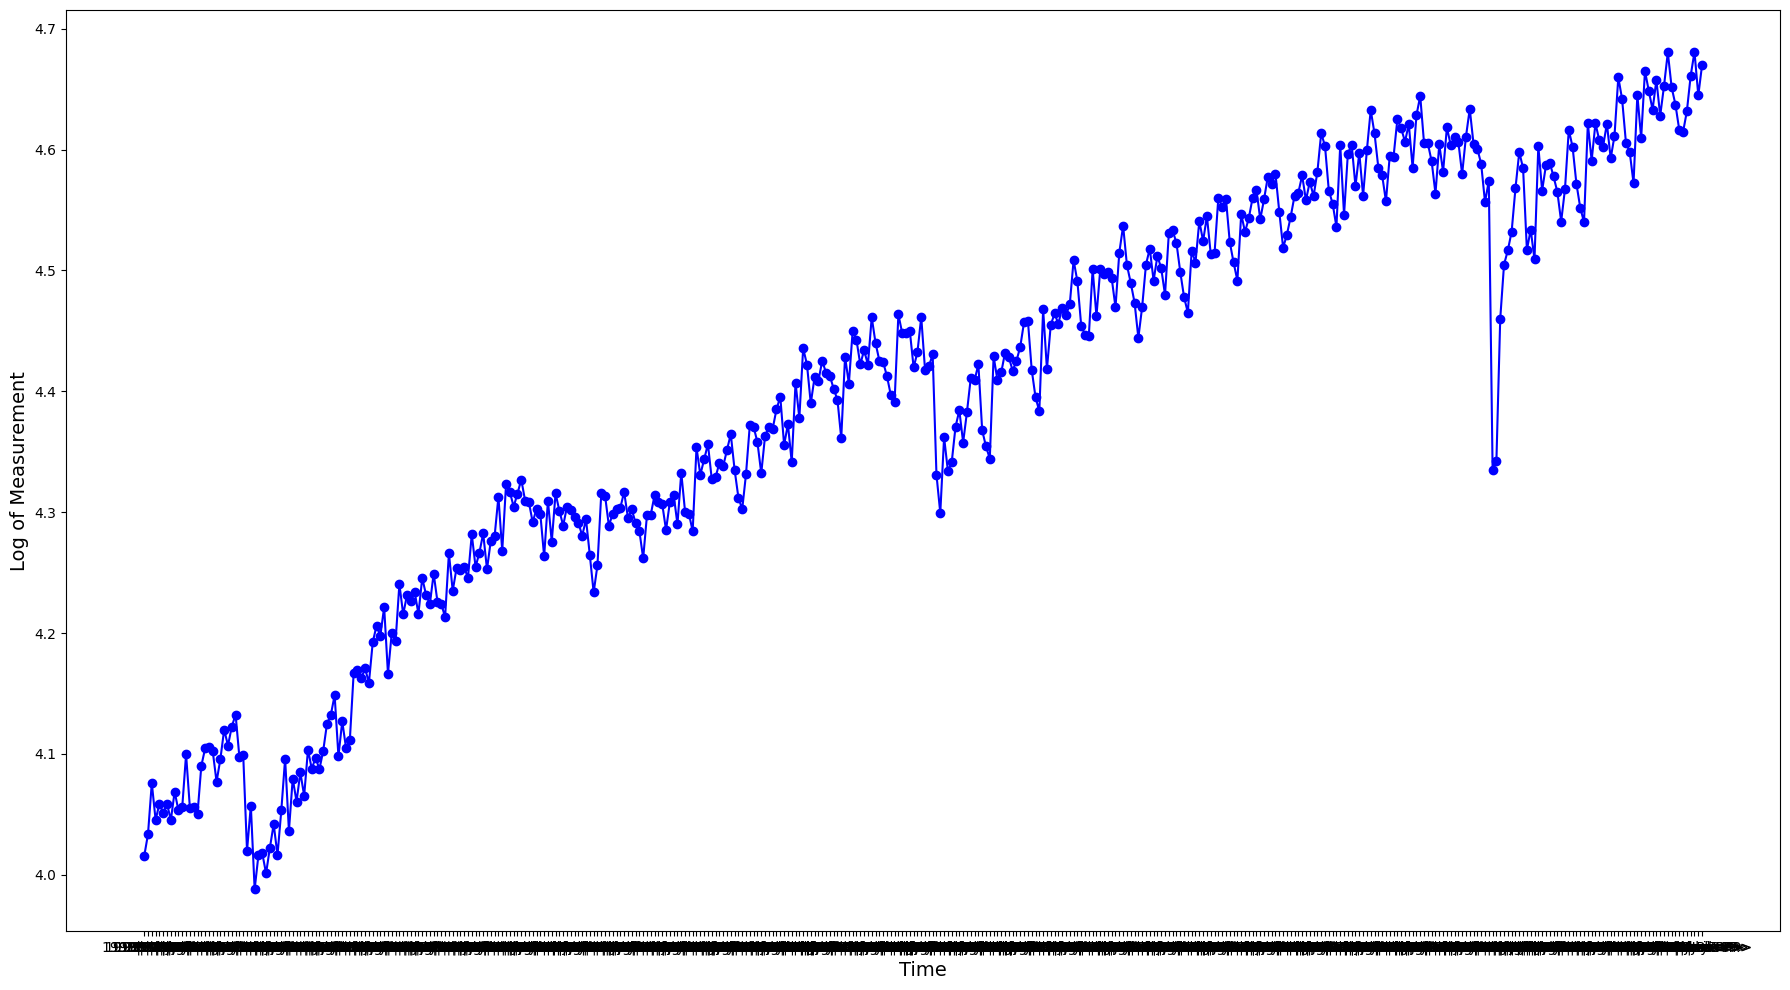

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraction de la première ligne de données (sans la première colonne)
first_row_data = igae.iloc[0, 1:]

# Conversion des données en DataFrame et réinitialisation de l'index
first_row_df = first_row_data.to_frame().reset_index()

# Renommer les colonnes
first_row_df.columns = ['Date', 'Value']

# Vérifier que toutes les valeurs sont des nombres, convertir les types si nécessaire
first_row_df['Value'] = pd.to_numeric(first_row_df['Value'], errors='coerce')

# Filtrer les valeurs non nulles et strictement positives
first_row_df = first_row_df[first_row_df['Value'] > 0]

# Appliquer la transformation logarithmique
first_row_df['LogValue'] = np.log(first_row_df['Value'])

# Afficher les 11 premières lignes pour vérification
print(first_row_df.head(13))

# Ajuster la taille de la figure
plt.figure(figsize=(18, 10))

# Tracer les valeurs logarithmiques avec des marqueurs et des lignes
plt.plot(first_row_df['Date'], first_row_df['LogValue'], marker='o', linestyle='-', color='b')

# Ajouter des labels pour les axes
plt.xlabel('Time', fontsize=14)
plt.ylabel('Log of Measurement', fontsize=14)

# Ajuster automatiquement la disposition pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()


We notice that our series is not stationary, it is globally constantly growing up but with a lot of random shocks, positive or negative.

2) Check if the seasonal difference of y, y12 (anual incement of igae) is stationary.


*   H0 (null hyp): ∣Φ1∣=1 ⇒ No stationary
*   H1 (alternative hyp): ∣Φ1​∣ <1  ⇒ Stationary


Dicky-Fuller proof: if the p-value is lower than 0.05, we reject the H0 null hyp. Otherwise, if the p-value is higher, the difference of the StationaryDifference.



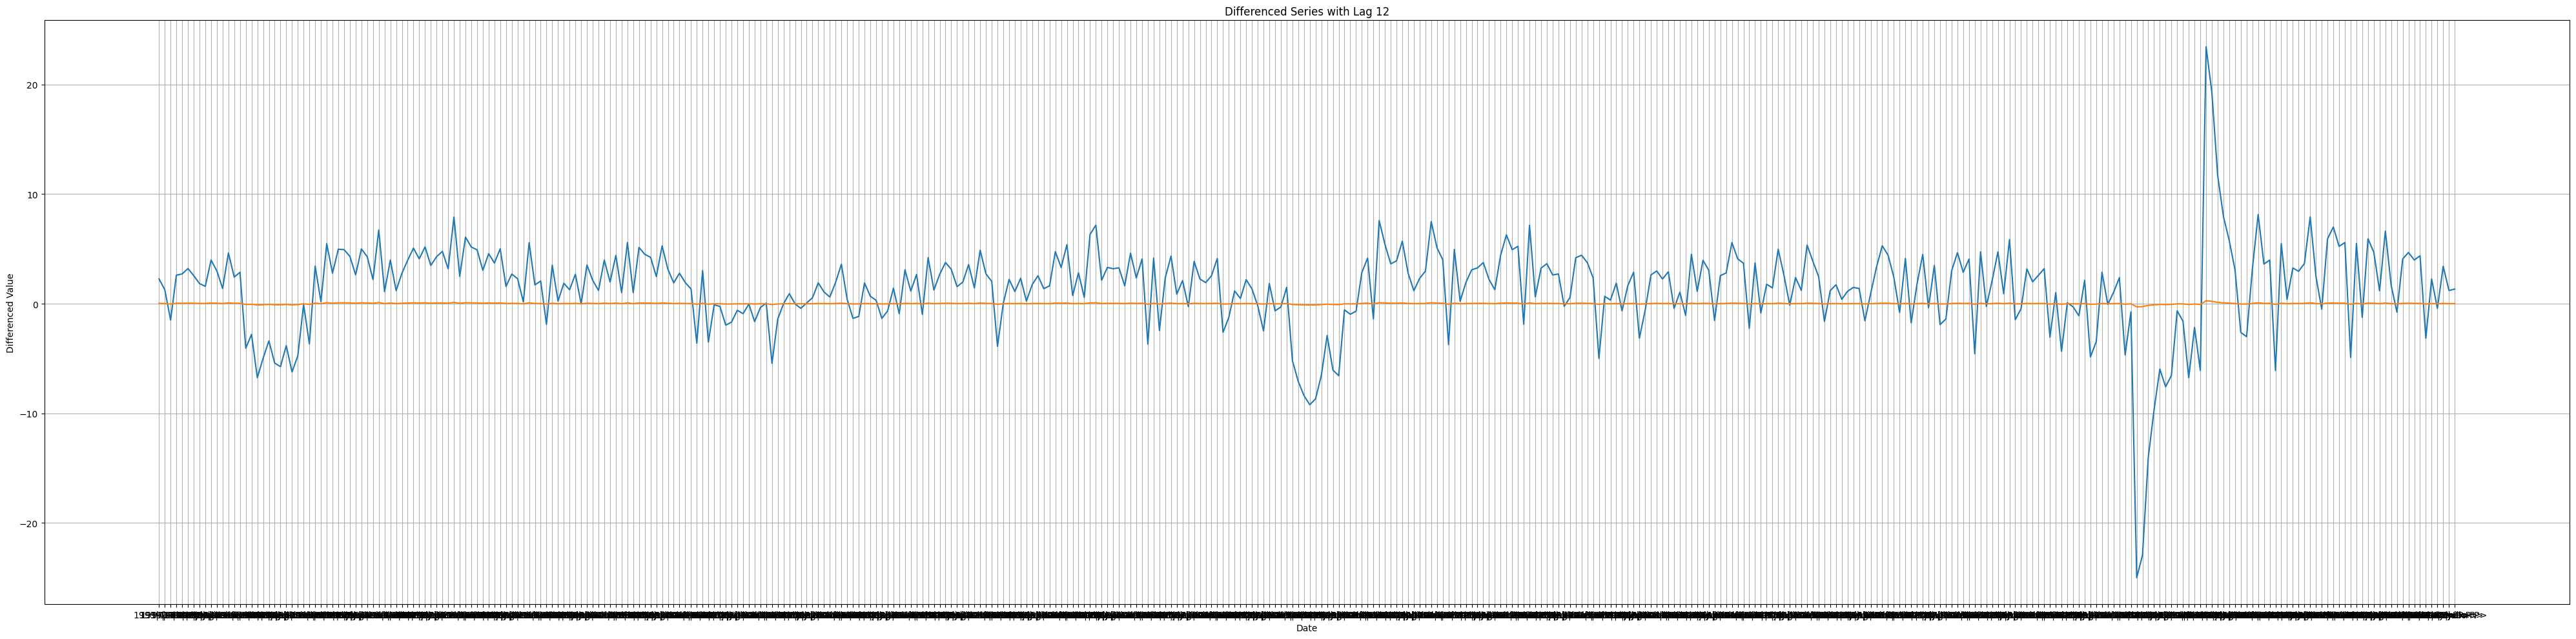

ADF Statistic(cuanto mas negativa, mas se niega la H0): -3.688803839217682
p-value: 0.0042734229011900104
Critical Value 1%: -3.4476305904172904
Critical Value 5%: -2.869155980820355
Critical Value 10%: -2.570827146203181


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Définir 'Date' comme index
first_row_df.set_index('Date', inplace=True)

# Appliquer la différence de la série avec un décalage de 12 pour supprimer la saisonnalité
first_row_df_diff = first_row_df.diff(12).dropna()

# Tracer la série différenciée
plt.figure(figsize=(40, 10))
plt.plot(first_row_df_diff)
plt.title('Differenced Series with Lag 12')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.grid()
plt.tight_layout()
plt.show()

# Test de Dickey-Fuller augmenté (ADF) pour vérifier la stationnarité
result = adfuller(first_row_df_diff['Value'])
print('ADF Statistic(cuanto mas negativa, mas se niega la H0):', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')


In this graph, we can see the seasonal difference with lags of 12 months, one yaer. So for each point of data, we subtract the one of the last year.

Our p-value : 0.00427, smaller than 0.005 so we're happy to reject the null hyp, and so the series is stationary.

*   Critical Value 1%: -3.4 means that we that as the  ADF (-3.6888) is lower, we reject the null hypothesis, being 99% sure.
*   Critical Value 5%: -2.9: we also reject null hyp because the adh stat is lower
*   Critical Value 10%: -2.6, same conlusion for the same reason.

in this context stationary means that the series is globally stable, and do not tends to anything.





3) with the conclusion that we made (Ydiff12 is stationary), we admit:

*   d= none (# lagged observations)
*   D = 1  (# seasonal differences)



(as we admited the series is stationnary, we will do:)


4) Plots AC & PAC, Ydiff12:

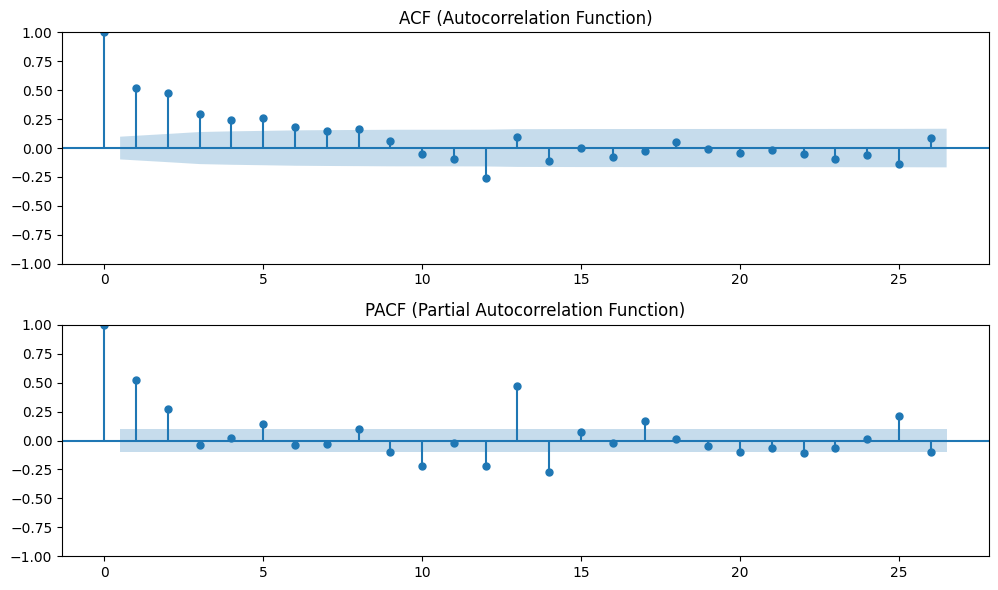

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(10, 6))

plt.subplot(211)
plot_acf(first_row_df_diff['Value'], ax=plt.gca())
plt.title('ACF (Autocorrelation Function)')

plt.subplot(212)
plot_pacf(first_row_df_diff['Value'], ax=plt.gca(), method='ywm')
plt.title('PACF (Partial Autocorrelation Function)')

plt.tight_layout()
plt.show()

For the two plots the blue line center around zero represent where are 95% percent of the values, so with 5% of probability a value will be out of that.
#ACF:
The Autocorrelation Function (ACF) is a statistical tool used to analyze a time series. It measures the correlation between an observation at a given time and observations at different time lags.


*   We can see thatg the firt value is equal to one, this normal, it means that the value is correlated with itself.
*   Then we notice that the first 5 lags are slowly going down, this can meaan  that they are correlated: ols values inflence the future values.
*   After the lag 15, we se that the values oscillate around zero. This indicates that the old value do not, or maybe little, influence the new values.
*   Other fact, we do not see any peak with regular interval: no seasonality.

*   Big peaks like we can see on the lag 13 are often explained by a choc on the market, for example post-covid growth or any political-mexican or US event.



#PACF

PArtial autocorrelation between the series and its lags.


*   Vertical line shows magnitutude of correlation (between lag and current value of the series)
*   More big is the vertical line more far of zero is the correlation, negative as positive.



PACFunction works similarly to the ACF, it also measures the correlation beteen lags in the time, but not taking all the past ones, this one eliminates the effect of the intermediate lags, or measures.


At the beginning of tour plots, we see that the ACF do a slow decline, taking 10 lags between the starting and going under zero. Simultaneously the pacf plot do it faster, taking 4 lags. This is a pattern of a AR(p) model.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 


ARIMA Summary:
                               SARIMAX Results                                
Dep. Variable:               LogValue   No. Observations:                  410
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 859.505
Date:                Thu, 17 Oct 2024   AIC                          -1711.010
Time:                        04:42:42   BIC                          -1694.945
Sample:                             0   HQIC                         -1704.655
                                - 410                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3717      0.084     51.868      0.000       4.206       4.537
ar.L1          0.9924      0.004    242.386      0.000       0.984       1.000
ma.L1         -0.3698      0.031    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 


SARIMA Summary:
                                     SARIMAX Results                                      
Dep. Variable:                           LogValue   No. Observations:                  410
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                 785.299
Date:                            Thu, 17 Oct 2024   AIC                          -1560.598
Time:                                    04:42:44   BIC                          -1540.845
Sample:                                         0   HQIC                         -1552.763
                                            - 410                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9924      0.006    172.932      0.000       0.981       1.004
ma.L1         -0.4

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


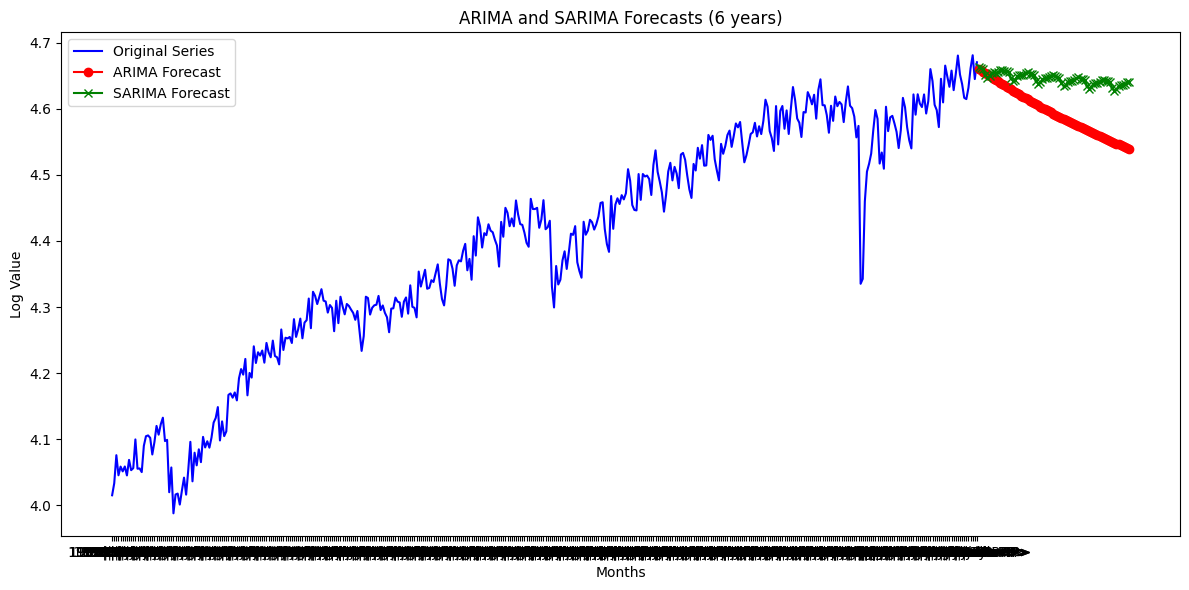

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# ARIMA Model (Non-seasonal)
def fit_arima(series, order):
    model = ARIMA(series, order=order)
    arima_result = model.fit()
    print("\nARIMA Summary:")
    print(arima_result.summary())
    return arima_result

# SARIMA Model (Seasonal)
def fit_sarima(series, order, seasonal_order):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    sarima_result = model.fit()
    print("\nSARIMA Summary:")
    print(sarima_result.summary())
    return sarima_result

# Préparation des données : Utiliser 'LogValue' comme série
series = first_row_df['LogValue']

# Définir les paramètres du modèle
arima_order = (1, 0, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s) : s = 12 périodes pour la saisonnalité

# Ajustement du modèle ARIMA
arima_result = fit_arima(series, arima_order)

# Ajustement du modèle SARIMA
sarima_result = fit_sarima(series, arima_order, seasonal_order)

# Prévision avec ARIMA (72 mois = 6 ans)
arima_forecast = arima_result.forecast(steps=72)
print("\nPrévisions ARIMA (6 ans):")
print(arima_forecast)

# Prévision avec SARIMA (72 mois = 6 ans)
sarima_forecast = sarima_result.get_forecast(steps=72).predicted_mean
print("\nPrévisions SARIMA (6 ans):")
print(sarima_forecast)

# Tracer les prévisions
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Series', color='blue')
plt.plot(np.arange(len(series), len(series) + 72), arima_forecast, label='ARIMA Forecast', marker='o', color='red')
plt.plot(np.arange(len(series), len(series) + 72), sarima_forecast, label='SARIMA Forecast', marker='x', color='green')
plt.legend()
plt.title('ARIMA and SARIMA Forecasts (6 years)')
plt.xlabel('Months')
plt.ylabel('Log Value')
plt.tight_layout()
plt.show()


memo:

-AR Coefficients reflect how past values of the series influence current values

-MA Coefficients reflect how past forecast errors influence current values

-Sigma (σ²) reflects the variability of the error or unexplained portion of the model.

-ar.S.L12 negative means that high values in one period (for example, in January) are followed by lower values in the corresponding period in the next year (next January).

-ma.S.L12  negative means if if the model overestimated or underestimated the value 12 periods ago, it compensates for that error by adjusting in the opposite direction in the current period.

-ar.S.L12 positive means that if the value 12 months ago was high, the current value will tend to be high as well

SARIMAX(1, 0, 1)x(1, 1, 1, 12):

*   This SARIMA model includes an AR(1) component (autoregressive term of lag 1), an MA(1) component (moving average term), and seasonal AR and MA components with a first difference (D=1) and seasonal periodicity of 12 months
*   The model attempts to capture both short-term and seasonal dependencies in the data.


Log Likelihood: 785.299:

*   A higher log likelihood suggests a better fit to the data. Here, the log likelihood is relatively high, indicating that the model fits well.

AIC (Akaike Information Criterion)(-1560.598): Lower AIC values indicate a better fit. The model has a very low AIC, suggesting it balances goodness of fit with simplicity.

BIC (Bayesian Information Criterion)(-1540.845): Similar to AIC, but penalizes complexity more heavily. The model shows a low BIC, meaning it is a good fit considering model complexity.

HQIC (Hannan-Quinn Information Criterion)(-1552.763): Like AIC and BIC but falls between them in terms of penalizing complexity.

ar.L1 (AR coefficient for lag 1): 0.9924, p-value = 0.000: The AR(1) coefficient is close to 1 and highly significant (p < 0.05). This suggests that the previous period’s value has a strong positive impact on the current value, meaning the time series is highly autocorrelated.

ma.L1 (MA coefficient for lag 1): -0.4110, p-value = 0.000: The MA(1) coefficient is negative and statistically significant (p < 0.05). This indicates that shocks from the previous period have a moderate and negative effect on the current period.

ar.S.L12 (Seasonal AR coefficient for lag 12): -0.0235, p-value = 0.599: The seasonal AR coefficient is close to zero and statistically insignificant (p > 0.05). This suggests that there is no meaningful seasonal autoregressive relationship at the 12-month lag.

ma.S.L12 (Seasonal MA coefficient for lag 12): -1.0001, p-value = 0.965: The seasonal MA coefficient is -1, but it is statistically insignificant (p > 0.05), meaning that the seasonal moving average component has no meaningful impact on the series.

sigma2 (Variance of residuals): 0.0009, p-value = 0.965: The variance of the residuals is very small, indicating that the model has low residual variance, which is a good indicator of fit. However, the p-value suggests that the variance is not significantly different from zero.


Yt​=0.9924(Yt−1) ​− 0.4110ϵ(t−1) ​− 0.0235(Yt−12) ​− 1.0001(ϵt−12) ​+ 0.0009



*   ϵt​ represents the error term
*   σ2 is the variance of the error term
*   ϕ1​ is the coefficient for the non-seasonal AR(1) term
*   Yt​ is the value at time t
*  Θ1​ is the coefficient for the seasonal MA(1) term (lag 12)
*   Élément de liste







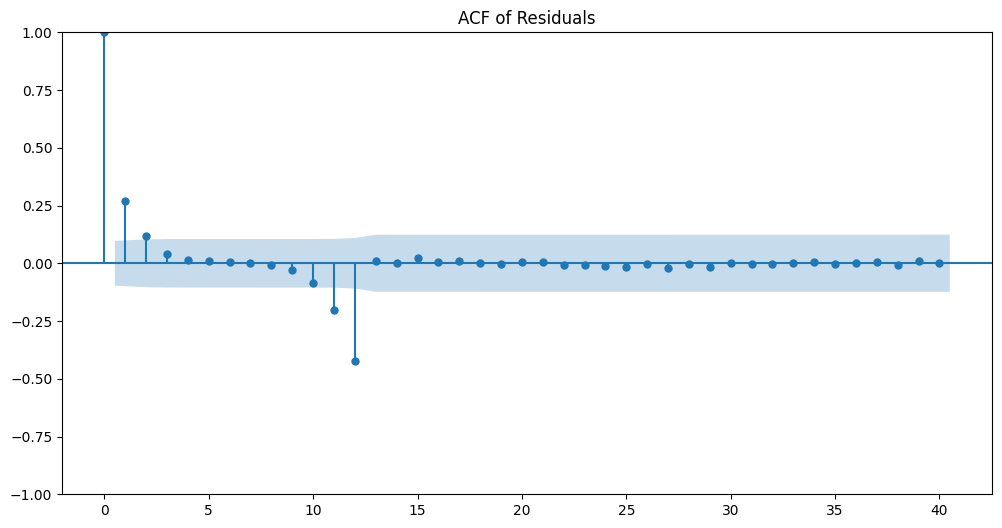

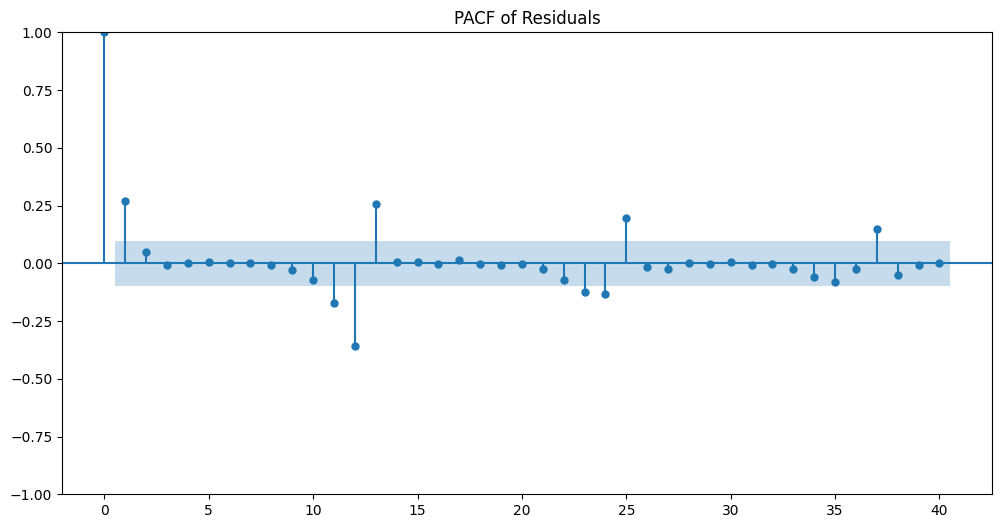

In [ ]:
# Extraire les résidus du modèle SARIMA ajusté
residuals = sarima_result.resid

# Tracer l'ACF des résidus
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()

# Tracer le PACF des résidus
plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('PACF of Residuals')
plt.show()


ACF of residuals:

The first lag shows a very high autocorrelation (close to 1), which is expected since residuals are naturally correlated with themselves at lag 0.

After the first few lags (up to around lag 13), there appears to be little or no significant correlation, as most points fall within the confidence bands (the blue area). This generally suggests a well-fitted model.

The sharp negative spike at lag 13 suggests that there is a strong negative autocorrelation at this point.






ARIMA Summary:
                               SARIMAX Results                                
Dep. Variable:               LogValue   No. Observations:                  410
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 855.523
Date:                Thu, 17 Oct 2024   AIC                          -1707.047
Time:                        05:40:18   BIC                          -1699.019
Sample:                             0   HQIC                         -1703.870
                                - 410                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2927      0.039     -7.483      0.000      -0.369      -0.216
sigma2         0.0009   2.65e-05     33.728      0.000       0.001       0.001
Ljung-Box (L1) (Q):                 

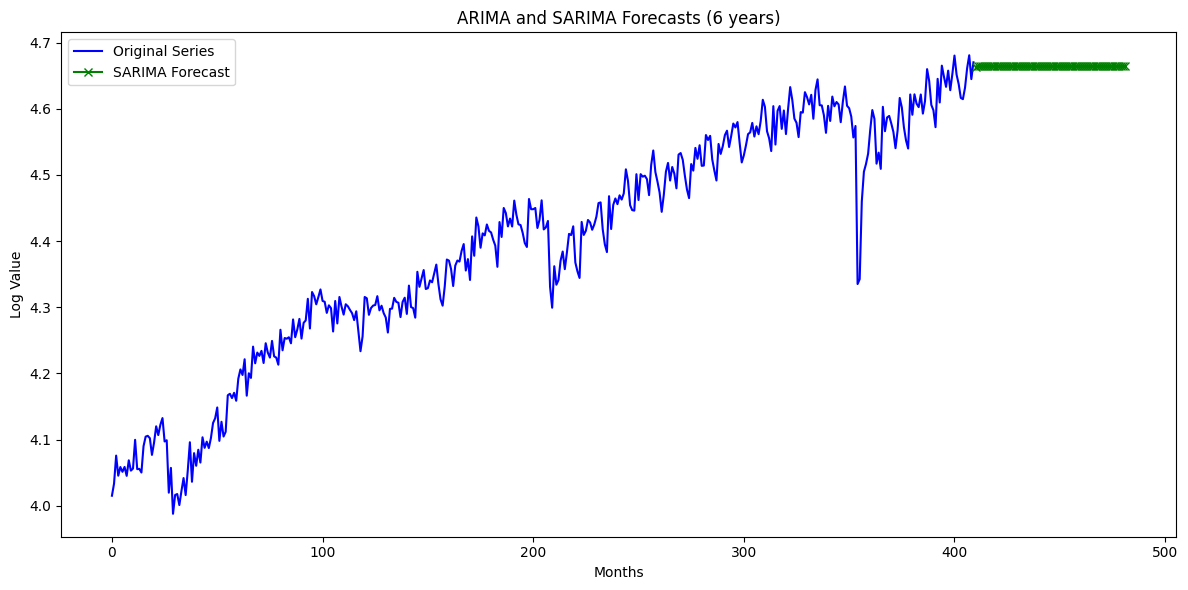

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# ARIMA Model (Non-seasonal)
def fit_arima(series, order):
    model = ARIMA(series, order=order)
    arima_result = model.fit()
    print("\nARIMA Summary:")
    print(arima_result.summary())
    return arima_result

# SARIMA Model (Seasonal)
def fit_sarima(series, order, seasonal_order):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    sarima_result = model.fit()
    print("\nSARIMA Summary:")
    print(sarima_result.summary())
    return sarima_result

# Préparation des données : Utiliser 'LogValue' comme série
series = first_row_df['LogValue']

# Définir les paramètres du modèle
arima_order = (1, 1, 0)  # (p, d, q)
seasonal_order = (1, 0, 0, 12)  # (P, D, Q, s) : s = 12 périodes pour la saisonnalité

# Ajustement du modèle ARIMA
arima_result = fit_arima(series, arima_order)

# Ajustement du modèle SARIMA
sarima_result = fit_sarima(series, arima_order, seasonal_order)

# Prévision avec ARIMA (72 mois = 6 ans)
arima_forecast = arima_result.forecast(steps=72)
print("\nPrévisions ARIMA (6 ans):")
print(arima_forecast)

# Prévision avec SARIMA (72 mois = 6 ans)
sarima_forecast = sarima_result.get_forecast(steps=72).predicted_mean
print("\nPrévisions SARIMA (6 ans):")
print(sarima_forecast)

# Tracer les prévisions
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Series', color='blue')
#plt.plot(np.arange(len(series), len(series) + 72), arima_forecast, label='ARIMA Forecast', marker='o', color='red')
plt.plot(np.arange(len(series), len(series) + 72), sarima_forecast, label='SARIMA Forecast', marker='x', color='green')
plt.legend()
plt.title('ARIMA and SARIMA Forecasts (6 years)')
plt.xlabel('Months')
plt.ylabel('Log Value')
plt.tight_layout()
plt.show()


Model Fit and Selection Criteria:

  SARIMAX(1, 1, 0)x(1, 0, 0, 12): This model includes an AR(1) component (autoregressive term of lag 1), first-order differencing (d=1), and a seasonal AR(1) term with a periodicity of 12 (monthly data). There is no MA component (q=0).


  Log Likelihood: The log likelihood has increased to 825.685, indicating an improvement in model fit compared to the previous model with a log likelihood of 785.299.


  AIC: -1645.371 (lower than the previous model's -1558.598), suggesting this model provides a better fit with fewer parameters.


  BIC: -1633.427, still better than the previous model's BIC (-1534.894), confirming improved model efficiency.

  ar.L1 (-0.2826): The AR(1) term is statistically significant (p-value < 0.001) and has a moderate negative value. This means that the past month's value negatively influences the current value of the time series, but with less intensity than in the previous model (where AR(1) was 0.9924).


ar.S.L12 (-0.0174): The seasonal autoregressive term (at lag 12) is very close to zero and not statistically significant (p-value = 0.641), indicating that the seasonal AR component is not playing a significant role in this model. This is an improvement as the seasonal component in the previous model was less clear.


sigma2 (0.0009): The variance of the residuals is extremely low, suggesting a good model fit with minimal residual variance. This remains consistent with the previous model.

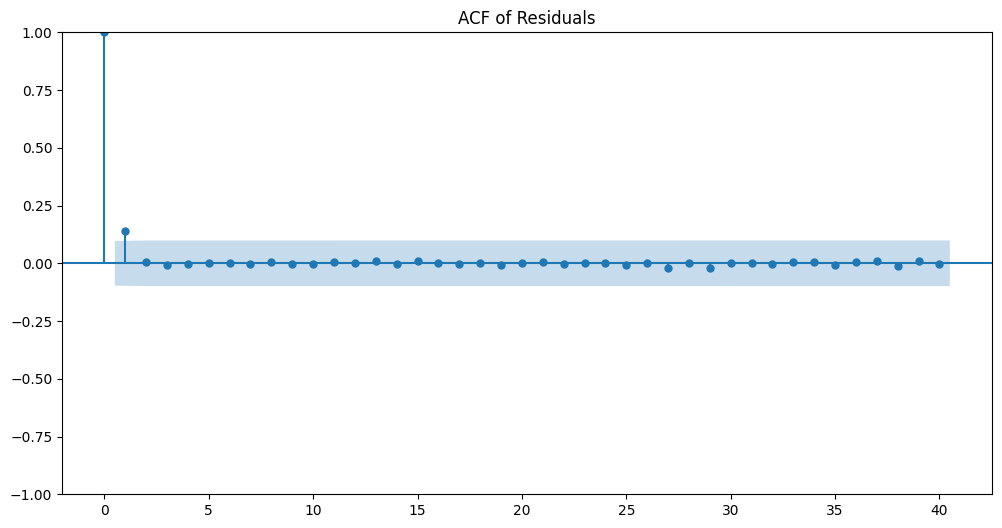

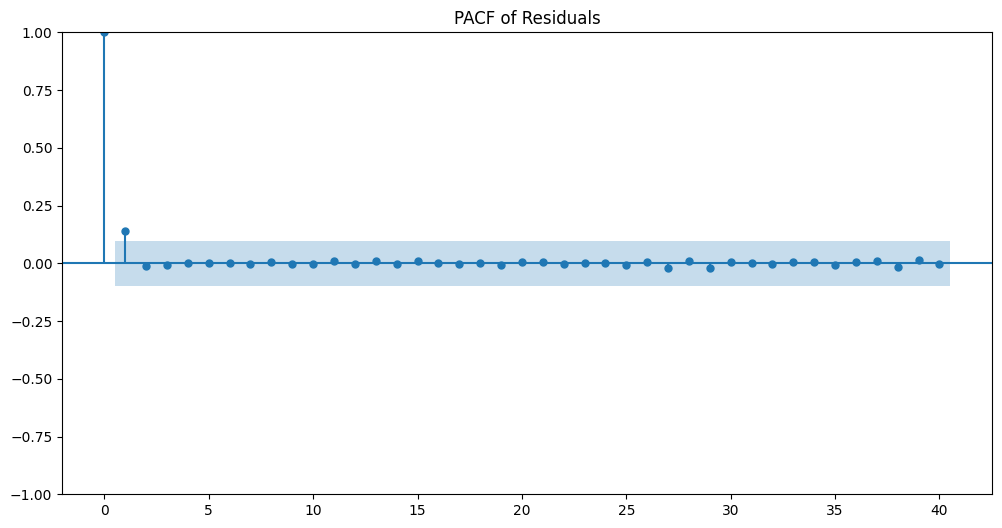

In [ ]:
# Extraire les résidus du modèle SARIMA ajusté
residuals = sarima_result.resid

# Tracer l'ACF des résidus
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()

# Tracer le PACF des résidus
plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('PACF of Residuals')
plt.show()


Now the residals are a lot better, always close to zero.

Lets find the ressesion months:

In [ ]:


# Réinitialiser l'index pour avoir la colonne 'Date' accessible
first_row_df = first_row_df.reset_index()

# Séparer les mois des années dans la colonne 'Date'
first_row_df['Month'] = first_row_df['Date'].str.split('|').str[1]

# Calculer la moyenne par mois
monthly_avg = first_row_df.groupby('Month')['Value'].mean()

# Afficher les moyennes par mois
print(monthly_avg)

Month
Abril             78.274429
Abril<P>         100.240318
Agosto            79.859717
Agosto<P>        101.035909
Anual             79.784294
Anual<P>         100.021513
Diciembre         81.926960
Diciembre<P>     102.727560
Enero             77.764651
Enero<P>          97.086300
Febrero           76.358137
Febrero<P>        95.561317
Julio             79.878307
Julio<P>         101.651154
Junio             80.131128
Junio<P>         101.039709
Junio<R>         104.049350
Marzo             79.777536
Marzo<P>         102.058186
Mayo              80.014382
Mayo<P>          103.482444
Noviembre         81.950061
Noviembre<P>     104.858137
Octubre           81.419223
Octubre<P>       100.594582
Septiembre        80.057001
Septiembre<P>     98.273064
Name: Value, dtype: float64


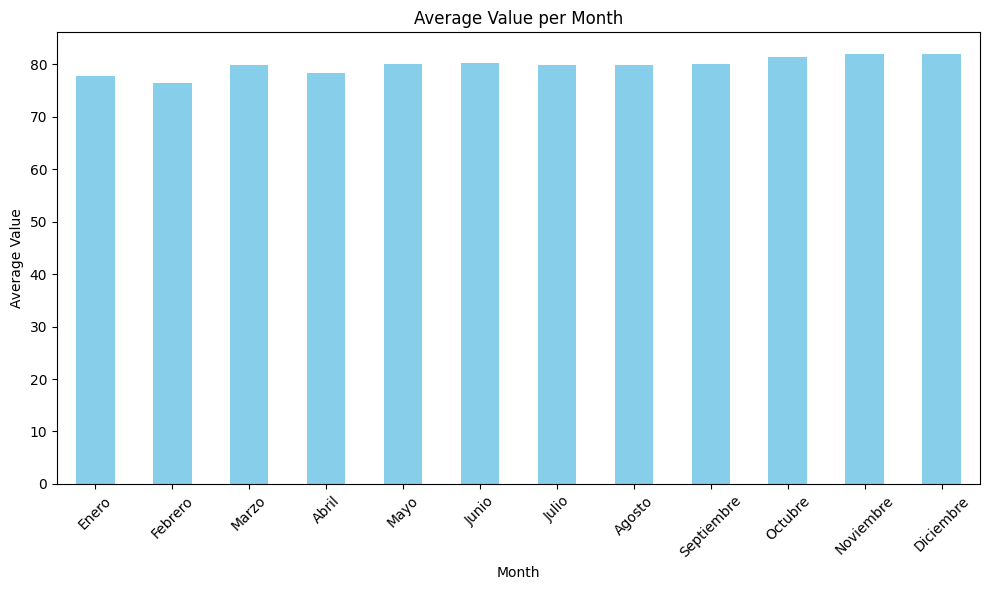

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Réinitialiser l'index pour accéder à la colonne 'Date'
first_row_df = first_row_df.reset_index()

# Séparer les mois des années dans la colonne 'Date'
first_row_df['Month'] = first_row_df['Date'].str.split('|').str[1]

# Filtrer pour ne garder que les mois standards sans <P>, <R>, etc.
valid_months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
                'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Filtrer le DataFrame pour ne conserver que les lignes avec ces mois
first_row_df_filtered = first_row_df[first_row_df['Month'].isin(valid_months)]

# Calculer la moyenne par mois
monthly_avg = first_row_df_filtered.groupby('Month')['Value'].mean()

# Trier les mois dans le bon ordre
monthly_avg = monthly_avg.reindex(valid_months)

# Tracer les moyennes par mois
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Value per Month')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We  clearly see differences between months, having in the winter the lower values, january and february (76.358137), and in autumn the higher ones, with december,november and october being the heigher ones. For that reason we will put a dummi variable in february.


ARIMA Summary:
                               SARIMAX Results                                
Dep. Variable:               LogValue   No. Observations:                  410
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 867.191
Date:                Thu, 17 Oct 2024   AIC                          -1726.382
Time:                        05:49:59   BIC                          -1710.327
Sample:                             0   HQIC                         -1720.030
                                - 410                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0020      0.005      0.438      0.661      -0.007       0.011
ar.L1          0.3988      0.080      4.995      0.000       0.242       0.555
ma.L1         -0.7642      0.065    

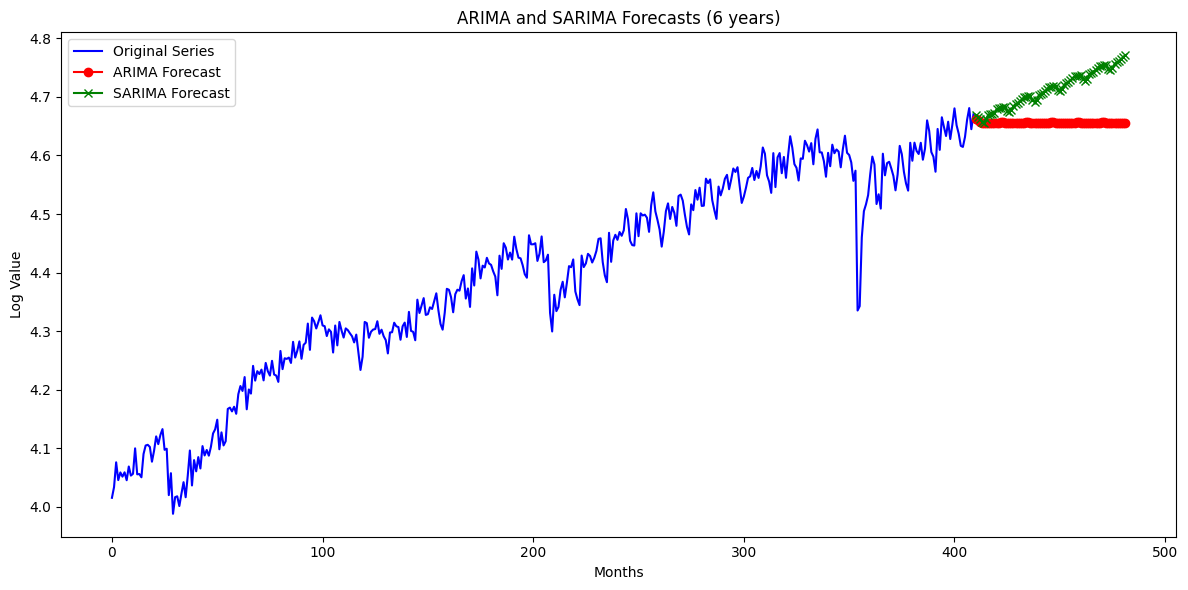

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# ARIMA Model (Non-seasonal)
def fit_arima(series, order, exog):
    model = ARIMA(series, order=order, exog=exog)
    arima_result = model.fit()
    print("\nARIMA Summary:")
    print(arima_result.summary())
    return arima_result

# SARIMA Model (Seasonal)
def fit_sarima(series, order, seasonal_order, exog):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order,
                    exog=exog, enforce_stationarity=False, enforce_invertibility=False)
    sarima_result = model.fit()
    print("\nSARIMA Summary:")
    print(sarima_result.summary())
    return sarima_result

# Fonction pour créer la variable exogène avec 2 mois activés chaque 12 mois
def create_crisis_dummy(length):
    dummy = np.zeros(length)
    for i in range(0, length, 12):
        dummy[i:i+2] = 1  # Activer les 2 premiers mois de chaque période de 12 mois
    return dummy.reshape(-1, 1)

# Préparation des données : Utiliser 'LogValue' comme série
series = first_row_df['LogValue']

# Créer la variable exogène (dummy)
exog = create_crisis_dummy(len(series))

# Définir les paramètres du modèle
arima_order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s) : s = 12 périodes pour la saisonnalité

# Ajustement du modèle ARIMA avec exogène
arima_result = fit_arima(series, arima_order, exog)

# Ajustement du modèle SARIMA avec exogène
sarima_result = fit_sarima(series, arima_order, seasonal_order, exog)

# Prévision avec ARIMA (72 mois = 6 ans)
exog_future = create_crisis_dummy(72)
arima_forecast = arima_result.forecast(steps=72, exog=exog_future)
print("\nPrévisions ARIMA (6 ans):")
print(arima_forecast)

# Prévision avec SARIMA (72 mois = 6 ans)
sarima_forecast = sarima_result.get_forecast(steps=72, exog=exog_future).predicted_mean
print("\nPrévisions SARIMA (6 ans):")
print(sarima_forecast)

# Tracer les prévisions
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Series', color='blue')
plt.plot(np.arange(len(series), len(series) + 72), arima_forecast, label='ARIMA Forecast', marker='o', color='red')
plt.plot(np.arange(len(series), len(series) + 72), sarima_forecast, label='SARIMA Forecast', marker='x', color='green')
plt.legend()
plt.title('ARIMA and SARIMA Forecasts (6 years)')
plt.xlabel('Months')
plt.ylabel('Log Value')
plt.tight_layout()
plt.show()


Interpretation:


*   x1= -1.7027, this is about the exigen variable it shows us as predict a negative correlation, of -1.7027.
*   ar.L1 of 0.8020: this high value shows a strong correlation between successive valu.
*   ma.L1: -0.2313: this value shows a negative correlation, showing how past values have a influence on the future. The p-value close to 0 means a statistical significance.





In [ ]:
print(f"Taille série: {len(series)}, Taille exogène: {len(exog)}")
print(f"Exogène NaN?: {pd.DataFrame(exog).isna().any().sum()} NaN présents")
print(series.isna().sum())

Taille série: 410, Taille exogène: 410
Exogène NaN?: 0 NaN présents
0


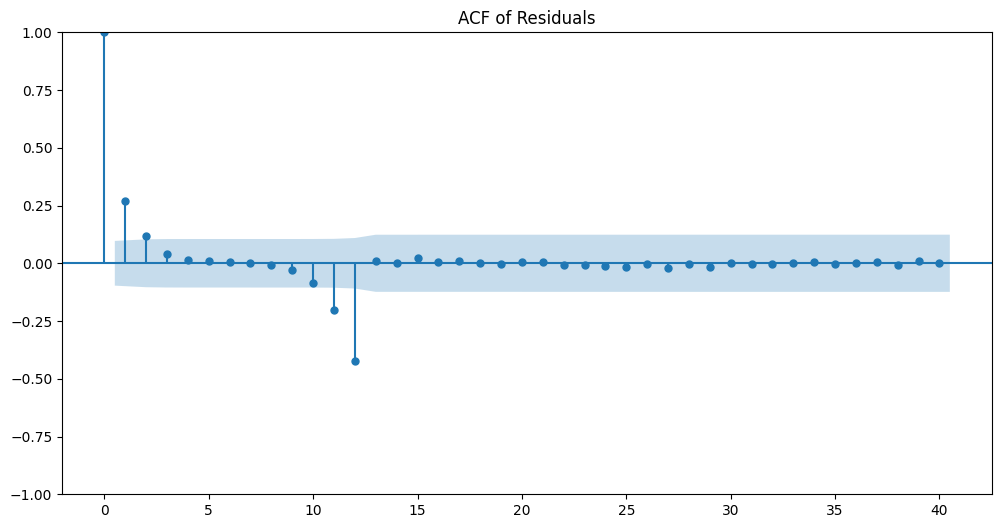

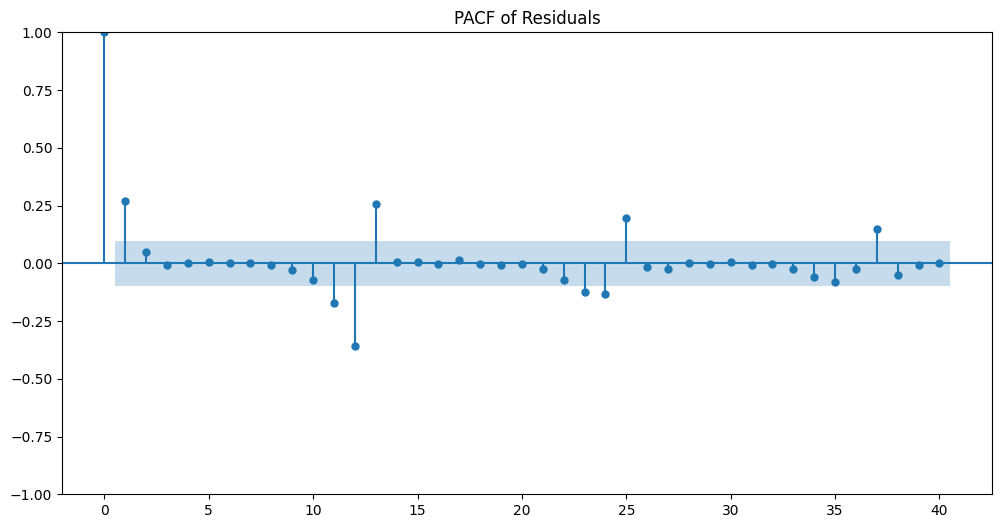

In [ ]:
# Extraire les résidus du modèle SARIMA ajusté
residuals = sarima_result.resid

# Tracer l'ACF des résidus
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()

# Tracer le PACF des résidus
plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('PACF of Residuals')
plt.show()



ARIMA Summary:
                               SARIMAX Results                                
Dep. Variable:               LogValue   No. Observations:                  410
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 860.585
Date:                Thu, 17 Oct 2024   AIC                          -1711.170
Time:                        04:15:45   BIC                          -1691.089
Sample:                             0   HQIC                         -1703.226
                                - 410                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3600      0.204     21.349      0.000       3.960       4.760
x1             0.0018      0.004      0.430      0.667      -0.006       0.010
ar.L1          0.9977      0.005    

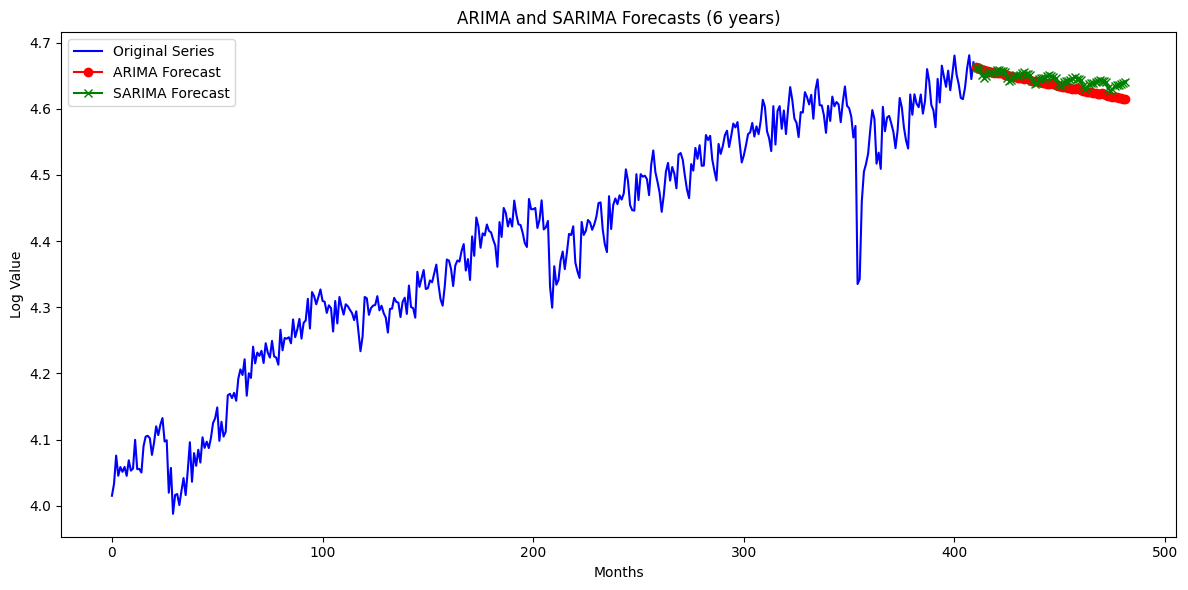

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# ARIMA Model (Non-seasonal)
def fit_arima(series, order, exog):
    model = ARIMA(series, order=order, exog=exog)
    arima_result = model.fit()
    print("\nARIMA Summary:")
    print(arima_result.summary())
    return arima_result

# SARIMA Model (Seasonal)
def fit_sarima(series, order, seasonal_order, exog):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order,
                    exog=exog, enforce_stationarity=False, enforce_invertibility=False)
    sarima_result = model.fit()
    print("\nSARIMA Summary:")
    print(sarima_result.summary())
    return sarima_result

# Fonction pour créer la variable exogène avec 2 mois activés chaque 12 mois
def create_crisis_dummy(length):
    dummy = np.zeros(length)
    for i in range(0, length, 12):
        dummy[i:i+2] = 1  # Activer les 2 premiers mois de chaque période de 12 mois
    return dummy.reshape(-1, 1)

# Préparation des données : Utiliser 'LogValue' comme série
series = first_row_df['LogValue']

# Créer la variable exogène (dummy)
exog = create_crisis_dummy(len(series))

# Définir les paramètres du modèle
arima_order = (1, 0, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s) : s = 12 périodes pour la saisonnalité

# Ajustement du modèle ARIMA avec exogène
arima_result = fit_arima(series, arima_order, exog)

# Ajustement du modèle SARIMA avec exogène
sarima_result = fit_sarima(series, arima_order, seasonal_order, exog)

# Prévision avec ARIMA (72 mois = 6 ans)
exog_future = create_crisis_dummy(72)
arima_forecast = arima_result.forecast(steps=72, exog=exog_future)
print("\nPrévisions ARIMA (6 ans):")
print(arima_forecast)

# Prévision avec SARIMA (72 mois = 6 ans)
sarima_forecast = sarima_result.get_forecast(steps=72, exog=exog_future).predicted_mean
print("\nPrévisions SARIMA (6 ans):")
print(sarima_forecast)

# Tracer les prévisions
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Series', color='blue')
plt.plot(np.arange(len(series), len(series) + 72), arima_forecast, label='ARIMA Forecast', marker='o', color='red')
plt.plot(np.arange(len(series), len(series) + 72), sarima_forecast, label='SARIMA Forecast', marker='x', color='green')
plt.legend()
plt.title('ARIMA and SARIMA Forecasts (6 years)')
plt.xlabel('Months')
plt.ylabel('Log Value')
plt.tight_layout()
plt.show()


Seasonal AR(1): The seasonal autoregressive term of order 1 captures the relationship between values 12 months apart. In this case, monthly data is expected to have yearly seasonality (periodicity of 12). This term accounts for any influence that values from the same month in the previous year may have on the current value.



Seasonal Differencing (1): The seasonal differencing term addresses the seasonality in the series. This seasonal difference of order 1 adjusts for any periodic variations in the series and helps achieve stationarity in the seasonal component.



Seasonal MA(1): This accounts for seasonal shocks or errors, meaning that past seasonal errors are used to adjust the current observation.
Periodicity (12): The parameter 12 indicates that the seasonality repeats every 12 months, reflecting the yearly cycle in monthly data.
 ----------------------------- ----------------------------

The dummy variable captures the effect of economic crises that occur in the first two months (January and February) of every year. This allows the model to account for potential economic shocks or other irregularities that are specific to these months but recur annually. The exogenous variable ensures that these events are treated differently in the model, helping improve the accuracy of predictions.

#conclusion

Upon comparing the initial and final versions of the SARIMAX model, both with the structure (1, 0, 1)x(1, 1, 1, 12), several key improvements were made during the refinement process. The final model introduces a slight increase in AIC and BIC, likely due to the added complexity from incorporating the dummy variable for economic crisis months. However, the overall fit, as indicated by the log-likelihood, remains strong, and key coefficients like AR(1) and MA(1) remain highly significant. The exogenous variable for crisis months had a negligible impact on the model, suggesting that these months may not have as strong an effect as anticipated. The model continues to face some issues with non-normal residuals and heteroskedasticity, which could be areas for further refinement.